<a href="https://colab.research.google.com/github/wilferalexander/creditscoring/blob/main/CreditScoringv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CREDIT SCORING PREDICTION**

---



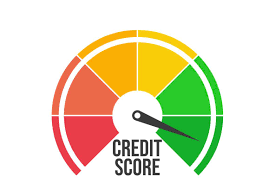

**Descripción del Proyecto**

Credit Scoring es un proyecto de machine learning enfocado en la predicción de la solvencia crediticia de los individuos. Este proyecto tiene como objetivo desarrollar un modelo predictivo que ayude a las instituciones financieras a tomar decisiones informadas sobre la concesión de créditos.



CREDIT SCORING PREDICTION

La importancia de reducir el riesgo crediticio es clave en el sector financiero. Nuestro cliente, una institución financiera alemana, ha reconocido la necesidad de adoptar enfoques innovadores para mejorar su capacidad de evaluar el riesgo crediticio de los clientes. La misión principal es identificar y clasificar a los clientes en dos categorías: "Buen Cliente (0)" y "Mal Cliente (1)". Este análisis permitirá a la institución tomar decisiones informadas y mitigar el riesgo de pérdidas crediticias.

---

Tus tareas principales serán:

1. **Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

2. **Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

3. **Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

4. **Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.
---


---

**Contexto:**
El conjunto de datos original contiene 1000 entradas con 20 atributos categóricos/simbólicos preparados por el Prof. Hofmann. En este conjunto de datos, cada entrada representa a una persona que obtiene un crédito de un banco. Cada persona se clasifica como riesgo crediticio bueno o malo según el conjunto de atributos. El enlace al conjunto de datos original se puede encontrar a continuación.

**Contenido:**
Es casi imposible entender el conjunto de datos original debido a su sistema complicado de categorías y símbolos. Por lo tanto, escribí un pequeño script en Python para convertirlo en un archivo CSV legible. Varias columnas simplemente se ignoran, porque en mi opinión, o no son importantes o sus descripciones son oscuras. Los atributos seleccionados son:

1. Edad (numérico)
2. Género (texto: masculino, femenino)
3. Trabajo (numérico: 0 - no cualificado y no residente, 1 - no cualificado y residente, 2 - cualificado, 3 - altamente cualificado)
4. Vivienda (texto: propia, alquiler, o libre)
5. Cuentas de ahorro (texto: poco, moderado, bastante rico, rico)
6. Cuenta corriente (numérico, en DM - Marco alemán)
7. Monto del crédito (numérico, en DM)
8. Duración (numérico, en meses)
9. Propósito (texto: automóvil, muebles/equipo, radio/TV, electrodomésticos, reparaciones, educación, negocios, vacaciones/otros)
10. Riesgo (Valor objetivo - Buen Riesgo o Mal Riesgo)

#**1. Configuración del Ambiente**


---


In [26]:
#Montamos la unidad de google donde se encuentra en dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
#Importamos librerias necesarias
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
import warnings
%matplotlib inline
from io import StringIO
import requests
import sklearn
import missingno as msno ## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
global df_banco, resultados

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

#**2. Preprocesamiento de Datos**


---

In [79]:
df_banco = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Bootcamp Profe alejo/Credit-Scoring-Prediction/Creditscoring/german_credit.csv')
df_banco.head(5)

default account_check_status  duration_in_month  \
0        0               < 0 DM                  6   
1        1    0 <= ... < 200 DM                 48   
2        0  no checking account                 12   
3        0               < 0 DM                 42   
4        1               < 0 DM                 24   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3              radio/television           7882                 ... < 100 DM   
4                     car (new)           4870                 ... < 100 DM   

    present_emp_since  installment_as_income_perc  \
0       .. >= 7 years                           4   
1  1 <= ... < 4 years                           2   
2  4 <= ... < 7 years                           2   
3  4 <= ... < 7 years                           2   
4  1 <= ... < 4 years                           3   

                   personal_status_sex other_debtors  present_res_since  \
0                        male : single          none                  4   
1  female : divorced/separated/married          none                  2   
2                        male : single          none                  3   
3                        male : single     guarantor                  4   
4                        male : single          none                  4   

                                            property  age  \
0                                        real estate   67   
1                                        real estate   22   
2                                        real estate   49   
3  if not A121 : building society savings agreeme...   45   
4                              unknown / no property   53   

  other_installment_plans   housing  credits_this_bank  \
0                    none       own                  2   
1                    none       own                  1   
2                    none       own                  1   
3                    none  for free                  1   
4                    none  for free                  2   

                           job  people_under_maintenance  \
0  skilled employee / official                         1   
1  skilled employee / official                         1   
2         unskilled - resident                         2   
3  skilled employee / official                         2   
4  skilled employee / official                         2   

                                   telephone foreign_worker  
0  yes, registered under the customers name             yes  
1                                       none            yes  
2                                       none            yes  
3                                       none            yes  
4                                       none            yes

### 2.1 Validación del dataframe

---


In [80]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

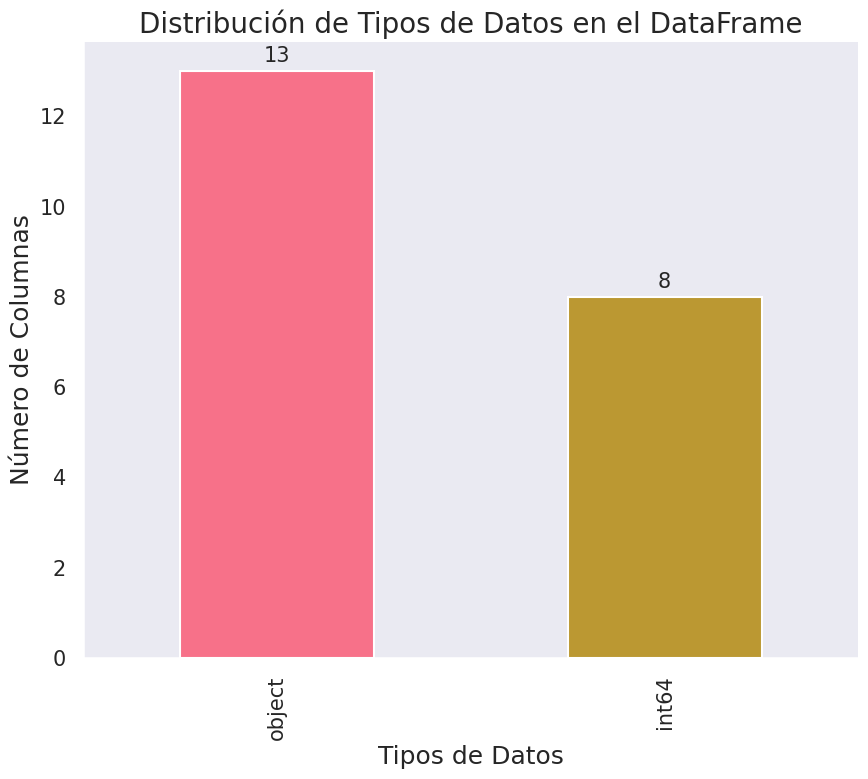

In [81]:
# Establecemos el estilo de Seaborn
sns.set(style="dark", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_banco.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [82]:
#Información de los datos
print("Número de filas: ",df_banco.shape[0])
print("Número de Columnas:",df_banco.shape[1])
print("Datos Duplicados",df_banco.duplicated().sum())
print("Variables Categóricas: ",df_banco.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_banco.select_dtypes(exclude='object').shape[1])

Número de filas:  1000
Número de Columnas: 21
Datos Duplicados 0
Variables Categóricas:  13
Variables Numéricas:  8


Contamos con 13 variables categoricas y 8 variables numericas

In [83]:
## Validando las columnas de nuestro dataframe
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [84]:
df_banco.describe().transpose()

count      mean          std    min     25%  \
default                     1000.0     0.300     0.458487    0.0     0.0   
duration_in_month           1000.0    20.903    12.058814    4.0    12.0   
credit_amount               1000.0  3271.258  2822.736876  250.0  1365.5   
installment_as_income_perc  1000.0     2.973     1.118715    1.0     2.0   
present_res_since           1000.0     2.845     1.103718    1.0     2.0   
age                         1000.0    35.546    11.375469   19.0    27.0   
credits_this_bank           1000.0     1.407     0.577654    1.0     1.0   
people_under_maintenance    1000.0     1.155     0.362086    1.0     1.0   

                               50%      75%      max  
default                        0.0     1.00      1.0  
duration_in_month             18.0    24.00     72.0  
credit_amount               2319.5  3972.25  18424.0  
installment_as_income_perc     3.0     4.00      4.0  
present_res_since              3.0     4.00      4.0  
age                           33.0    42.00     75.0  
credits_this_bank              1.0     2.00      4.0  
people_under_maintenance       1.0     1.00      2.0

In [85]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [86]:
#Contar los valores de cada categoria de la columna 'account_check_status'
df_banco.account_check_status.value_counts()

account_check_status
no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: count, dtype: int64

In [87]:
#Explorar categorias
columnas = list(df_banco.select_dtypes(include=["object"]).columns) #Obtener columnas de datos de tipo 'objeto'
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index)) #Creamos lista para cada una de las columnas
  print('\n') #new line antes de la siguiente impresión para facilitar lectura

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [88]:
#Eliminar duplicados
#Verificamos si hay duplicados
print('Total de duplicados en el dataframe es de' ,df_banco.duplicated().sum(),'.')

Total de duplicados en el dataframe es de 0 .


No se encuentran duplicados en el dataframe

### 2.2 Tratamiento de Valores nulos

---


In [89]:
#datos nulos
df_banco.isnull().sum().sort_values(ascending=False)

default                       0
present_res_since             0
telephone                     0
people_under_maintenance      0
job                           0
credits_this_bank             0
housing                       0
other_installment_plans       0
age                           0
property                      0
other_debtors                 0
account_check_status          0
personal_status_sex           0
installment_as_income_perc    0
present_emp_since             0
savings                       0
credit_amount                 0
purpose                       0
credit_history                0
duration_in_month             0
foreign_worker                0
dtype: int64

Text(0, 0.5, 'Filas')

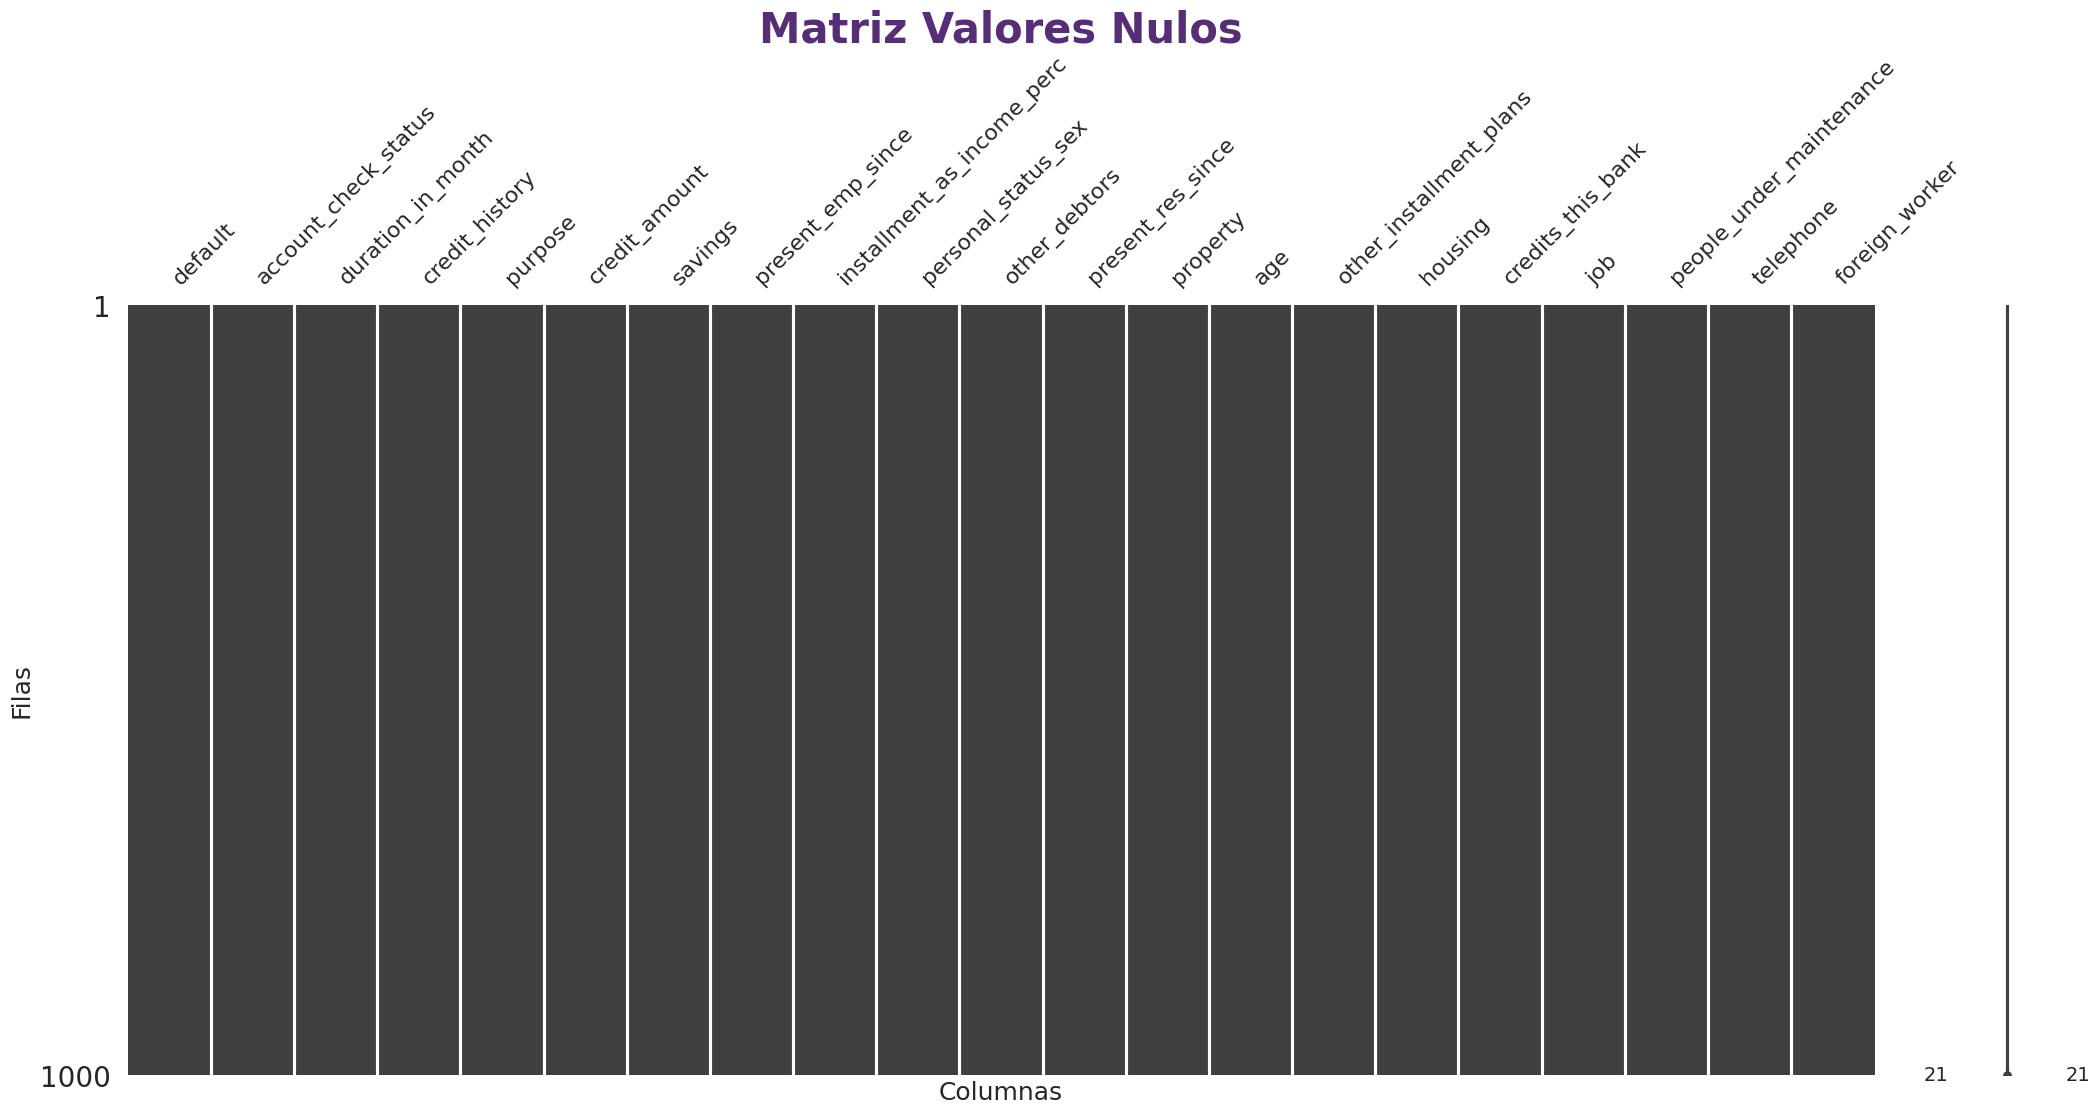

In [91]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_banco)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

Observamos que no existe presencia de datos nulos.


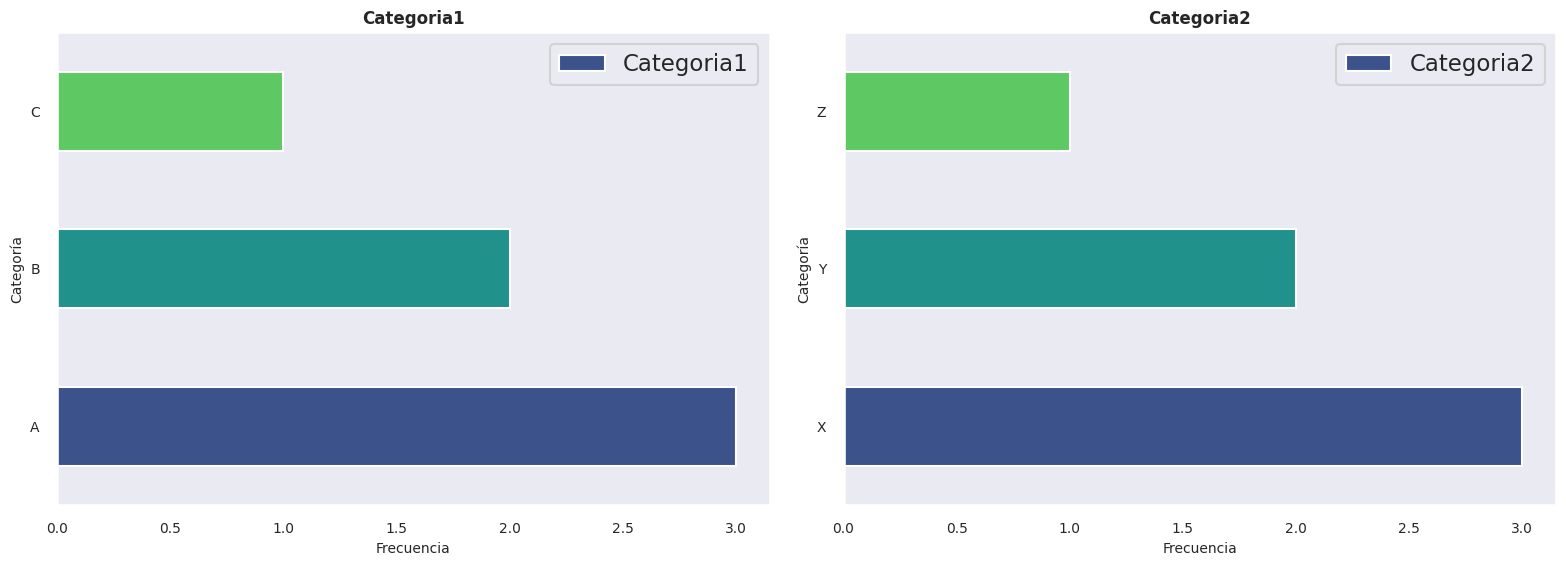

In [92]:
from math import ceil

def graficos_eda_categoricos(cat):
    # Calculamos el número de filas que necesitamos
    filas = ceil(cat.shape[1] / 2)

    # Definimos el gráfico
    f, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas * 6))

    # Aplanamos para iterar por el gráfico como si fuera 1 dimensión en lugar de 2
    ax = ax.flat

    # Creamos el bucle que crea los gráficos
    for cada, variable in enumerate(cat):
        # Usamos Seaborn para elegir una paleta de colores
        colores = sns.color_palette('viridis', len(cat[variable].unique()))

        # Graficamos
        cat[variable].value_counts().plot.barh(ax=ax[cada], color=colores)

        ax[cada].set_title(variable, fontsize=12, fontweight='bold')
        ax[cada].set_xlabel('Frecuencia', fontsize=10)
        ax[cada].set_ylabel('Categoría', fontsize=10)
        ax[cada].tick_params(labelsize=10)

        # Añadimos etiquetas y leyenda
        ax[cada].set_yticklabels(cat[variable].value_counts().index)
        ax[cada].legend([variable], loc='upper right')

    # Ajustamos el diseño
    plt.tight_layout()
    plt.show()

graficos_eda_categoricos(df)


#### 2.4 EDA VARIABLES NUMÉRICAS

---


In [93]:
def estadisticos_cont(num):
  #calcular describe
  estadisticos = num.describe().T
  #Añadimos la mediana
  estadisticos['median']= num.median()
  #recordamos para la mediana este al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #devolvemos
  return(estadisticos)

In [94]:
estadisticos_cont(df_banco.select_dtypes('number'))

count      mean  median          std    min  \
default                     1000.0     0.300     0.0     0.458487    0.0   
duration_in_month           1000.0    20.903    18.0    12.058814    4.0   
credit_amount               1000.0  3271.258  2319.5  2822.736876  250.0   
installment_as_income_perc  1000.0     2.973     3.0     1.118715    1.0   
present_res_since           1000.0     2.845     3.0     1.103718    1.0   
age                         1000.0    35.546    33.0    11.375469   19.0   
credits_this_bank           1000.0     1.407     1.0     0.577654    1.0   
people_under_maintenance    1000.0     1.155     1.0     0.362086    1.0   

                               25%     50%      75%      max  
default                        0.0     0.0     1.00      1.0  
duration_in_month             12.0    18.0    24.00     72.0  
credit_amount               1365.5  2319.5  3972.25  18424.0  
installment_as_income_perc     2.0     3.0     4.00      4.0  
present_res_since              2.0     3.0     4.00      4.0  
age                           27.0    33.0    42.00     75.0  
credits_this_bank              1.0     1.0     2.00      4.0  
people_under_maintenance       1.0     1.0     1.00      2.0

**Reemplazar textos por números:** Substituye el texto de todos los atributos categóricos por su correspondiente valor numérico referenciado

In [95]:
def procesar_datos():
    global df_banco

    # Eliminar duplicados
    df_banco = df_banco.drop_duplicates()

    # Eliminar filas con valores nulos
    df_banco = df_banco.dropna()

    # Diccionarios de mapeo
    account_check_status_mapping = {
        'no checking account': 4,
        '>= 200 DM / salary assignments for at least 1 year': 3,
        '0 <= ... < 200 DM': 2,
        '< 0 DM': 1
    }
    credit_history_mapping = {
        'no credits taken/ all credits paid back duly': 1,
        'all credits at this bank paid back duly': 2,
        'existing credits paid back duly till now': 3,
        'delay in paying off in the past': 4,
        'critical account/ other credits existing (not at this bank)': 5
    }
    purpose_mapping = {
        'car (new)': 1,
        'car (used)': 2,
        'furniture/equipment': 3,
        'radio/television': 4,
        'domestic appliances': 5,
        'repairs': 6,
        'education': 7,
        '(vacation - does not exist?)': 8,
        'retraining': 9,
        'business': 10,
        'others': 11
    }
    savings_mapping = {
        'unknown/ no savings account': 1,
        '.. >= 1000 DM ': 2,
        '500 <= ... < 1000 DM ': 3,
        '100 <= ... < 500 DM': 4,
        '... < 100 DM': 5
    }
    present_emp_since_mapping = {
        '.. >= 7 years': 1,
        '4 <= ... < 7 years': 2,
        '1 <= ... < 4 years': 3,
        '... < 1 year ': 4,
        'unemployed': 5
    }
    personal_status_sex_mapping = {
        'male : divorced/separated': 1,
        'female : divorced/separated/married': 2,
        'male : single': 3,
        'male : married/widowed': 4,
        'female : single': 5
    }
    other_debtors_mapping = {
        'none': 1,
        'co-applicant': 2,
        'guarantor': 3
    }
    property_mapping = {
        'real estate': 1,
        'if not A121 : building society savings agreement/ life insurance': 2,
        'if not A121/A122 : car or other, not in attribute 6': 3,
        'unknown / no property': 4
    }
    other_installment_plans_mapping = {
        'bank': 1,
        'stores': 2,
        'none': 3
    }
    housing_mapping = {
        'rent': 1,
        'own': 2,
        'for free': 3
    }
    job_mapping = {
        'unemployed/ unskilled - non-resident': 1,
        'unskilled - resident': 2,
        'skilled employee / official': 3,
        'management/ self-employed/ highly qualified employee/ officer': 4
    }
    telephone_mapping = {
        'yes, registered under the customers name ': 1,
        'none': 0
    }
    foreign_worker_mapping = {
        'yes': 1,
        'no': 0
    }

    # Mapeo de las columnas
    df_banco['account_check_status'] = df_banco['account_check_status'].map(account_check_status_mapping)
    df_banco['credit_history'] = df_banco['credit_history'].map(credit_history_mapping)
    df_banco['purpose'] = df_banco['purpose'].map(purpose_mapping)
    df_banco['savings'] = df_banco['savings'].map(savings_mapping)
    df_banco['present_emp_since'] = df_banco['present_emp_since'].map(present_emp_since_mapping)
    df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(personal_status_sex_mapping)
    df_banco['other_debtors'] = df_banco['other_debtors'].map(other_debtors_mapping)
    df_banco['property'] = df_banco['property'].map(property_mapping)
    df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(other_installment_plans_mapping)
    df_banco['housing'] = df_banco['housing'].map(housing_mapping)
    df_banco['job'] = df_banco['job'].map(job_mapping)
    df_banco['telephone'] = df_banco['telephone'].map(telephone_mapping)
    df_banco['foreign_worker'] = df_banco['foreign_worker'].str.strip().map(foreign_worker_mapping)

# Ejecutar la función
procesar_datos()


In [96]:
df_banco.sample(5)

default  account_check_status  duration_in_month  credit_history  \
255        0                     2                 60               4   
41         0                     2                 12               3   
64         0                     4                 24               3   
531        1                     2                 15               3   
328        0                     3                 36               3   

     purpose  credit_amount  savings  present_emp_since  \
255        5           7418        1                  3   
41         5           1158        3                  3   
64         5           3181        5                  4   
531        1           2631        4                  3   
328        5           4473        5                  1   

     installment_as_income_perc  personal_status_sex  other_debtors  \
255                           1                    3              1   
41                            3                    1              1   
64                            4                    2              1   
531                           2                    2              1   
328                           4                    3              1   

     present_res_since  property  age  other_installment_plans  housing  \
255                  1         1   27                        3        2   
41                   1         3   26                        3        2   
64                   4         2   26                        3        2   
531                  4         3   28                        3        1   
328                  2         3   31                        3        2   

     credits_this_bank  job  people_under_maintenance  telephone  \
255                  1    2                         1          0   
41                   1    3                         1          1   
64                   1    3                         1          1   
531                  2    3                         1          1   
328                  1    3                         1          0   

     foreign_worker  
255               1  
41                1  
64                1  
531               1  
328               1

In [97]:
erificamos si después de la sustitución quedó algún valor nulo
df_banco.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [98]:
#Verificamos si las estructuras de datos de las columnas son las correctas
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

In [99]:
df_banco.sample(5)

default  account_check_status  duration_in_month  credit_history  \
97         0                     2                 18               3   
849        1                     1                 12               3   
755        1                     1                 24               3   
980        1                     2                 30               5   
819        1                     1                 18               3   

     purpose  credit_amount  savings  present_emp_since  \
97        10           2622        4                  3   
849        5            709        5                  1   
755        1           1285        1                  2   
980        4           8386        5                  2   
819        5           1345        5                  3   

     installment_as_income_perc  personal_status_sex  other_debtors  \
97                            4                    3              1   
849                           4                    3              1   
755                           4                    2              1   
980                           2                    3              1   
819                           4                    4              1   

     present_res_since  property  age  other_installment_plans  housing  \
97                   4         3   34                        3        2   
849                  4         1   57                        2        2   
755                  4         4   32                        3        1   
980                  2         2   49                        3        2   
819                  3         1   26                        1        2   

     credits_this_bank  job  people_under_maintenance  telephone  \
97                   1    3                         1          0   
849                  1    2                         1          0   
755                  1    3                         1          0   
980                  1    3                         1          0   
819                  1    3                         1          0   

     foreign_worker  
97                1  
849               1  
755               1  
980               1  
819               1

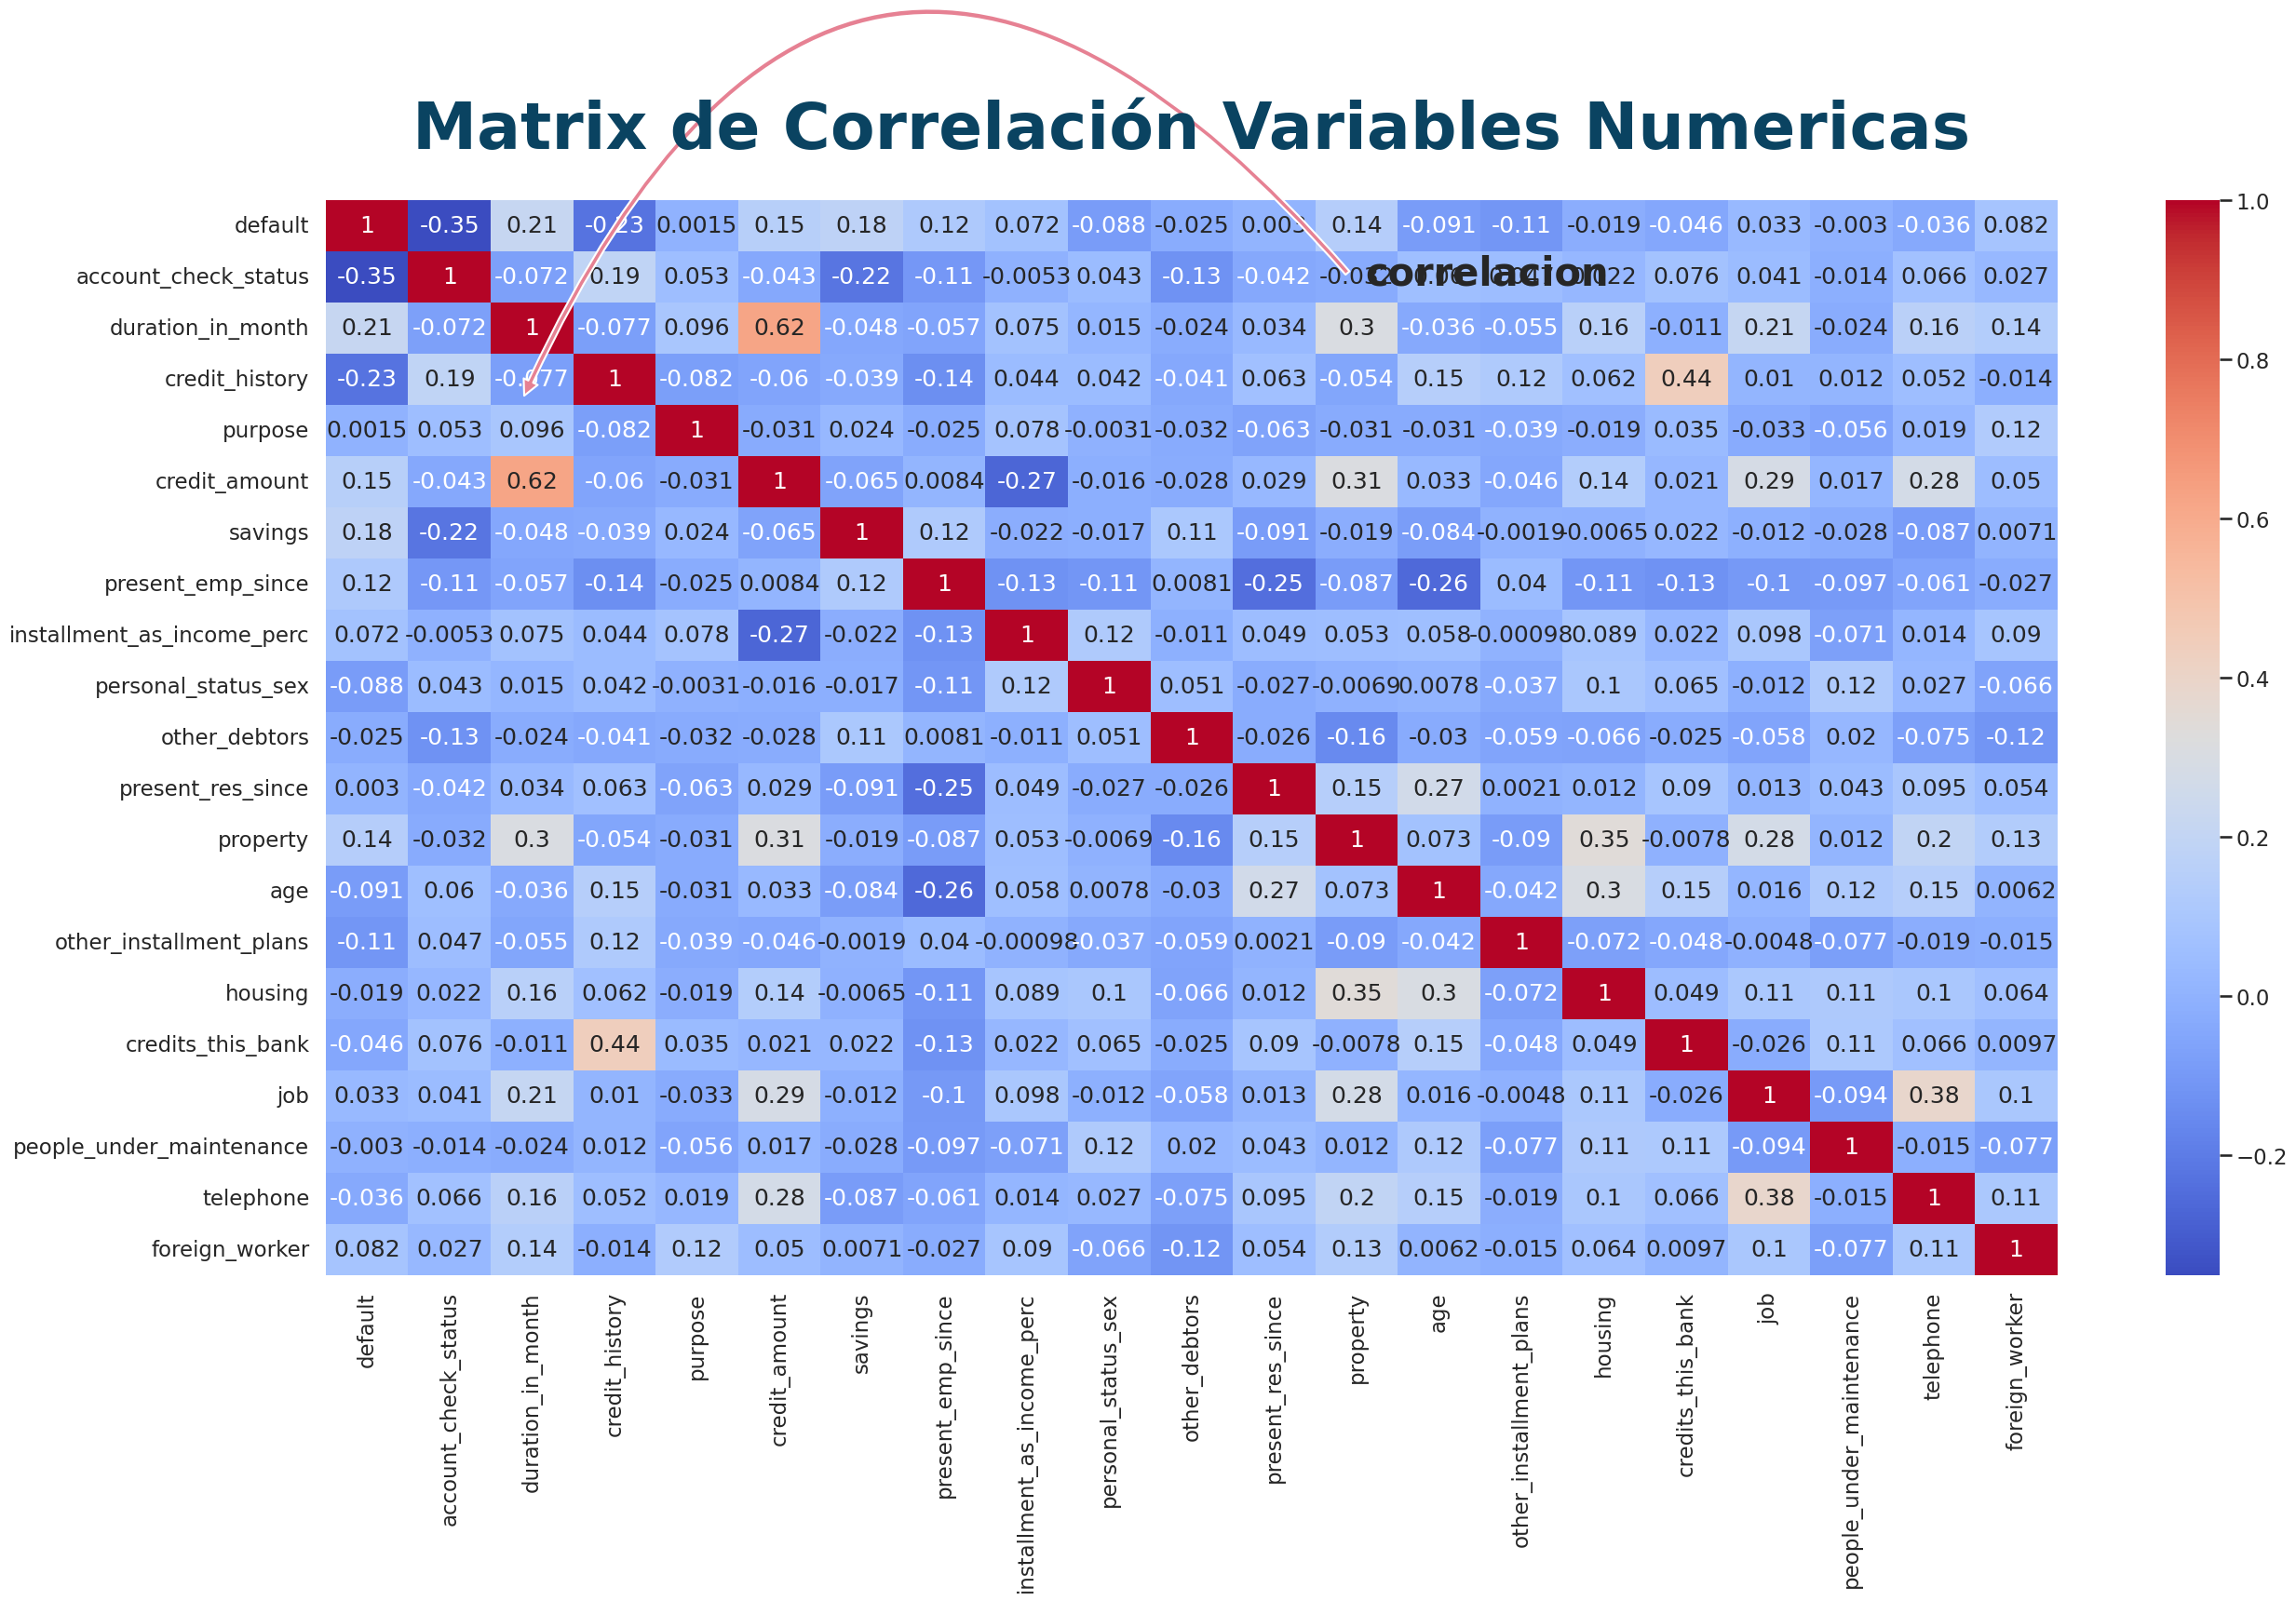

In [100]:
#Correlación Entre Variables Numéricas
corr=df_banco.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df_banco.corr(), rotation = 0)
ax.set_xticklabels(df_banco.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()

In [101]:
Información de los datos
print("Número de filas: ",df_banco.shape[0])
print("Número de Columnas:",df_banco.shape[1])
print("Datos Duplicados",df_banco.duplicated().sum())
print("Variables Categóricas: ",df_banco.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_banco.select_dtypes(exclude='object').shape[1])

Número de filas:  1000
Número de Columnas: 21
Datos Duplicados 0
Variables Categóricas:  0
Variables Numéricas:  21


In [102]:
df_banco.head()

default  account_check_status  duration_in_month  credit_history  purpose  \
0        0                     1                  6               5        5   
1        1                     2                 48               3        5   
2        0                     4                 12               5        8   
3        0                     1                 42               3        4   
4        1                     1                 24               4        1   

   credit_amount  savings  present_emp_since  installment_as_income_perc  \
0           1169        1                  1                           4   
1           5951        5                  3                           2   
2           2096        5                  2                           2   
3           7882        5                  2                           2   
4           4870        5                  3                           3   

   personal_status_sex  other_debtors  present_res_since  property  age  \
0                    3              1                  4         1   67   
1                    2              1                  2         1   22   
2                    3              1                  3         1   49   
3                    3              3                  4         2   45   
4                    3              1                  4         4   53   

   other_installment_plans  housing  credits_this_bank  job  \
0                        3        2                  2    3   
1                        3        2                  1    3   
2                        3        2                  1    2   
3                        3        3                  1    3   
4                        3        3                  2    3   

   people_under_maintenance  telephone  foreign_worker  
0                         1          1               1  
1                         1          0               1  
2                         2          0               1  
3                         2          0               1  
4                         2          0               1

#**3. Exploración de Datos**


---


Lo que haremos será convertir todos los valores numéricos de altos valores en rangos. Esto con la finalidad de poder realizar el análisis de manera adecuada.

In [103]:
def convertir_numericas_a_discretas(df):
 df_banco = df_banco.copy() # Crea una copia del dataframe para evitar cambios en el original

    # Definimos una función para la transformación de las columnas
def transformar_columna(df, columna, inicio, fin, paso):
    intervalos = [inicio] + list(range(inicio + paso, fin + paso, paso))
    etiquetas = list(range(1, len(intervalos)))
    df_banco[f'rango_{columna}'] = pd.cut(df_banco[columna], bins=intervalos, labels=etiquetas, right=False).astype('int64')
    return df_banco

    # Aplicamos a función a las columnas necesarias
    df_banco = transformar_columna(df_banco, 'duration_in_month', 1, 72, 12)
    df_banco = transformar_columna(df_banco, 'credit_amount', 1, 20000, 1000)
    df_banco = transformar_columna(df_banco, 'age', 18, 80, 10)

    return df_banco

In [104]:
df_banco.sample(5)

default  account_check_status  duration_in_month  credit_history  \
424        1                     2                 12               3   
439        1                     3                 12               2   
594        1                     1                 24               2   
410        0                     2                 24               3   
190        1                     4                 24               3   

     purpose  credit_amount  savings  present_emp_since  \
424        4           2762        1                  1   
439       10            609        5                  4   
594        3           1358        1                  1   
410        5           1967        5                  1   
190       10           4591        2                  3   

     installment_as_income_perc  personal_status_sex  other_debtors  \
424                           1                    2              1   
439                           4                    2              1   
594                           4                    3              1   
410                           4                    2              1   
190                           2                    3              1   

     present_res_since  property  age  other_installment_plans  housing  \
424                  2         2   25                        1        2   
439                  1         1   26                        3        2   
594                  3         3   40                        2        2   
410                  4         3   20                        3        2   
190                  3         2   54                        3        2   

     credits_this_bank  job  people_under_maintenance  telephone  \
424                  1    3                         1          1   
439                  1    1                         1          0   
594                  1    4                         1          1   
410                  1    3                         1          1   
190                  3    4                         1          1   

     foreign_worker  
424               1  
439               1  
594               1  
410               1  
190               1

In [105]:
#Transformar variables a discretas
variables_discretas=["personal_status_sex", "age", "duration_in_month",
                     "credit_amount","default"]
df_banco[variables_discretas].tail(6)



personal_status_sex  age  duration_in_month  credit_amount  default
994                    3   50                 12           2390        0
995                    2   31                 12           1736        0
996                    1   40                 30           3857        0
997                    3   38                 12            804        0
998                    3   23                 45           1845        1
999                    3   27                 45           4576        0

El feature engineering es el proceso mediante el cual seleccionamos, transformamos y creamos atributos a partir de los datos del dataset para mejorar el rendimiento de los modelos de machine learning que queremos implementar.

Vamos a crear dos columnas más, a partir de la variable **'personal_status_sex'**, donde separaremos el **'sexo'** y el **'estado_civil'**, esto con la finalidad de discretizar de mejor manera estos valores y para el posterior análisis.
> * SEXO
    * **1** : Para el sexo femenino
    * **0** : Para el sexo masculino
    
> * ESTADO CIVIL
    * **1** : Para los solteros
    * **0** : Para todos los demás casos


In [106]:
#verificamos el personal status
df_banco['personal_status_sex'].unique()

array([3, 2, 1, 4])

En este caso, notamos que no existe valores para la categoría 5, la cual era 'female : single'. Dado esto, solo tenemos Hombres solteros en todo nuestro dataset.

In [107]:
## Para nuestra nueva variable 'sexo'
a = { 2 : 1,
     1 : 0,
     3 : 0,
     4 : 0
    }
df_banco['sexo'] = df_banco['personal_status_sex'].map(a)

## Para nuestra nueva variable 'estado_civil'
a = { 3 : 1,
     1 : 0,
     2 : 0,
     4 : 0
    }
df_banco['estado_civil'] = df_banco['personal_status_sex'].map(a)

In [108]:
## Verificamos en nuestro dataset, tanto nuestra variable inicial como nuestras variables creadas
df_banco[['personal_status_sex','sexo','estado_civil']]

personal_status_sex  sexo  estado_civil
0                      3     0             1
1                      2     1             0
2                      3     0             1
3                      3     0             1
4                      3     0             1
..                   ...   ...           ...
995                    2     1             0
996                    1     0             0
997                    3     0             1
998                    3     0             1
999                    3     0             1

[1000 rows x 3 columns]

In [109]:
df_banco['personal_status_sex'].unique()

array([3, 2, 1, 4])

In [110]:
df_banco['sexo'].unique()

array([0, 1])

In [111]:
df_banco['estado_civil'].unique()

array([1, 0])

Lo que realizaremos a continuación, será eliminar las variables que no utilizaremos, ya que muchas variables fueron creadas de las variables iniciales, indicaremos cuales serán descartadas.

In [112]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker', 'sexo',
       'estado_civil'],
      dtype='object')

In [113]:
df_banco.head(2)

default  account_check_status  duration_in_month  credit_history  purpose  \
0        0                     1                  6               5        5   
1        1                     2                 48               3        5   

   credit_amount  savings  present_emp_since  installment_as_income_perc  \
0           1169        1                  1                           4   
1           5951        5                  3                           2   

   personal_status_sex  other_debtors  present_res_since  property  age  \
0                    3              1                  4         1   67   
1                    2              1                  2         1   22   

   other_installment_plans  housing  credits_this_bank  job  \
0                        3        2                  2    3   
1                        3        2                  1    3   

   people_under_maintenance  telephone  foreign_worker  sexo  estado_civil  
0                         1          1               1     0             1  
1                         1          0               1     1             0

In [114]:
df_banco = df_banco.drop(columns= ['personal_status_sex','age'])
df_banco.head()

default  account_check_status  duration_in_month  credit_history  purpose  \
0        0                     1                  6               5        5   
1        1                     2                 48               3        5   
2        0                     4                 12               5        8   
3        0                     1                 42               3        4   
4        1                     1                 24               4        1   

   credit_amount  savings  present_emp_since  installment_as_income_perc  \
0           1169        1                  1                           4   
1           5951        5                  3                           2   
2           2096        5                  2                           2   
3           7882        5                  2                           2   
4           4870        5                  3                           3   

   other_debtors  present_res_since  property  other_installment_plans  \
0              1                  4         1                        3   
1              1                  2         1                        3   
2              1                  3         1                        3   
3              3                  4         2                        3   
4              1                  4         4                        3   

   housing  credits_this_bank  job  people_under_maintenance  telephone  \
0        2                  2    3                         1          1   
1        2                  1    3                         1          0   
2        2                  1    2                         2          0   
3        3                  1    3                         2          0   
4        3                  2    3                         2          0   

   foreign_worker  sexo  estado_civil  
0               1     0             1  
1               1     1             0  
2               1     0             1  
3               1     0             1  
4               1     0             1

In [115]:
## Validando que no tengamos valores nulos || Todos nuestros valores son numéricos y de tipo entero
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   other_debtors               1000 non-null   int64
 10  present_res_since           1000 non-null   int64
 11  property                    1000 non-null   int64
 12  other_installment_plans     1000 non-null   int64
 13  housing                     1000 non-null   int64
 14  credits_t

In [116]:
df_banco.describe()

default  account_check_status  duration_in_month  credit_history  \
count  1000.000000           1000.000000        1000.000000      1000.00000   
mean      0.300000              2.577000          20.903000         3.54500   
std       0.458487              1.257638          12.058814         1.08312   
min       0.000000              1.000000           4.000000         1.00000   
25%       0.000000              1.000000          12.000000         3.00000   
50%       0.000000              2.000000          18.000000         3.00000   
75%       1.000000              4.000000          24.000000         5.00000   
max       1.000000              4.000000          72.000000         5.00000   

           purpose  credit_amount      savings  present_emp_since  \
count  1000.000000    1000.000000  1000.000000        1000.000000   
mean      4.277000    3271.258000     3.895000           2.616000   
std       2.739302    2822.736876     1.580023           1.208306   
min       1.000000     250.000000     1.000000           1.000000   
25%       2.000000    1365.500000     3.000000           1.000000   
50%       4.000000    2319.500000     5.000000           3.000000   
75%       5.000000    3972.250000     5.000000           3.000000   
max      10.000000   18424.000000     5.000000           5.000000   

       installment_as_income_perc  other_debtors  present_res_since  \
count                 1000.000000    1000.000000        1000.000000   
mean                     2.973000       1.145000           2.845000   
std                      1.118715       0.477706           1.103718   
min                      1.000000       1.000000           1.000000   
25%                      2.000000       1.000000           2.000000   
50%                      3.000000       1.000000           3.000000   
75%                      4.000000       1.000000           4.000000   
max                      4.000000       3.000000           4.000000   

          property  other_installment_plans      housing  credits_this_bank  \
count  1000.000000              1000.000000  1000.000000        1000.000000   
mean      2.358000                 2.675000     1.929000           1.407000   
std       1.050209                 0.705601     0.531264           0.577654   
min       1.000000                 1.000000     1.000000           1.000000   
25%       1.000000                 3.000000     2.000000           1.000000   
50%       2.000000                 3.000000     2.000000           1.000000   
75%       3.000000                 3.000000     2.000000           2.000000   
max       4.000000                 3.000000     3.000000           4.000000   

               job  people_under_maintenance    telephone  foreign_worker  \
count  1000.000000               1000.000000  1000.000000     1000.000000   
mean      2.904000                  1.155000     0.404000        0.963000   
std       0.653614                  0.362086     0.490943        0.188856   
min       1.000000                  1.000000     0.000000        0.000000   
25%       3.000000                  1.000000     0.000000        1.000000   
50%       3.000000                  1.000000     0.000000        1.000000   
75%       3.000000                  1.000000     1.000000        1.000000   
max       4.000000                  2.000000     1.000000        1.000000   

              sexo  estado_civil  
count  1000.000000    1000.00000  
mean      0.310000       0.54800  
std       0.462725       0.49794  
min       0.000000       0.00000  
25%       0.000000       0.00000  
50%       0.000000       1.00000  
75%       1.000000       1.00000  
max       1.000000       1.00000

In [117]:
df_banco.head()

default  account_check_status  duration_in_month  credit_history  purpose  \
0        0                     1                  6               5        5   
1        1                     2                 48               3        5   
2        0                     4                 12               5        8   
3        0                     1                 42               3        4   
4        1                     1                 24               4        1   

   credit_amount  savings  present_emp_since  installment_as_income_perc  \
0           1169        1                  1                           4   
1           5951        5                  3                           2   
2           2096        5                  2                           2   
3           7882        5                  2                           2   
4           4870        5                  3                           3   

   other_debtors  present_res_since  property  other_installment_plans  \
0              1                  4         1                        3   
1              1                  2         1                        3   
2              1                  3         1                        3   
3              3                  4         2                        3   
4              1                  4         4                        3   

   housing  credits_this_bank  job  people_under_maintenance  telephone  \
0        2                  2    3                         1          1   
1        2                  1    3                         1          0   
2        2                  1    2                         2          0   
3        3                  1    3                         2          0   
4        3                  2    3                         2          0   

   foreign_worker  sexo  estado_civil  
0               1     0             1  
1               1     1             0  
2               1     0             1  
3               1     0             1  
4               1     0             1

## 3.1 <ins>Análisis Univariado</ins>

Realizamos un análisis inicial de la Variable target ('default'), esto con la finalidad de observar la distribución de este valor en nuestro dataframe. Se realizan dos gráficos, el de barras y el de torta. Este último para observar los porcentajes.


In [118]:
target = 'default'

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc', 'other_debtors',
       'present_res_since', 'property', 'other_installment_plans', 'housing',
       'credits_this_bank', 'job', 'people_under_maintenance', 'telephone',
       'foreign_worker', 'sexo', 'estado_civil'],
      dtype='object')


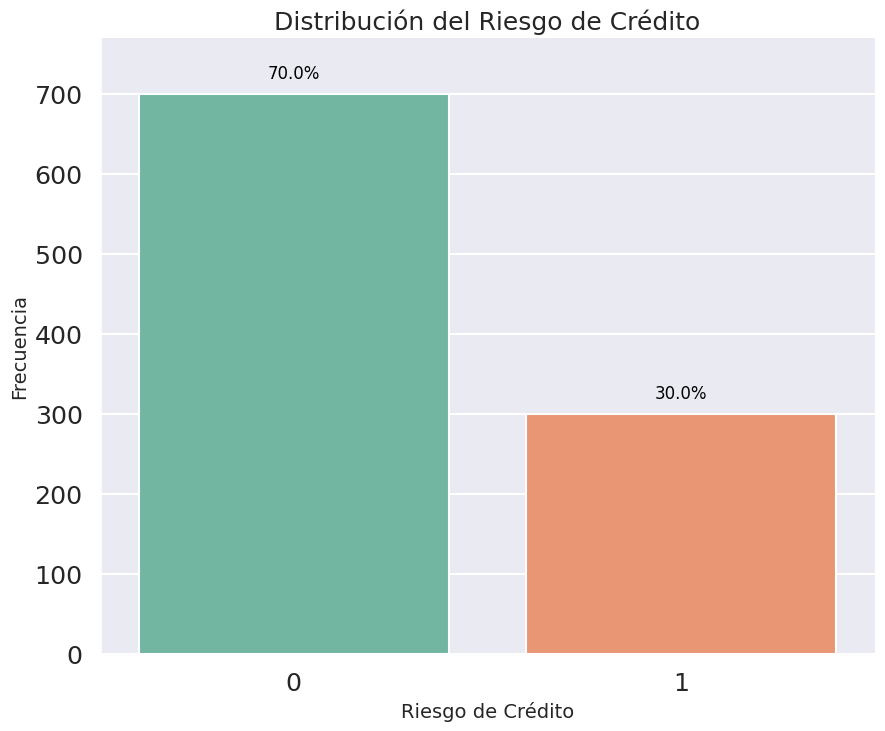

In [123]:

#'target' como la columna que quieres graficar
# Verificamos los nombres de las columnas del DataFrame
print(df_banco.columns)

# Defimos el nombre correcto de la columna
target = 'default'  # Cambia esto al nombre correcto

#  la columna existe en el DataFrame
if target in df_banco.columns:
    # Gráfico de barras
    plt.figure(figsize=(10, 8))

    # Establecemos el estilo de Seaborn
    sns.set(style="darkgrid", context="talk", font_scale=1.1)

    # Creamos el gráfico de barras
    ax = sns.countplot(x=target, data=df_banco, palette="Set2")

    # Añadimos porcentajes a las barras
    total = len(df_banco)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 0.02 * total  # Ajusta el 0.02 para cambiar la altura del texto
        ax.annotate(percentage, (x, y), ha='center', fontsize=12, color='black')

    # Añadimos título y etiquetas
    ax.set_title('Distribución del Riesgo de Crédito', fontsize=18)
    ax.set_xlabel('Riesgo de Crédito', fontsize=14)
    ax.set_ylabel('Frecuencia', fontsize=14)

    # Ajustamos los límites del eje Y
    ax.set_ylim(0, df_banco[target].value_counts().max() * 1.1)

    # Eliminamos los bordes desagradables
    sns.despine()

    # Mostramos el gráfico
    plt.show()
else:
    print(f"La columna '{target}' no se encuentra en el DataFrame.")


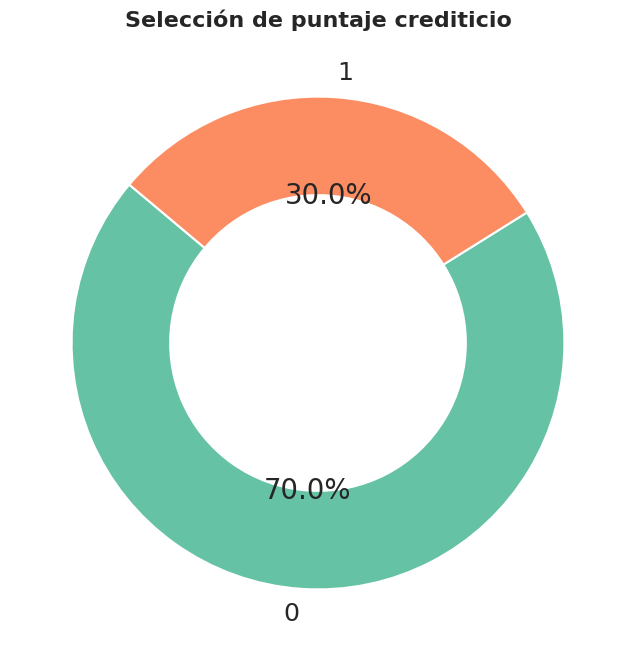

In [124]:
#nombre correcto de la columna objetivo
target = 'default'  # Cambia esto al nombre correcto de tu columna

# Comprueba si la columna existe en el DataFrame
if target in df_banco.columns:
    # Obtener valores y etiquetas
    valores = df_banco[target].value_counts()
    etiquetas = valores.index

    # Configurar colores
    colores = sns.color_palette('Set2', len(etiquetas))

    # Configurar el tamaño de la figura
    plt.figure(figsize=(8, 8))

    # Graficar un gráfico de dona
    plt.pie(valores, labels=etiquetas, autopct="%1.1f%%", colors=colores,
            wedgeprops=dict(width=0.4, edgecolor='w'), startangle=140)

    # Añadir un círculo en el centro para crear el efecto de dona
    centro_circulo = plt.Circle((0, 0), 0.3, color='white', linewidth=0)
    plt.gca().add_artist(centro_circulo)

    # Añadir título
    plt.title('Selección de puntaje crediticio', fontsize=16, weight='bold')

    # Mostrar la gráfica
    plt.show()
else:
    print(f"La columna '{target}' no se encuentra en el DataFrame.")


### 3.1.2 Análisis Univariado: Variables numéricas

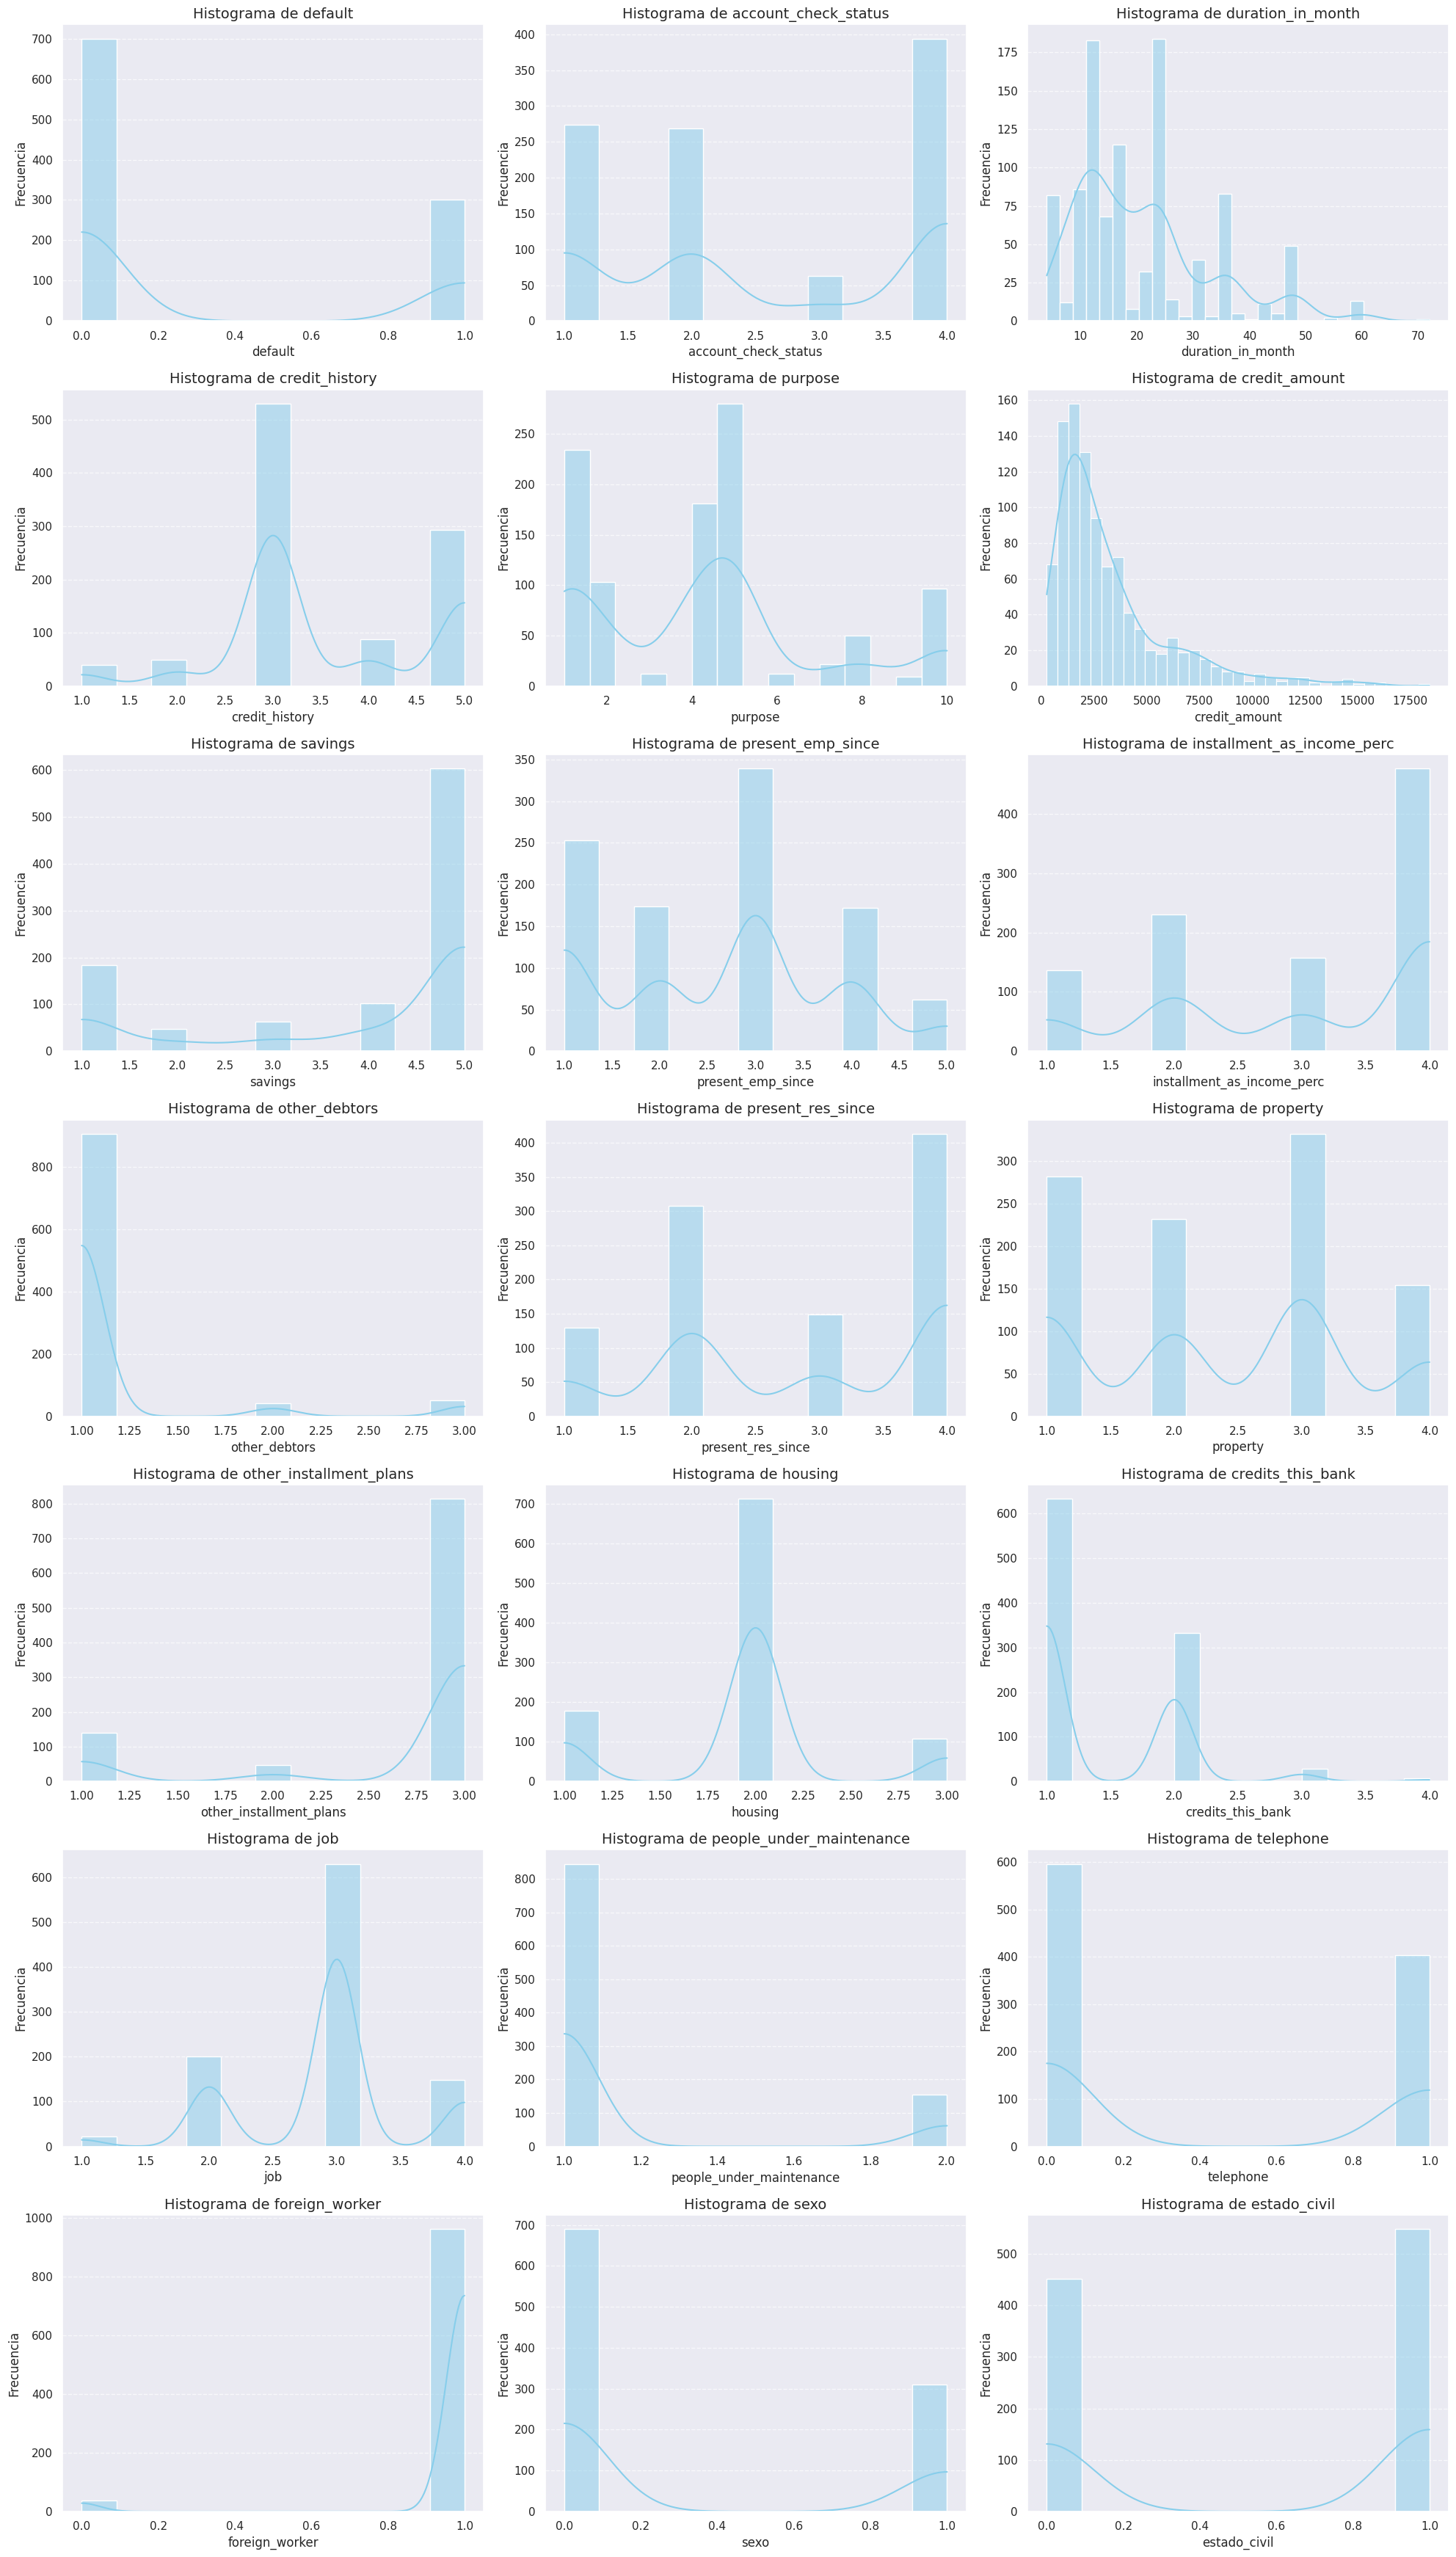

In [125]:
# Configuramos el tamaño de la figura
plt.rcParams['figure.figsize'] = [20, 20]

# Configuramos el estilo de Seaborn
sns.set(style="dark")

# Obtener el número de columnas del DataFrame
num_columnas = len(df_banco.columns)

# Definir el número de filas y columnas para organizar los gráficos
num_filas = (num_columnas // 3) + (num_columnas % 3 > 0)
num_columnas = 3

# Creamos subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 5 * num_filas))

# Aplanamos los subgráficos para facilitar la iteración
axs = axs.flatten()

# Iteramos sobre las columnas y generamos los histogramas
for i, columna in enumerate(df_banco.columns):
    sns.histplot(df_banco[columna], ax=axs[i], kde=True, color='skyblue')
    axs[i].set_title(f'Histograma de {columna}', fontsize=14)
    axs[i].set_xlabel(columna, fontsize=12)
    axs[i].set_ylabel('Frecuencia', fontsize=12)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustamos el diseño y mostramos los gráficos
plt.tight_layout()
plt.show()


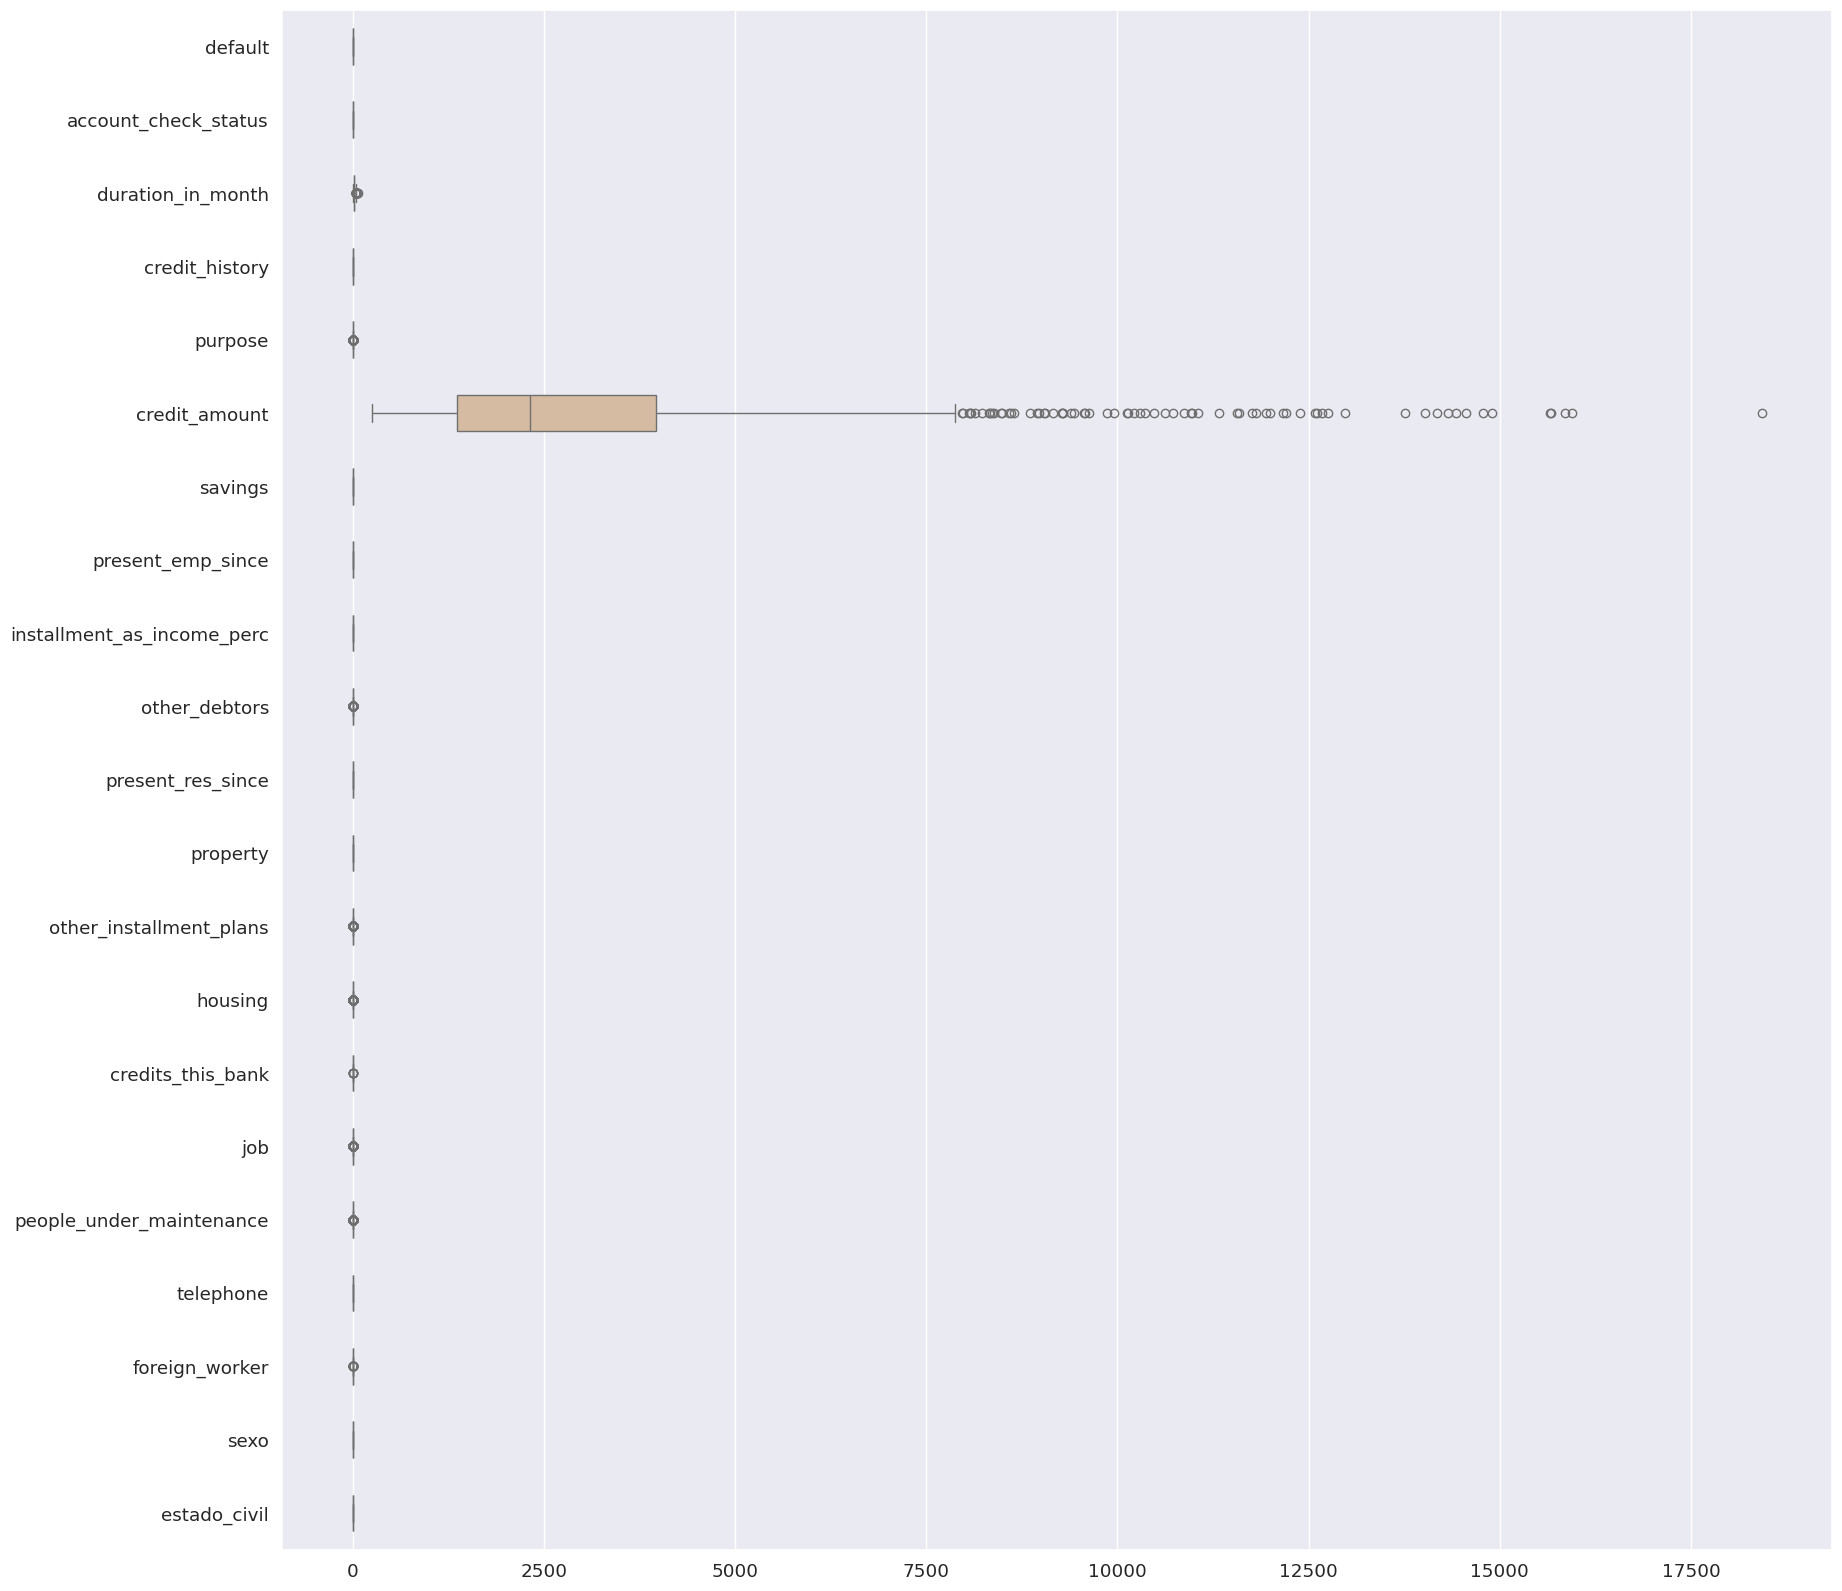

In [126]:
# Dibujamos gráfica de boxplot de todos los atributos
plt.rcParams['figure.figsize'] = [20,20];
sns.set(style="dark")
sns.set(font_scale=1.2)
#df_banco.boxplot(rot=60, figsize=(20,20))
sns.boxplot(data=df_banco, orient="h", palette="pastel", width=0.5)
plt.show()

In [128]:
df_banco.describe()

default  account_check_status  duration_in_month  credit_history  \
count  1000.000000           1000.000000        1000.000000      1000.00000   
mean      0.300000              2.577000          20.903000         3.54500   
std       0.458487              1.257638          12.058814         1.08312   
min       0.000000              1.000000           4.000000         1.00000   
25%       0.000000              1.000000          12.000000         3.00000   
50%       0.000000              2.000000          18.000000         3.00000   
75%       1.000000              4.000000          24.000000         5.00000   
max       1.000000              4.000000          72.000000         5.00000   

           purpose  credit_amount      savings  present_emp_since  \
count  1000.000000    1000.000000  1000.000000        1000.000000   
mean      4.277000    3271.258000     3.895000           2.616000   
std       2.739302    2822.736876     1.580023           1.208306   
min       1.000000     250.000000     1.000000           1.000000   
25%       2.000000    1365.500000     3.000000           1.000000   
50%       4.000000    2319.500000     5.000000           3.000000   
75%       5.000000    3972.250000     5.000000           3.000000   
max      10.000000   18424.000000     5.000000           5.000000   

       installment_as_income_perc  other_debtors  present_res_since  \
count                 1000.000000    1000.000000        1000.000000   
mean                     2.973000       1.145000           2.845000   
std                      1.118715       0.477706           1.103718   
min                      1.000000       1.000000           1.000000   
25%                      2.000000       1.000000           2.000000   
50%                      3.000000       1.000000           3.000000   
75%                      4.000000       1.000000           4.000000   
max                      4.000000       3.000000           4.000000   

          property  other_installment_plans      housing  credits_this_bank  \
count  1000.000000              1000.000000  1000.000000        1000.000000   
mean      2.358000                 2.675000     1.929000           1.407000   
std       1.050209                 0.705601     0.531264           0.577654   
min       1.000000                 1.000000     1.000000           1.000000   
25%       1.000000                 3.000000     2.000000           1.000000   
50%       2.000000                 3.000000     2.000000           1.000000   
75%       3.000000                 3.000000     2.000000           2.000000   
max       4.000000                 3.000000     3.000000           4.000000   

               job  people_under_maintenance    telephone  foreign_worker  \
count  1000.000000               1000.000000  1000.000000     1000.000000   
mean      2.904000                  1.155000     0.404000        0.963000   
std       0.653614                  0.362086     0.490943        0.188856   
min       1.000000                  1.000000     0.000000        0.000000   
25%       3.000000                  1.000000     0.000000        1.000000   
50%       3.000000                  1.000000     0.000000        1.000000   
75%       3.000000                  1.000000     1.000000        1.000000   
max       4.000000                  2.000000     1.000000        1.000000   

              sexo  estado_civil  
count  1000.000000    1000.00000  
mean      0.310000       0.54800  
std       0.462725       0.49794  
min       0.000000       0.00000  
25%       0.000000       0.00000  
50%       0.000000       1.00000  
75%       1.000000       1.00000  
max       1.000000       1.00000

* Según los gráficos de Boxplot e Histograma analizados, observamos la presencia de posibles atípicos en 3 variables:  rango_plazos_credito y purpose**.


* Los atípicos para estas variables se observan por la parte del máximo valor de la variable, ya que el valor quantil 75, está alejado del máximo. De todas maneras esto se visualizará posteriormente.


* El resto de variables, observamos que se manejan de forma adecuada, la distancia entre la media con los mínimos y máximos no es considerable. Además los quantiles 25 y 75 no están tan alejados del mínimo y máximo de la variable respectivamente. Esto nos demuestra la no presencia de atípicos para estas variables.

### 3.1.3 Tratamiento de Atípicos

In [129]:
df_banco.head()

default  account_check_status  duration_in_month  credit_history  purpose  \
0        0                     1                  6               5        5   
1        1                     2                 48               3        5   
2        0                     4                 12               5        8   
3        0                     1                 42               3        4   
4        1                     1                 24               4        1   

   credit_amount  savings  present_emp_since  installment_as_income_perc  \
0           1169        1                  1                           4   
1           5951        5                  3                           2   
2           2096        5                  2                           2   
3           7882        5                  2                           2   
4           4870        5                  3                           3   

   other_debtors  present_res_since  property  other_installment_plans  \
0              1                  4         1                        3   
1              1                  2         1                        3   
2              1                  3         1                        3   
3              3                  4         2                        3   
4              1                  4         4                        3   

   housing  credits_this_bank  job  people_under_maintenance  telephone  \
0        2                  2    3                         1          1   
1        2                  1    3                         1          0   
2        2                  1    2                         2          0   
3        3                  1    3                         2          0   
4        3                  2    3                         2          0   

   foreign_worker  sexo  estado_civil  
0               1     0             1  
1               1     1             0  
2               1     0             1  
3               1     0             1  
4               1     0             1

In [130]:
df_banco[['credit_amount','purpose','duration_in_month']]

credit_amount  purpose  duration_in_month
0             1169        5                  6
1             5951        5                 48
2             2096        8                 12
3             7882        4                 42
4             4870        1                 24
..             ...      ...                ...
995           1736        4                 12
996           3857        2                 30
997            804        5                 12
998           1845        5                 45
999           4576        2                 45

[1000 rows x 3 columns]

In [131]:
df_banco[['credit_amount','purpose','duration_in_month']].describe(percentiles=[0.01,0.025,0.05,0.1,0.5,0.75])

credit_amount      purpose  duration_in_month
count    1000.000000  1000.000000        1000.000000
mean     3271.258000     4.277000          20.903000
std      2822.736876     2.739302          12.058814
min       250.000000     1.000000           4.000000
1%        425.830000     1.000000           6.000000
2.5%      609.000000     1.000000           6.000000
5%        708.950000     1.000000           6.000000
10%       932.000000     1.000000           9.000000
50%      2319.500000     4.000000          18.000000
75%      3972.250000     5.000000          24.000000
max     18424.000000    10.000000          72.000000

In [132]:
df_banco[['credit_amount','purpose','duration_in_month']].describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.99])

credit_amount      purpose  duration_in_month
count    1000.000000  1000.000000        1000.000000
mean     3271.258000     4.277000          20.903000
std      2822.736876     2.739302          12.058814
min       250.000000     1.000000           4.000000
50%      2319.500000     4.000000          18.000000
75%      3972.250000     5.000000          24.000000
90%      7179.400000     9.000000          36.000000
95%      9162.700000    10.000000          48.000000
97.5%   11594.250000    10.000000          48.000000
99%     14180.390000    10.000000          60.000000
max     18424.000000    10.000000          72.000000

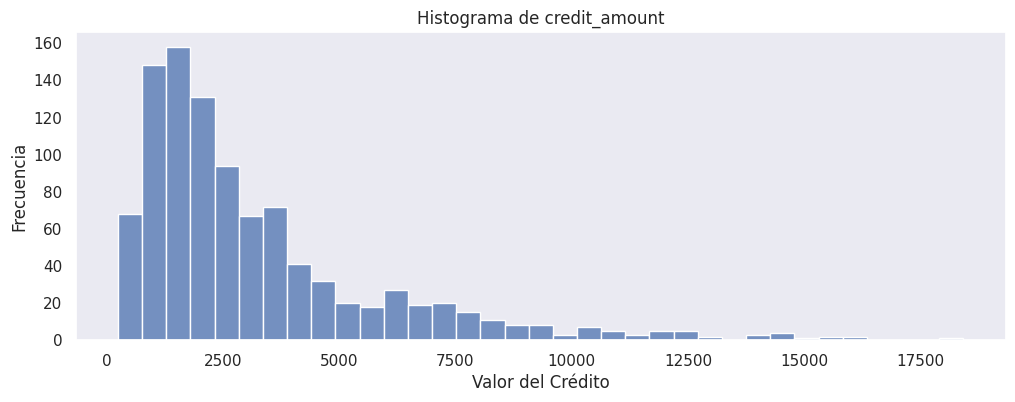

In [133]:
## Gráfico de Histograma previo al truncamiento por percentiles
plt.figure(figsize=(12, 4))
sns.set(style="dark")
sns.histplot(data=df_banco['credit_amount'], palette='Set2')
plt.title('Histograma de credit_amount')
plt.xlabel('Valor del Crédito')
plt.ylabel('Frecuencia')
plt.show()

* Acotaremos al percentil 99, debido a que no queremos perder demasiada información, recordemos que estos valores ya habian sido ajustados previamente cuando discretizamos nuestro conjunto de datos. De todas maneras es necesario hacer el Truncamiento debido a que la presencia de atípicos es notoria. Sin embargo, esto no hará que se elimine del todo los atípicos pero nos ayudará a mejorar un poco nuestro análisis.

In [134]:
# Calculamos los percentiles p1 y p99
p1 = np.percentile(df_banco['credit_amount'],1)
p99 = np.percentile(df_banco['credit_amount'],99)
p1, p99

(425.83, 14180.39)

In [135]:
## Imputando los valores con la función clip, acotamos entre los percentiles seleccionados
df_banco['credit_amount'] = np.clip(df_banco['credit_amount'],p1,p99)

In [136]:
## Realizamos un análisis descriptivo para nuestras tres variables
df_banco[['credit_amount','purpose','duration_in_month']].describe()

credit_amount      purpose  duration_in_month
count    1000.000000  1000.000000        1000.000000
mean     3259.335200     4.277000          20.903000
std      2766.919812     2.739302          12.058814
min       425.830000     1.000000           4.000000
25%      1365.500000     2.000000          12.000000
50%      2319.500000     4.000000          18.000000
75%      3972.250000     5.000000          24.000000
max     14180.390000    10.000000          72.000000

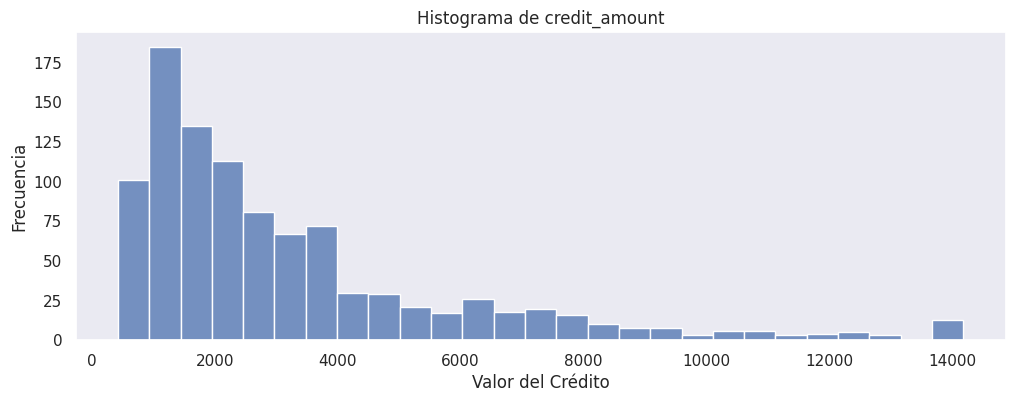

In [137]:
## Gráfico de Histograma previo al truncamiento por percentiles
plt.figure(figsize=(12, 4))
sns.set(style="dark")
sns.histplot(data=df_banco['credit_amount'], palette='Set2')
plt.title('Histograma de credit_amount')
plt.xlabel('Valor del Crédito')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df_banco.describe()

default  account_check_status  duration_in_month  credit_history  \
count  1000.000000           1000.000000        1000.000000      1000.00000   
mean      0.300000              2.577000          20.903000         3.54500   
std       0.458487              1.257638          12.058814         1.08312   
min       0.000000              1.000000           4.000000         1.00000   
25%       0.000000              1.000000          12.000000         3.00000   
50%       0.000000              2.000000          18.000000         3.00000   
75%       1.000000              4.000000          24.000000         5.00000   
max       1.000000              4.000000          72.000000         5.00000   

           purpose  credit_amount      savings  present_emp_since  \
count  1000.000000    1000.000000  1000.000000        1000.000000   
mean      4.277000    3259.335200     3.895000           2.616000   
std       2.739302    2766.919812     1.580023           1.208306   
min       1.000000     425.830000     1.000000           1.000000   
25%       2.000000    1365.500000     3.000000           1.000000   
50%       4.000000    2319.500000     5.000000           3.000000   
75%       5.000000    3972.250000     5.000000           3.000000   
max      10.000000   14180.390000     5.000000           5.000000   

       installment_as_income_perc  other_debtors  present_res_since  \
count                 1000.000000    1000.000000        1000.000000   
mean                     2.973000       1.145000           2.845000   
std                      1.118715       0.477706           1.103718   
min                      1.000000       1.000000           1.000000   
25%                      2.000000       1.000000           2.000000   
50%                      3.000000       1.000000           3.000000   
75%                      4.000000       1.000000           4.000000   
max                      4.000000       3.000000           4.000000   

          property  other_installment_plans      housing  credits_this_bank  \
count  1000.000000              1000.000000  1000.000000        1000.000000   
mean      2.358000                 2.675000     1.929000           1.407000   
std       1.050209                 0.705601     0.531264           0.577654   
min       1.000000                 1.000000     1.000000           1.000000   
25%       1.000000                 3.000000     2.000000           1.000000   
50%       2.000000                 3.000000     2.000000           1.000000   
75%       3.000000                 3.000000     2.000000           2.000000   
max       4.000000                 3.000000     3.000000           4.000000   

               job  people_under_maintenance    telephone  foreign_worker  \
count  1000.000000               1000.000000  1000.000000     1000.000000   
mean      2.904000                  1.155000     0.404000        0.963000   
std       0.653614                  0.362086     0.490943        0.188856   
min       1.000000                  1.000000     0.000000        0.000000   
25%       3.000000                  1.000000     0.000000        1.000000   
50%       3.000000                  1.000000     0.000000        1.000000   
75%       3.000000                  1.000000     1.000000        1.000000   
max       4.000000                  2.000000     1.000000        1.000000   

              sexo  estado_civil  
count  1000.000000    1000.00000  
mean      0.310000       0.54800  
std       0.462725       0.49794  
min       0.000000       0.00000  
25%       0.000000       0.00000  
50%       0.000000       1.00000  
75%       1.000000       1.00000  
max       1.000000       1.00000

## 3.2 Análisis Bivariado

In [138]:
## Seleccionamos todas nuestras variables a excepción del target
variables = df_banco.drop(columns='default').columns
variables

Index(['account_check_status', 'duration_in_month', 'credit_history',
       'purpose', 'credit_amount', 'savings', 'present_emp_since',
       'installment_as_income_perc', 'other_debtors', 'present_res_since',
       'property', 'other_installment_plans', 'housing', 'credits_this_bank',
       'job', 'people_under_maintenance', 'telephone', 'foreign_worker',
       'sexo', 'estado_civil'],
      dtype='object')

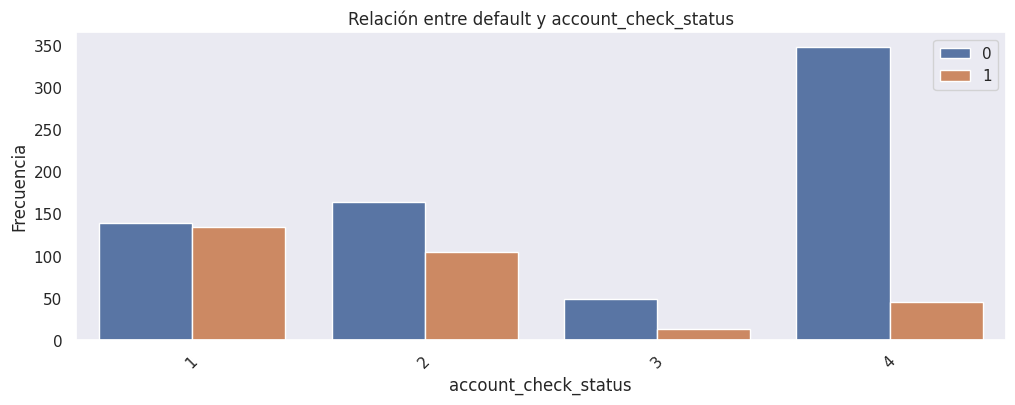

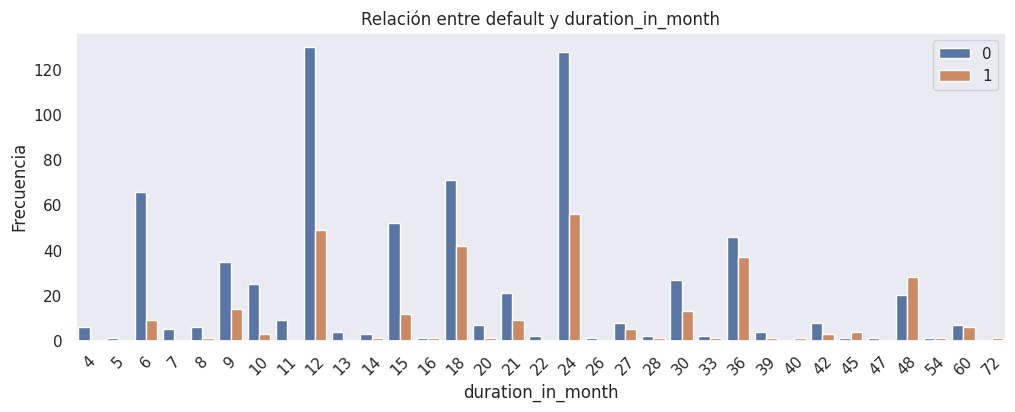

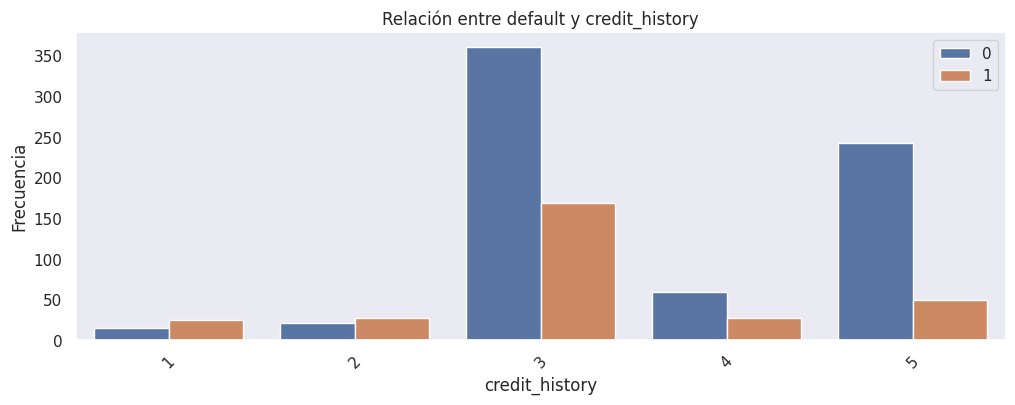

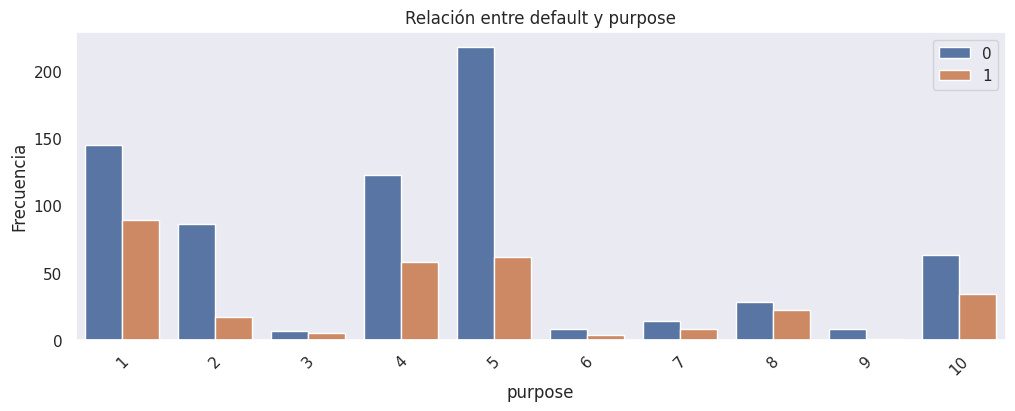

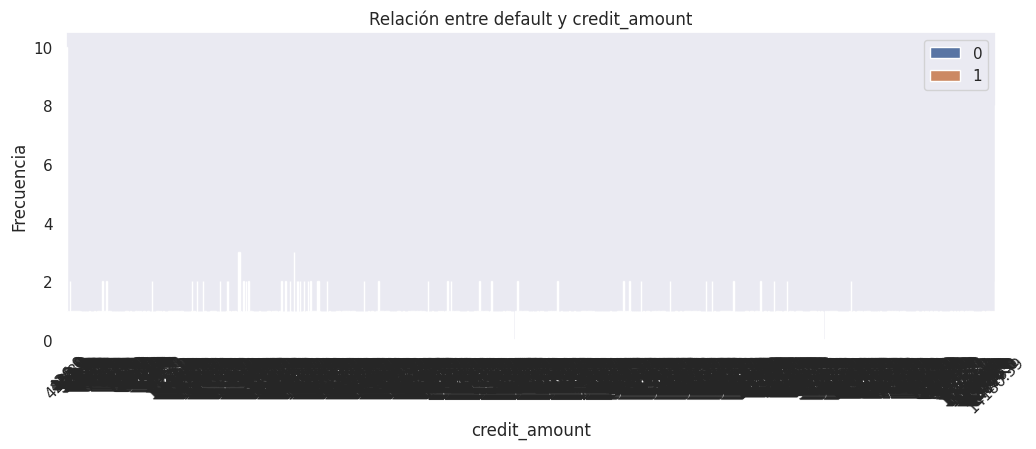

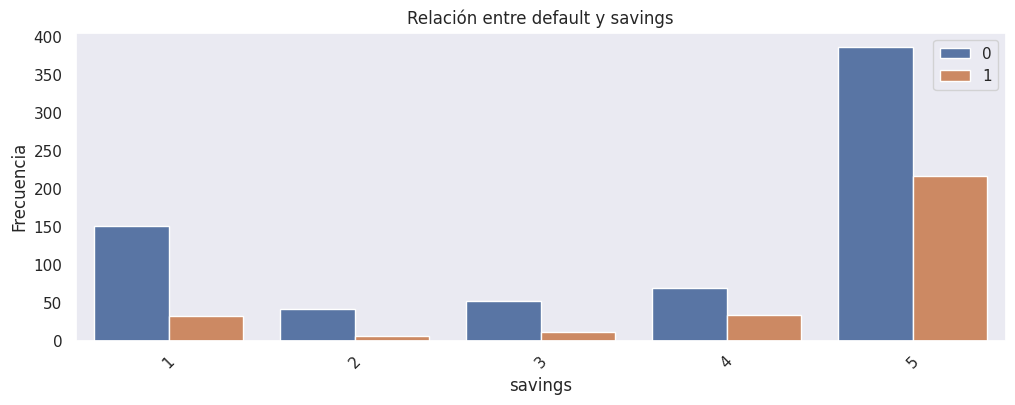

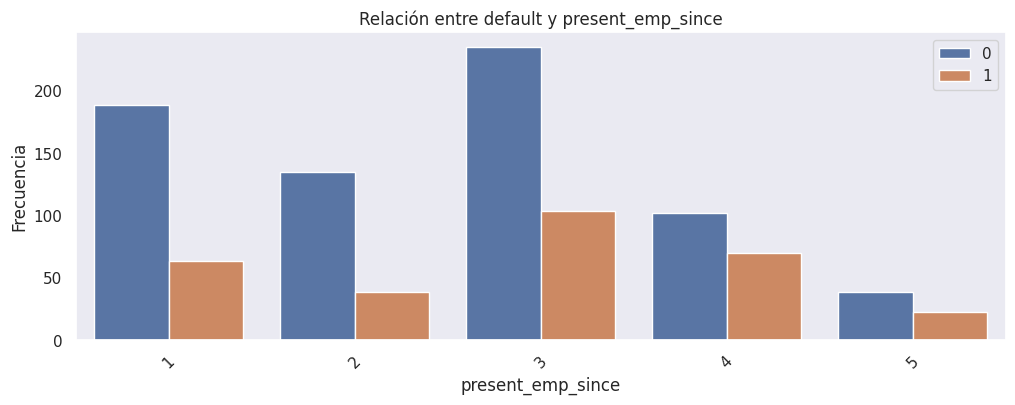

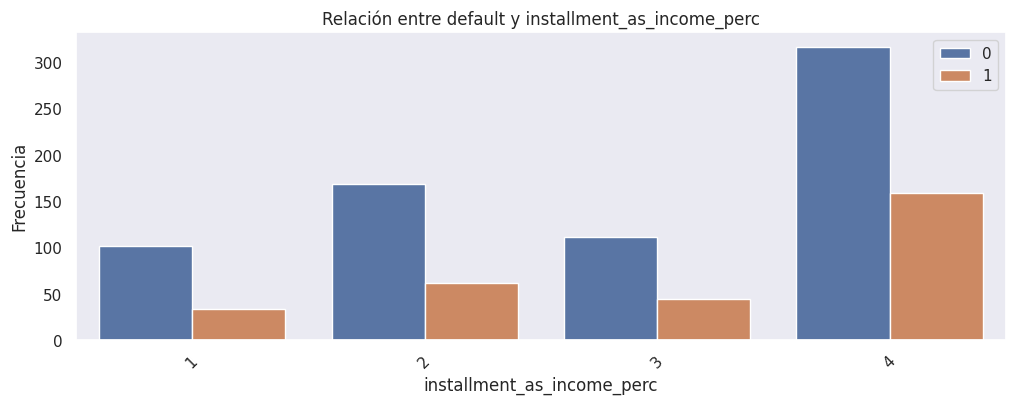

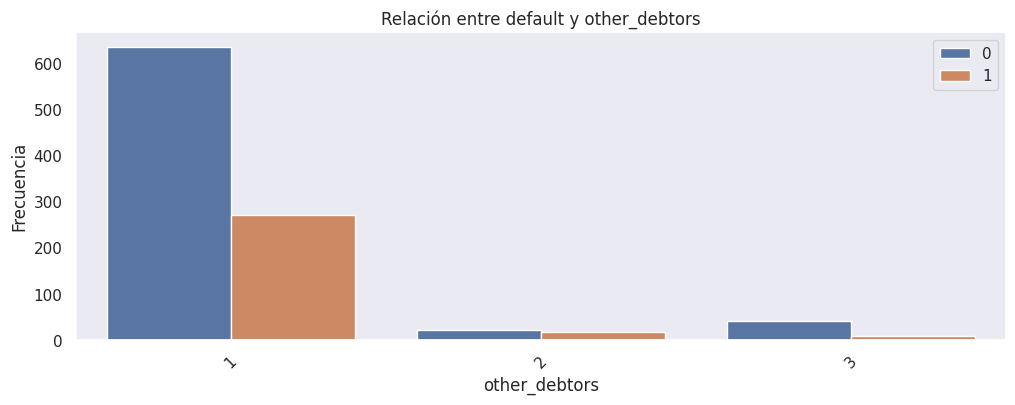

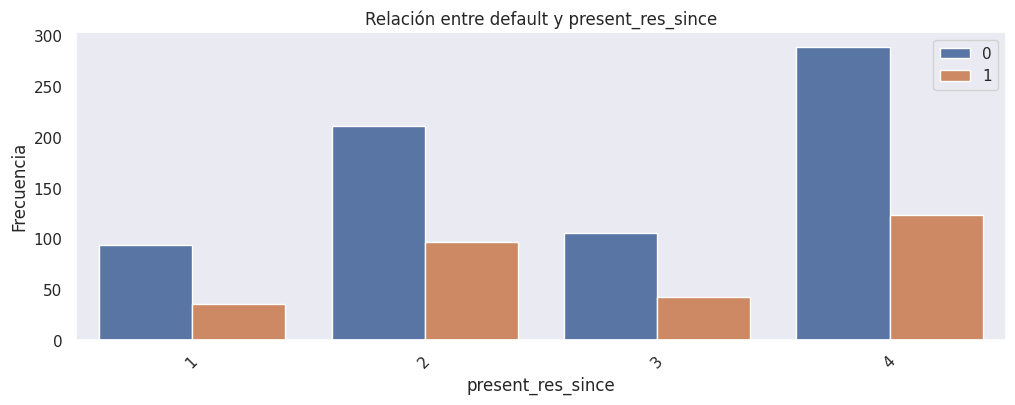

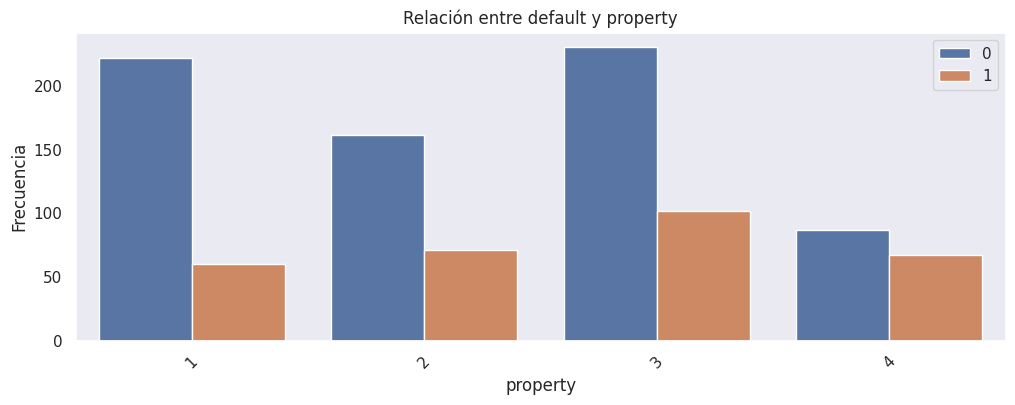

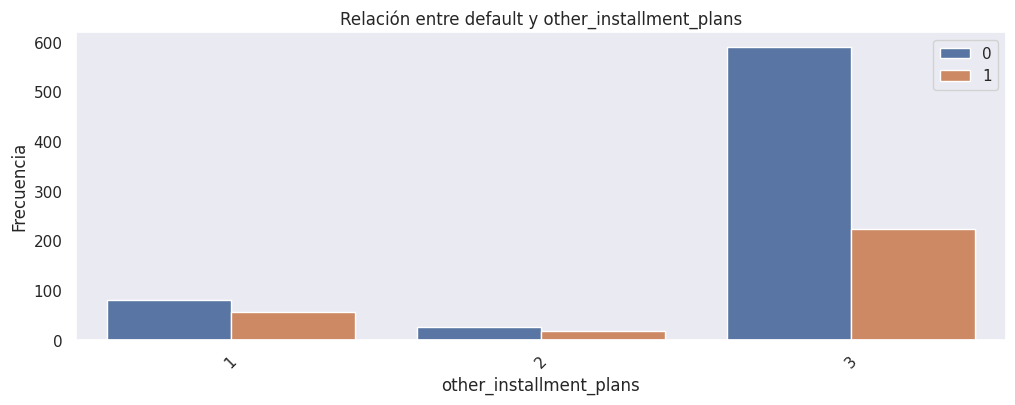

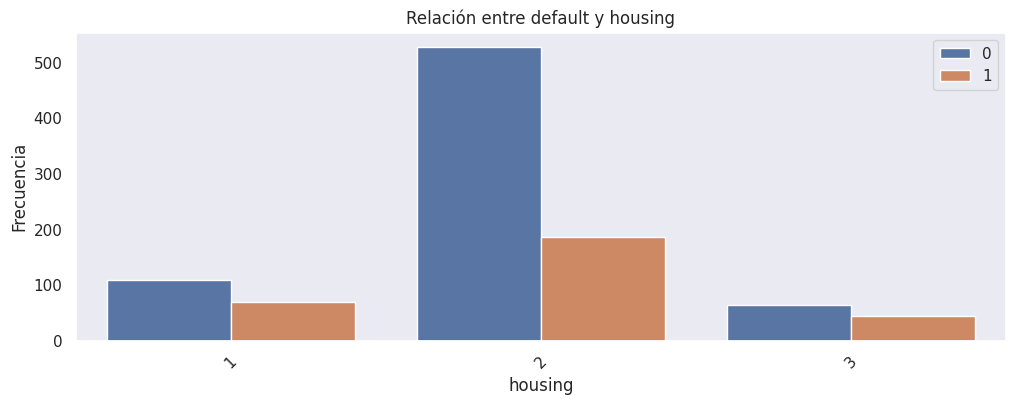

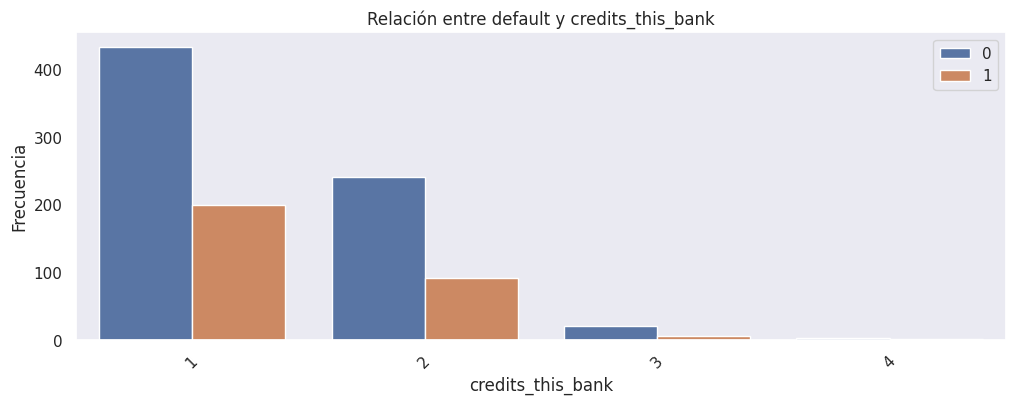

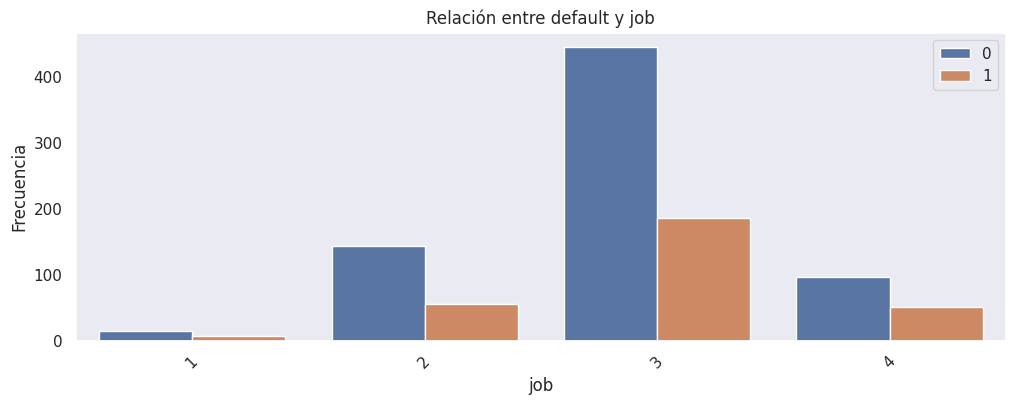

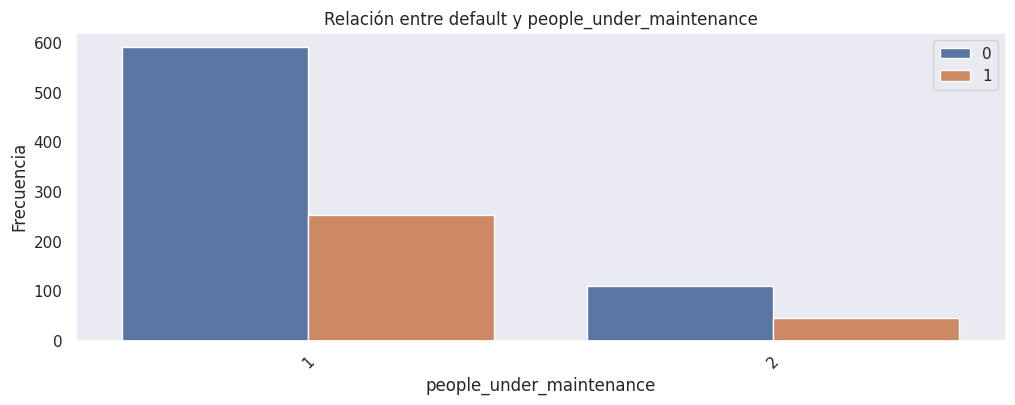

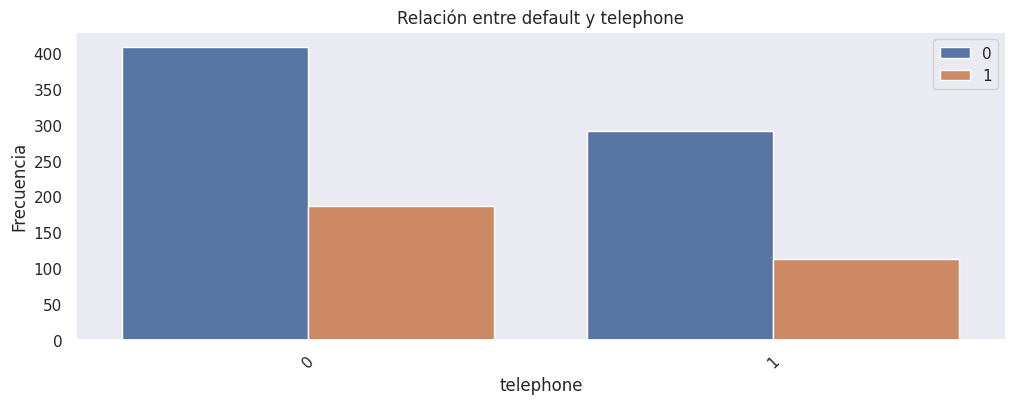

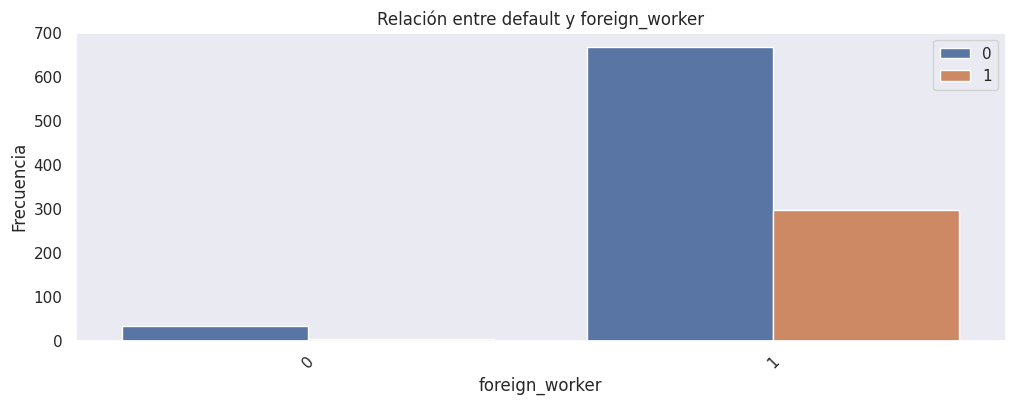

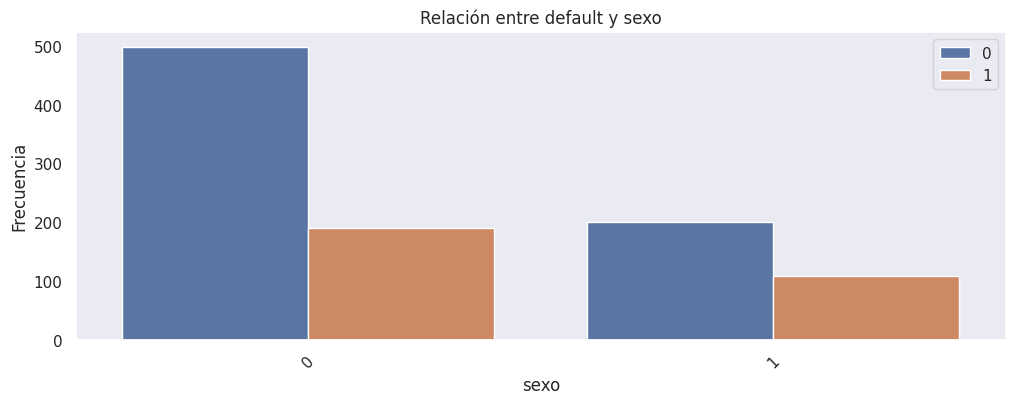

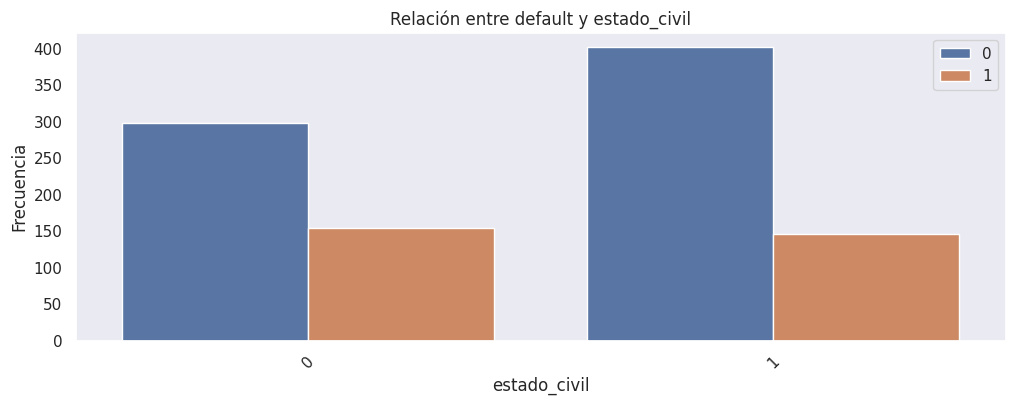

In [139]:
## Relacion de la variable 'default', con las demas variables numéricas. Gráfica de barras
for var in variables:
    plt.figure(figsize=(12, 4))
    sns.countplot(x=var, hue='default', data=df_banco)
    plt.title(f'Relación entre default y {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()

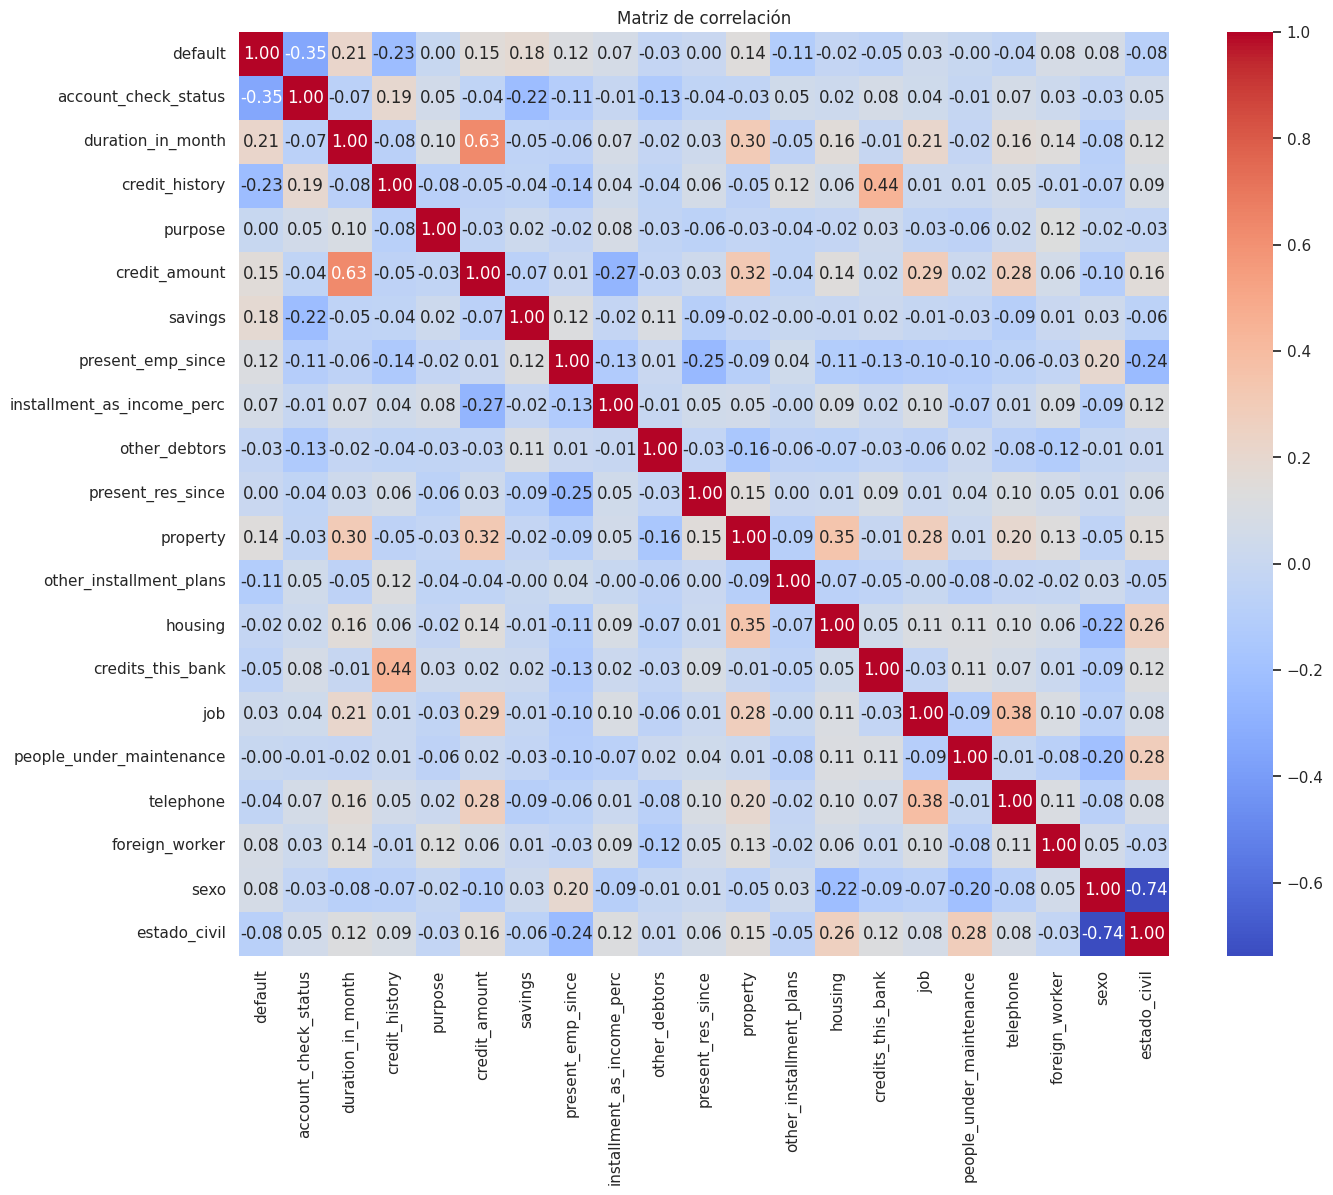

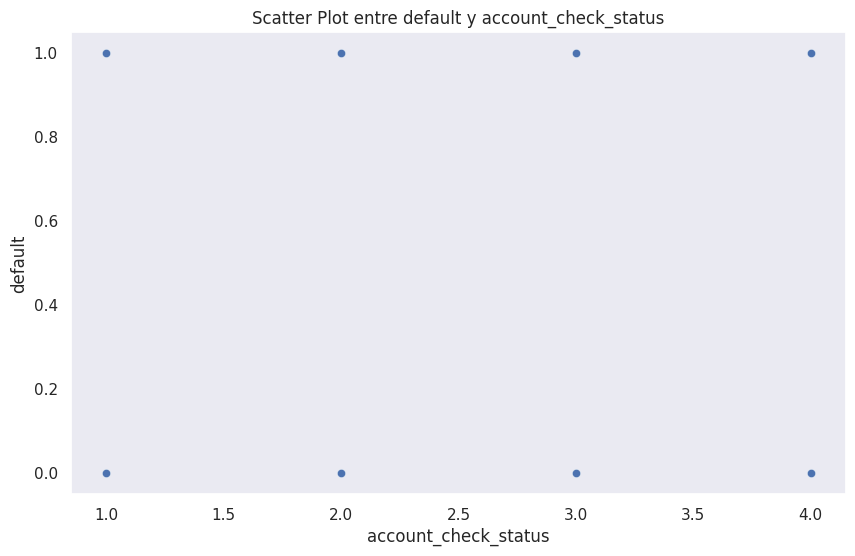

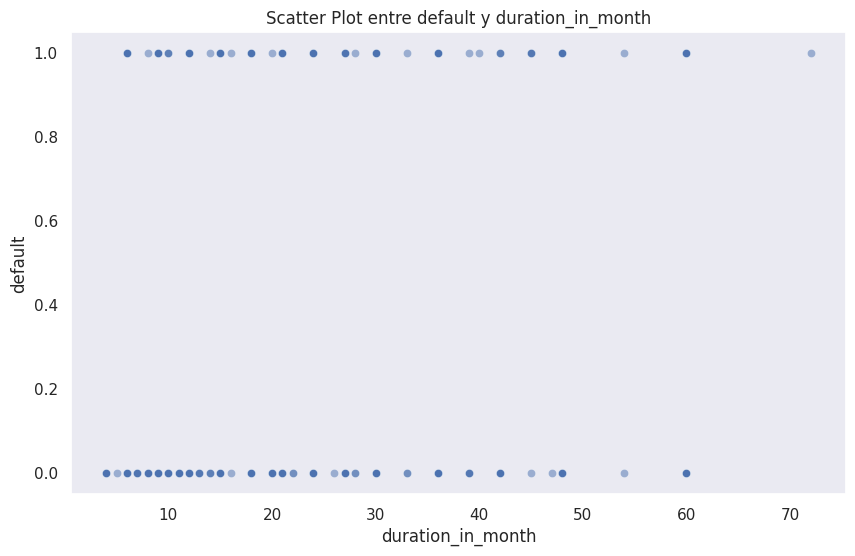

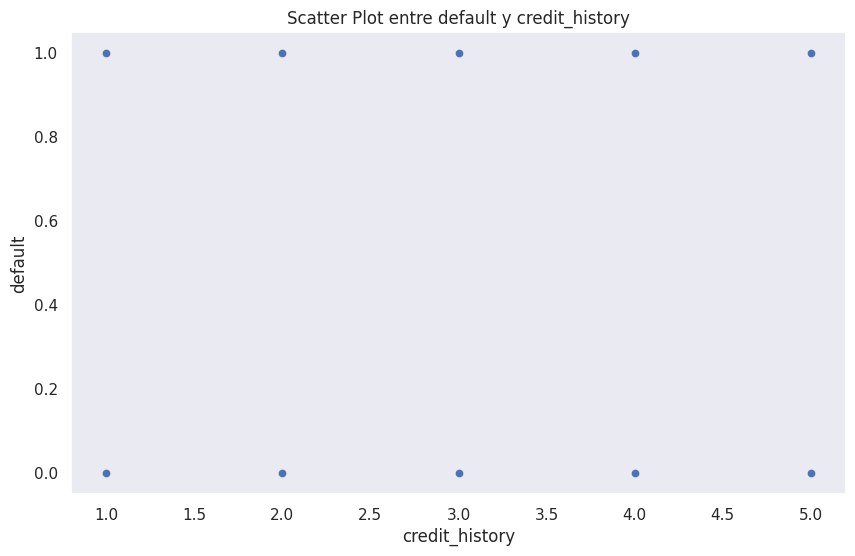

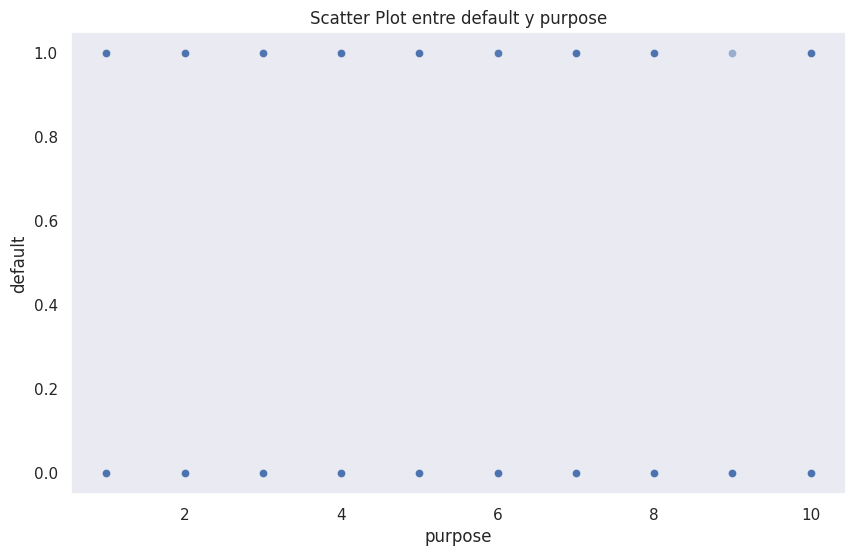

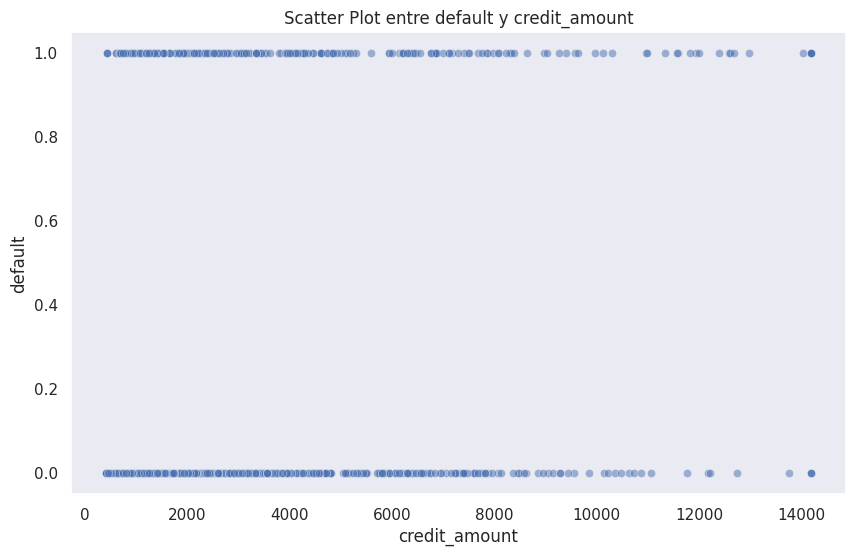

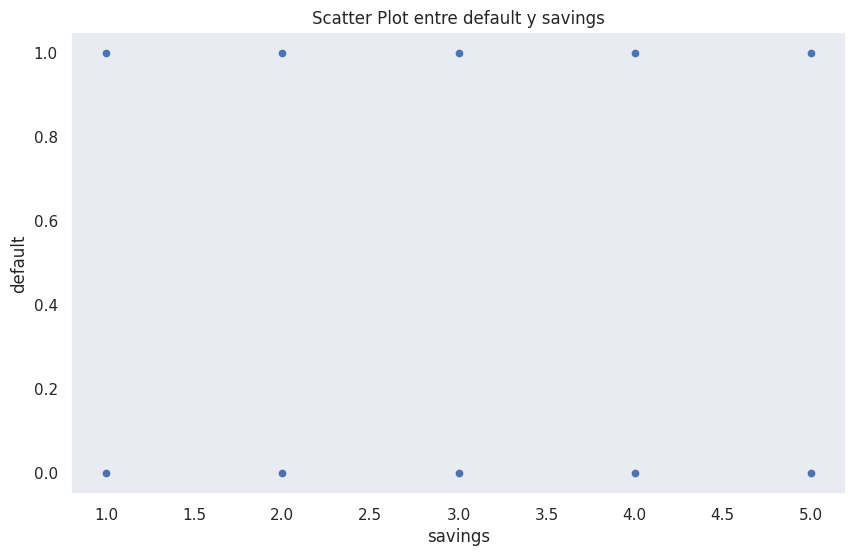

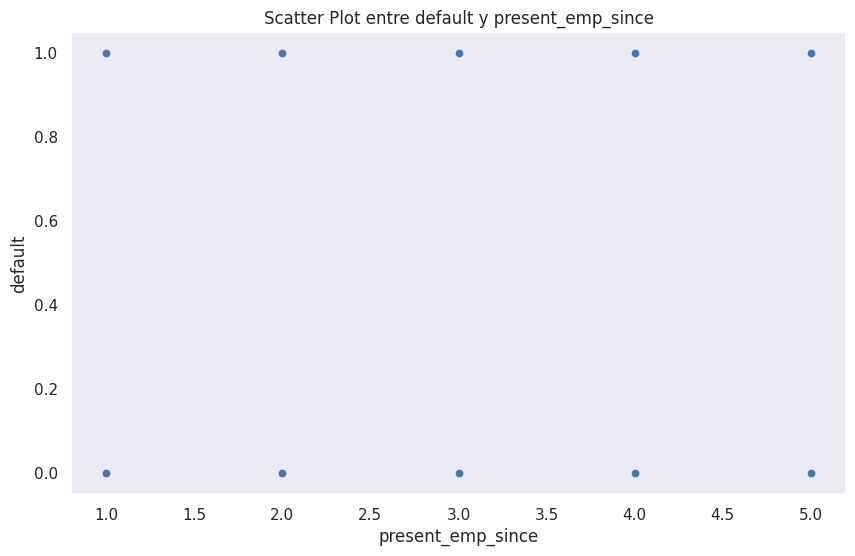

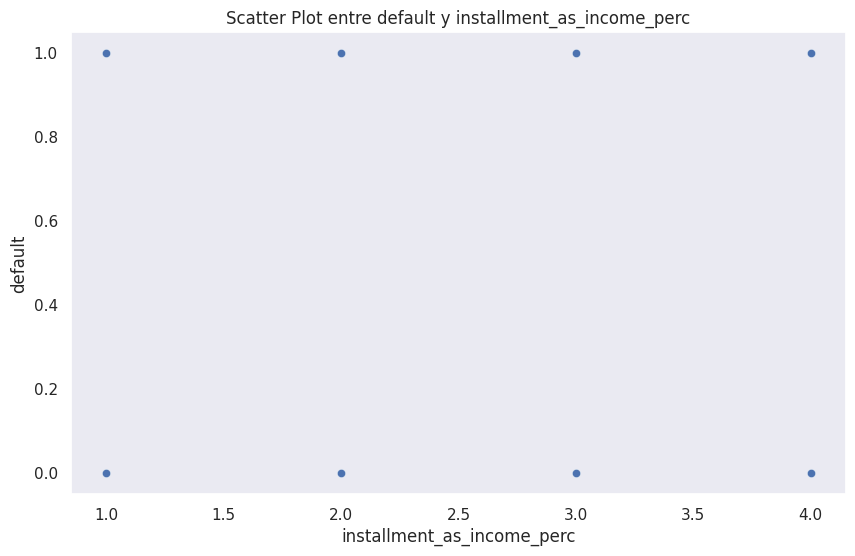

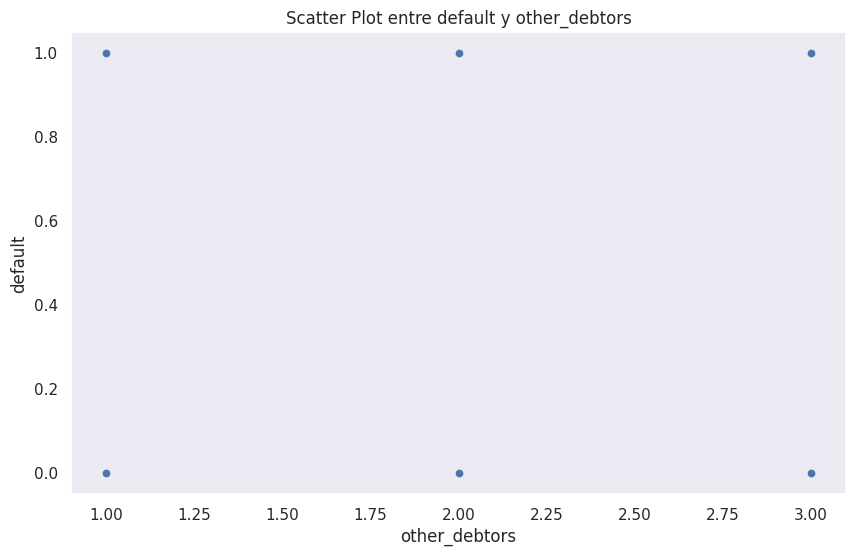

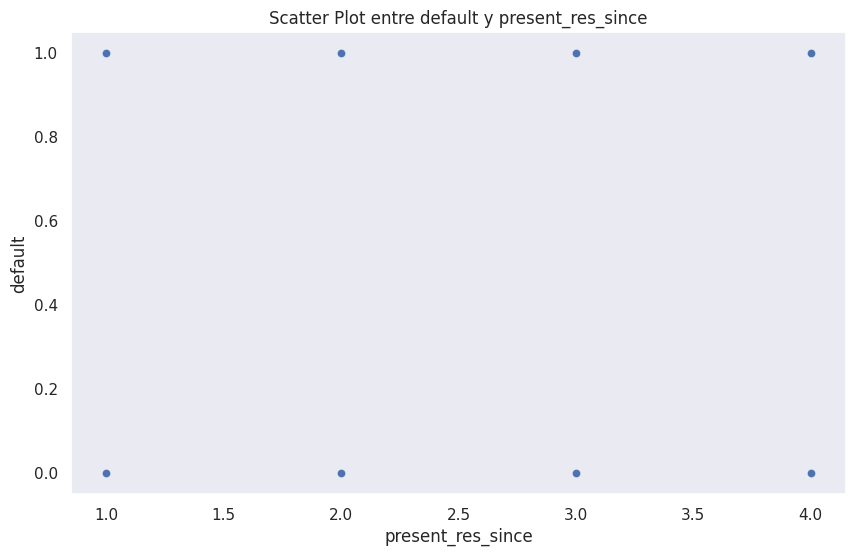

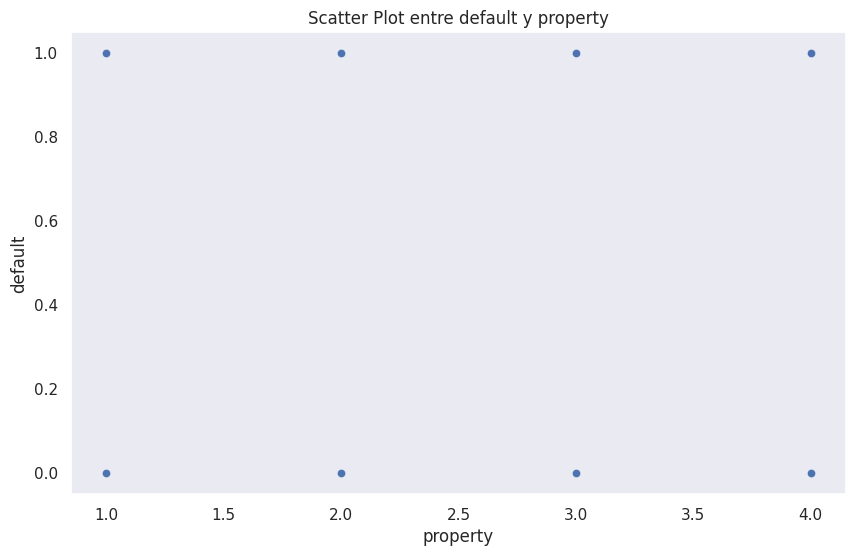

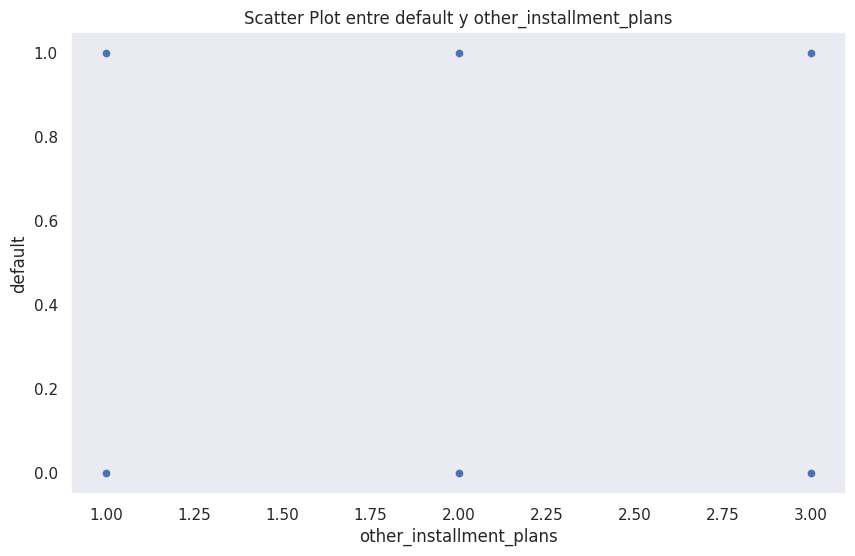

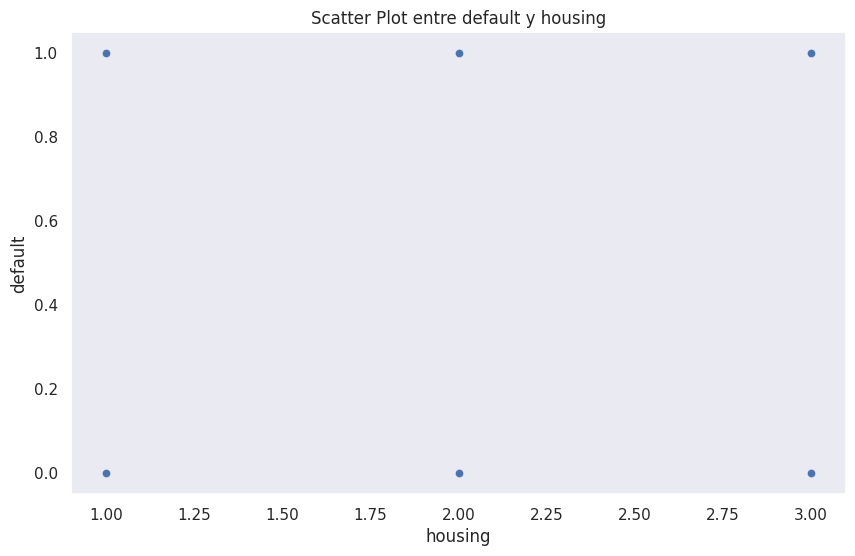

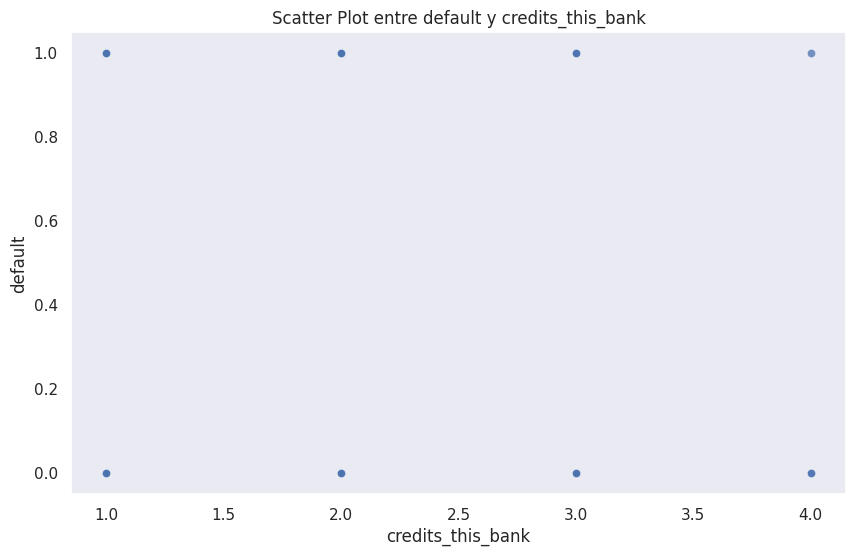

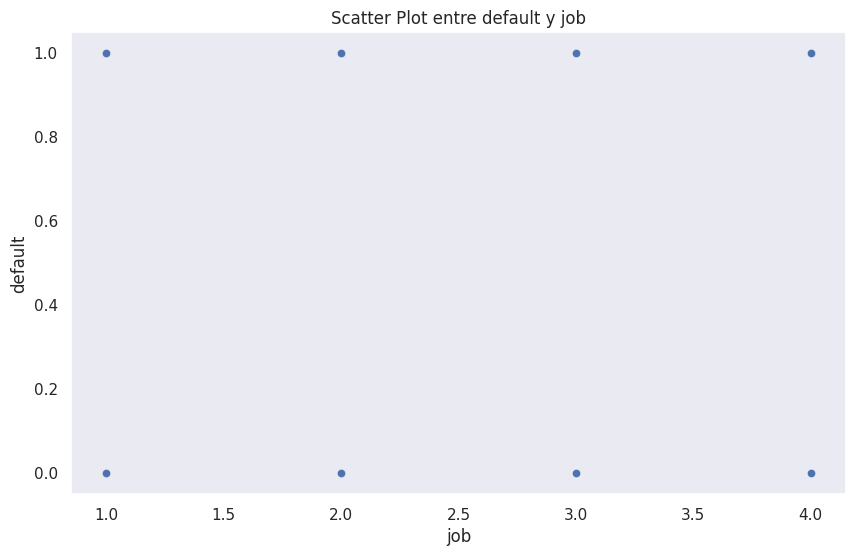

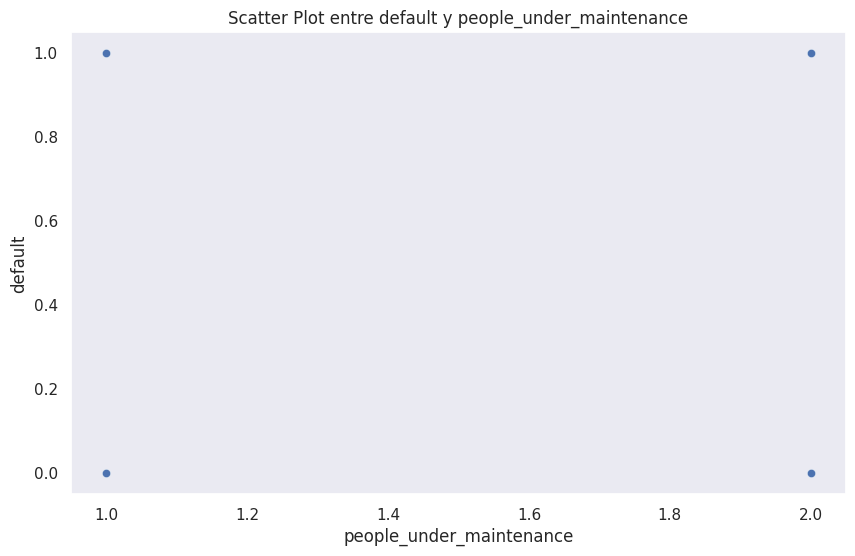

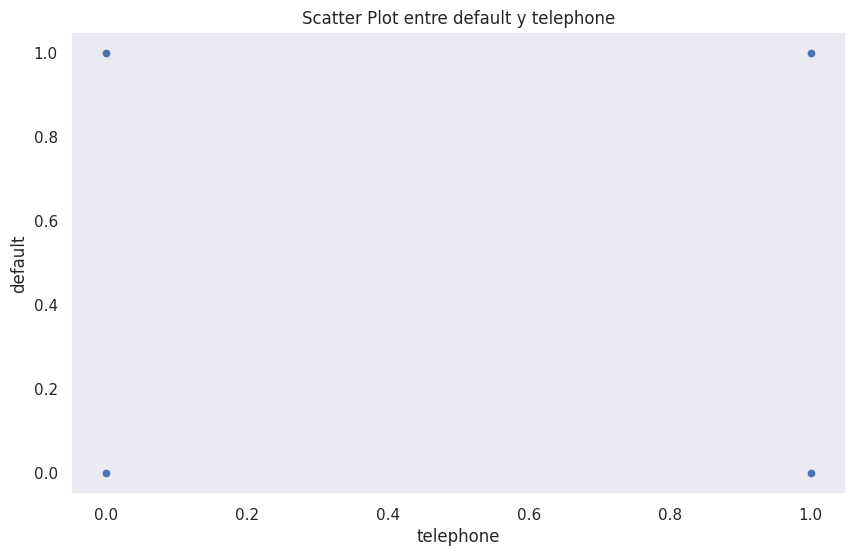

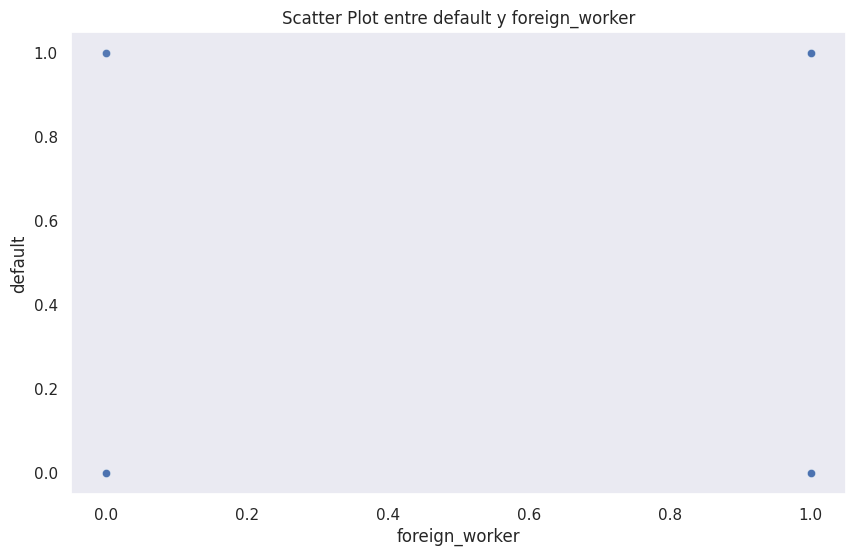

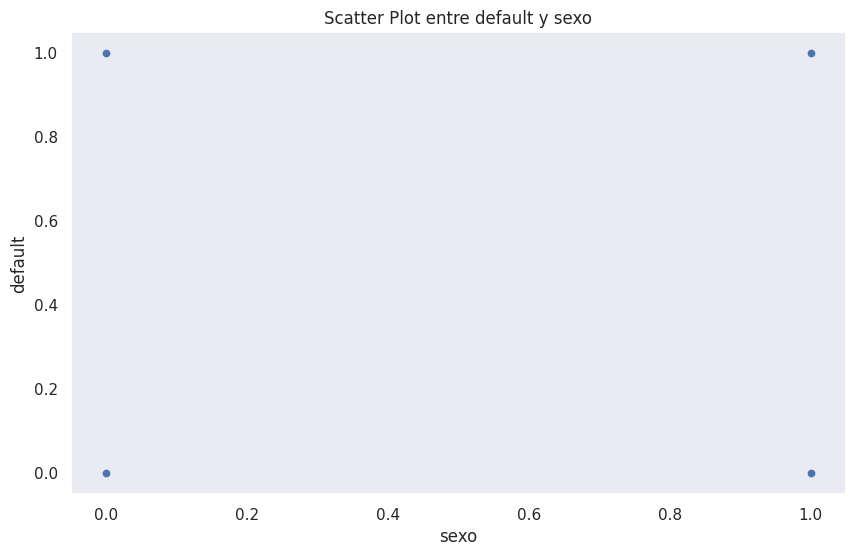

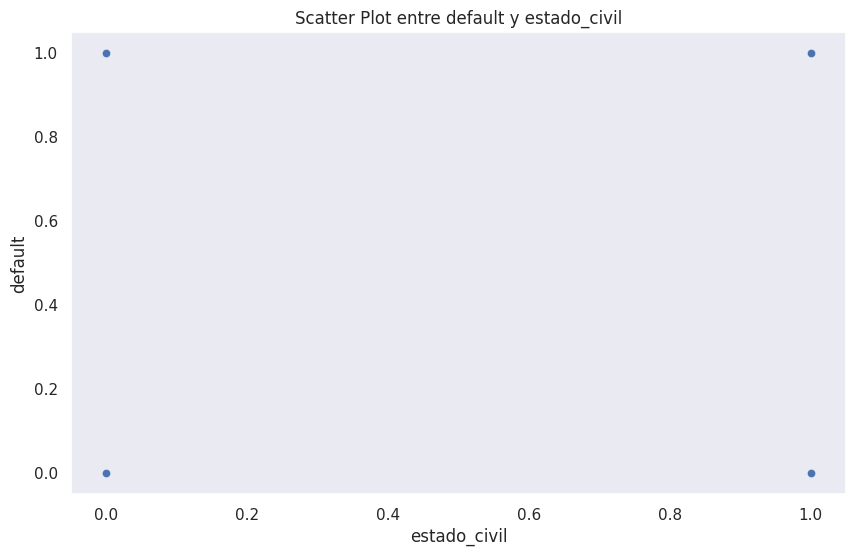

In [143]:
# Visualizar la matriz de correlación
correlation_matrix = df_banco.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Gráficos de dispersión entre la variable objetivo y las variables numéricas
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_banco, x=var, y=target, alpha=0.5)
    plt.title(f'Scatter Plot entre {target} y {var}')
    plt.xlabel(var)
    plt.ylabel(target)
    plt.show()


Como primer análisis de nuestra Matriz de Correlación, podemos deducir que tenemos ciertas variables que se relacionan entre si, esto podría generarnos Multicolinealidad, lo cual puede ser perjudicial para nuestro modelo afectando los coeficientes del mismo.

Haremos un análisis variable a variable:

* **<ins>account_check_status:</ins>**: Tiene una correlación buena negativa con nuestra variable objetivo, mantendremos la variable.


* **<ins>credit_history:</ins>** Tiene buena correlación con variable objetivo, pero tambien tiene correlación con otra variable, se analizará su continuidad.


* **<ins>purpose:</ins>** La correlación con la variable objetivo es nula. Consideramos descartarla ya que como propósito de nuestro análisis deducimos que no es importante para la decisión de si nos aprueban un crédito ya que no interesa en que gastaría el dinero si no si soy capaz de pagarlo.


* **<ins>saving:</ins>** Esta variable es importante al momento de decidir si nos aceptan el crédito debido a que poseemos respaldo para pagarlo. La correlación con la variable objetivo es baja pero mejor que de muchas otras variables. No se correlaciona con otras variables.


* **<ins>present_emp_since:</ins>** Consideramos es importante saber desde cuando se da la presencia de la persona en la empresa, como respaldo y garantia de pago. Correlación baja con variable objetivo pero aceptable. No se correlaciona con otras variables.


* **<ins>installment_as_income_perc:</ins>** Podemos dejarlo, debido a que puede ser importante conocer la tasa de acuerdo al ingreso que posee.


* **<ins>other_debtors:</ins>** Consideramos que es importante ya que puede garantizar de que la persona pueda pagar el crédito si hubiera algún inconveniente. No se correlaciona con otras variables.


* **<ins>present_res_since:</ins>** Tiene una correlación nula con la variable objetivo. Consideramos descartarla debido a que no es importante saber desde cuando se vive en una residencia, tenemos otra variable que nos da una información parecida que es Housing.


* **<ins>property:</ins>** La correlación con variable objetivo es baja, pero se considera debido a que es importante conocer que propiedades en general posee la persona con la finalidad de otorgar crédito. Tiene correlación con otras variables, se analizará luego las demás variables.


* **<ins>other_installment_plans:</ins>** La correlación es baja, pero se mantiene la variable ya que es importante para la decisión de crédito, ya que es necesario saber si se tiene otros planes de pago.


* **<ins>housing:</ins>** Correlación baja con variable objetivo, pero en general consideramos que si es importante como variable para decidir si se otorgará el crédito.


* **<ins>credits_this_bank:</ins>** Correlación baja con variable objetivo, y además se correlaciona con otras variables. Se considera el descarte debido a que ya tenemos otra variable que nos aporta mejor valor 'credit_history', y está más relacionada con target.


* **<ins>job:</ins>** Correlación baja con variable objetivo, pero importante para análisis de decisión de otorgar crédito, por más que tenga correlación con otras variables.


* **<ins>people_under_maintenance:</ins>** Correlación baja con variable objetivo, pero importante para análisis de decisión de otorgar crédito, por más que tenga correlación con otras variables.


* **<ins>telephone:</ins>** Correlación baja con variable objetivo. Consideramos no importante para análisis de decisión de otorgar crédito.


* **<ins>foreign_worker:</ins>** Correlación baja con variable objetivo, pero importante para análisis de decisión de otorgar crédito, por más que tenga correlación con otras variables.


* **<ins>rango_plazos_credito:</ins>** Es una variable que tiene buena correlación con la variable objetivo. Es cierto tambien que tiene una alta correlación con otra variable **'rango_valor_credito'**, pero esta variable es importante al momento de tomar decisiones para nuestro análisis. Procedemos a dejarlo por más que tenga mucha correlación.


* **<ins>rango_valor_credito:</ins>** Es una variable que tiene buena correlación con la variable objetivo. Es cierto tambien que tiene una alta correlación con otra variable **'rango_plazos_credito'**, pero esta variable es importante al momento de tomar decisiones para nuestro análisis. Procedemos a dejarlo por más que tenga mucha correlación.


* **<ins>rango_edad:</ins>** Correlación baja con variable objetivo, pero importante para análisis de decisión de otorgar crédito, por más que tenga correlación con otras variables.


* **<ins>sexo:</ins>** Correlación baja con la variable objetivo. Es el que está más correlacionado con otra variable **'estado_civil'**. Consideramos el descarte de esta variable ya que consideramos que no interesa el sexo si no la capacidad de dinero de la persona. Por otro lado el estado civil lo consideramos importante ya que una persona casada podría tener más gastos y eso podría generar que no tenga poder adquisitivo suficiente para poder pagar el crédito.


* **<ins>estado_civil:</ins>** Correlación baja con la variable objetivo. Es el que está más correlacionado con otra variable **'sexo'**. Consideramos mantener esta variable y descartar la otra. Todo esto debido a que el estado civil lo consideramos importante ya que una persona casada podría tener más gastos y eso podría generar que no tenga poder adquisitivo suficiente para poder pagar el crédito.

In [144]:
# Biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

def balanceo_de_datos():
    global df_banco, resultados

    # Dividiendo los datos en características y target
    X = df_banco.drop('default', axis=1)
    y = df_banco['default']

    smt = SMOTE(random_state=123)
    X_resampled, y_resampled = smt.fit_resample(X, y)

    # Unión de los datos balanceados
    df_banco = pd.concat([X_resampled, y_resampled], axis=1)


In [145]:
balanceo_de_datos()

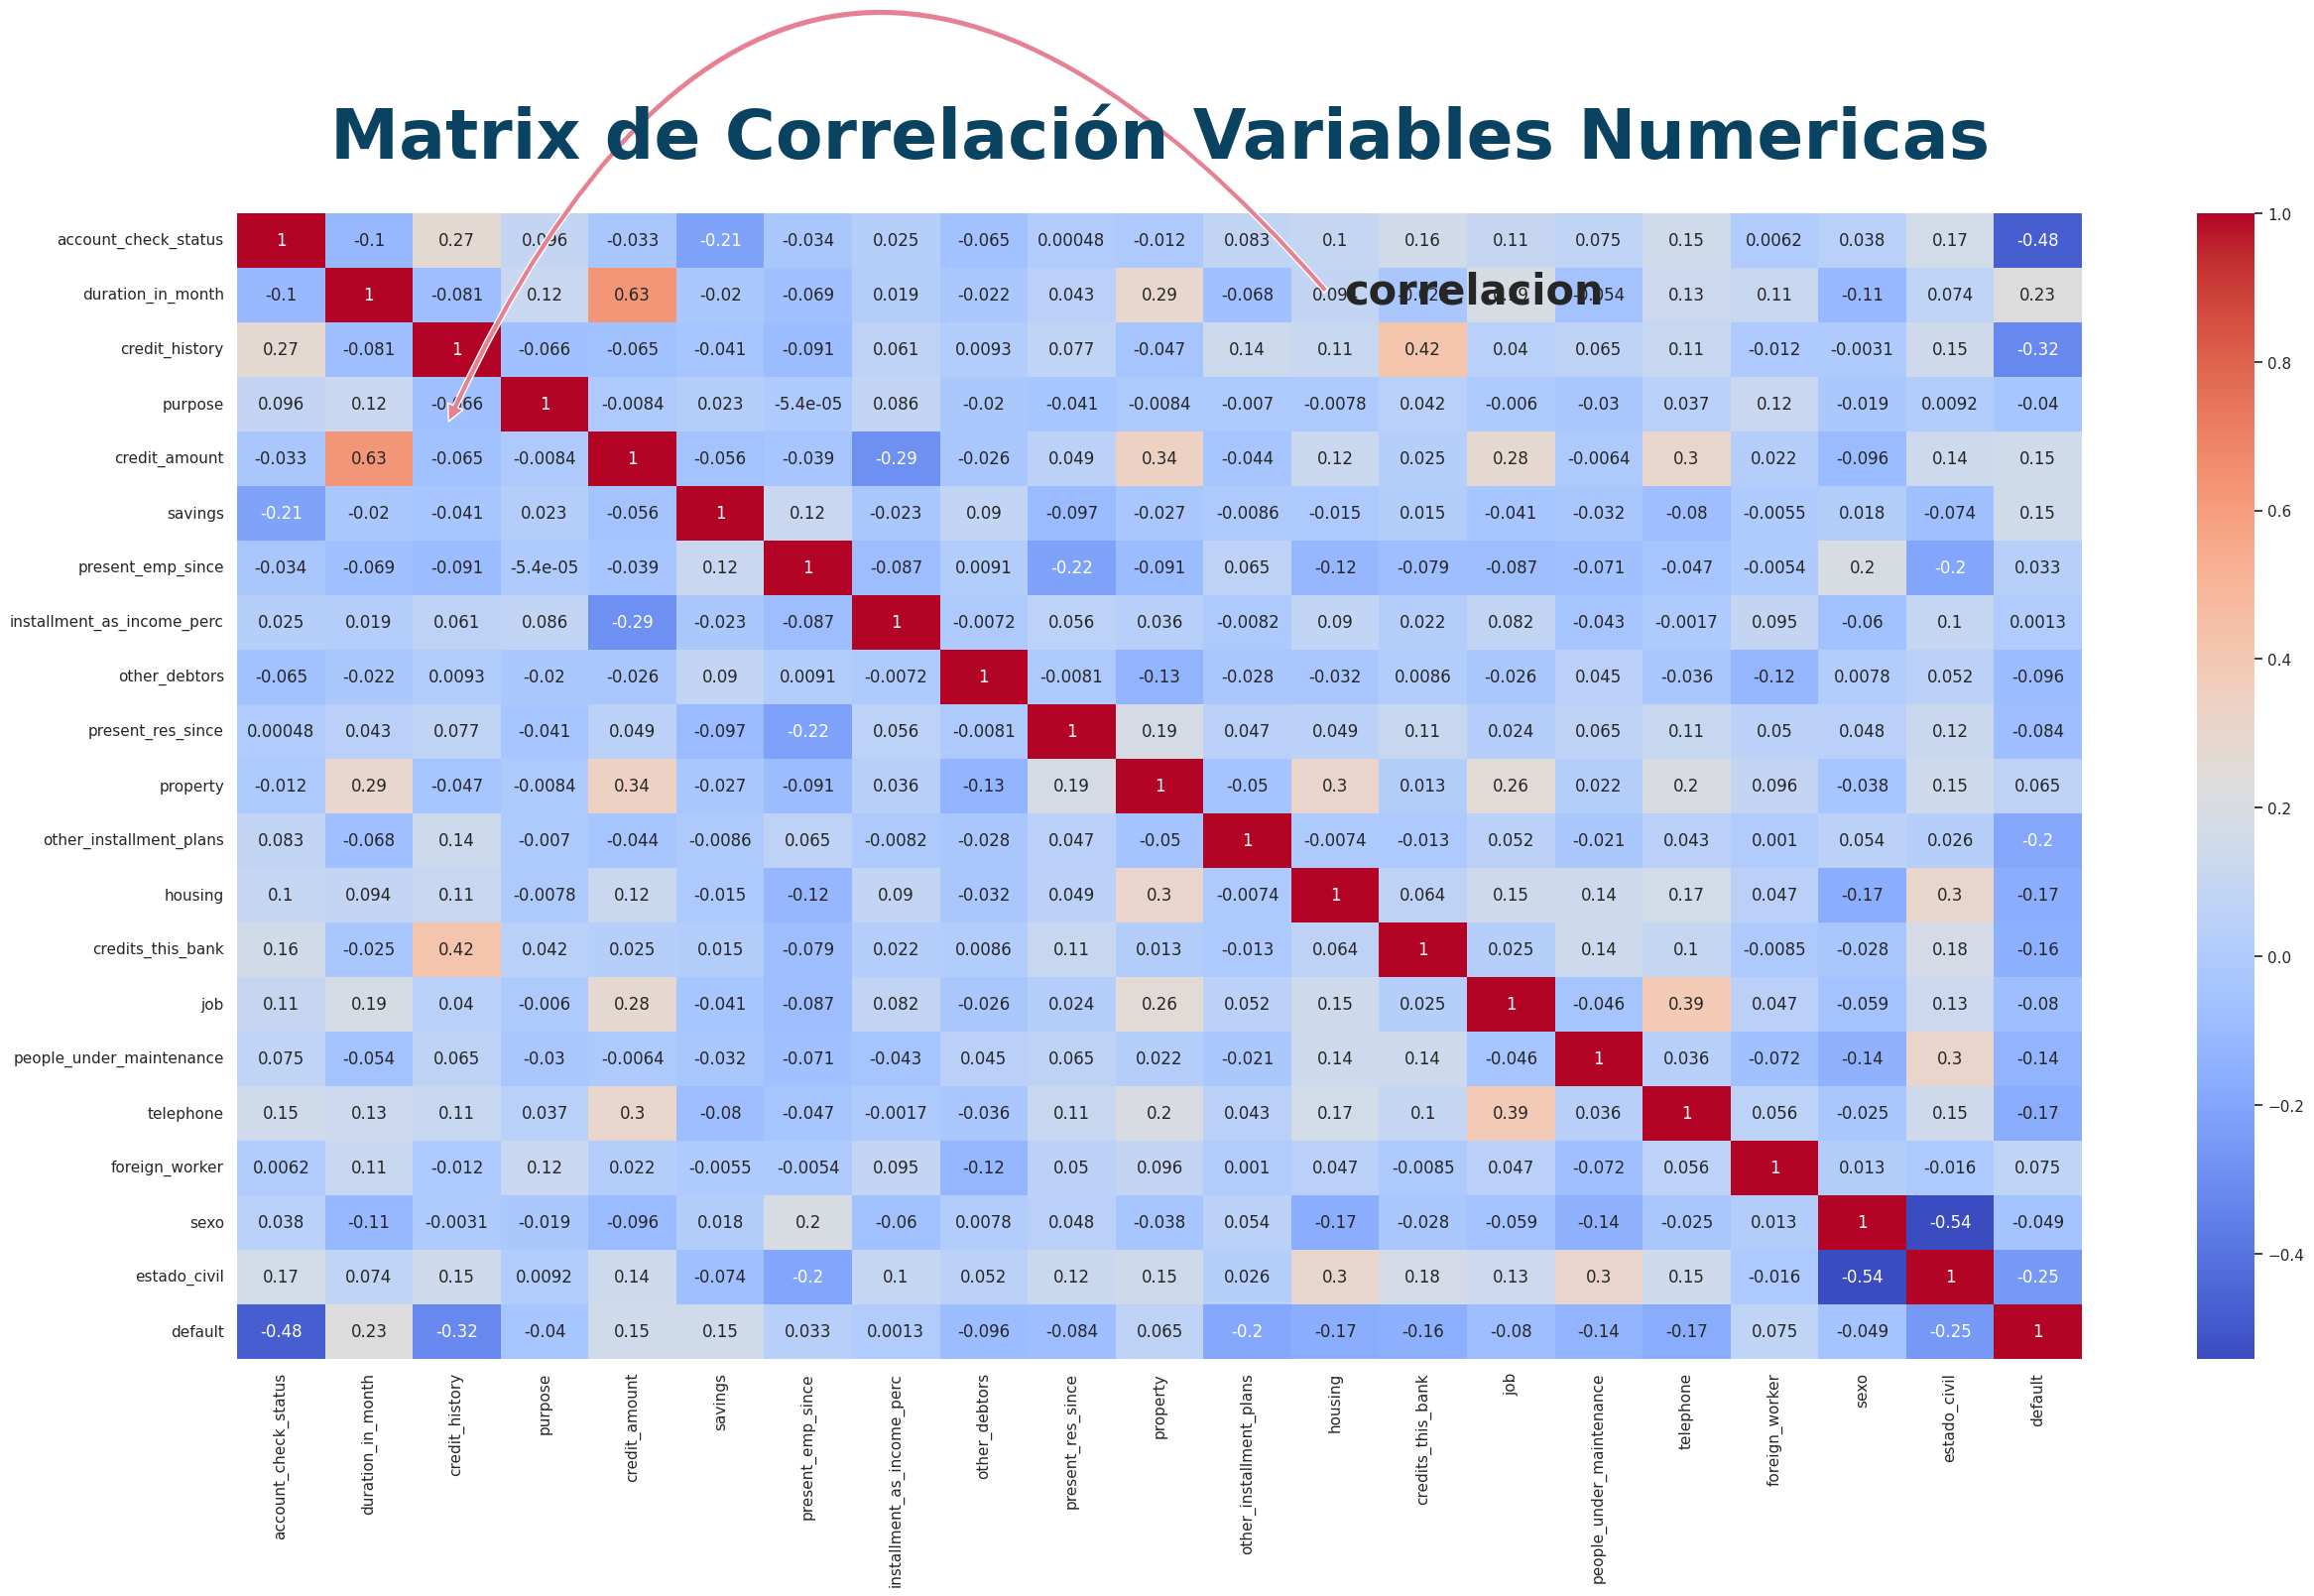

In [146]:
#Correlación Entre Variables Numéricas
corr=df_banco.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df_banco.corr(), rotation = 0)
ax.set_xticklabels(df_banco.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()

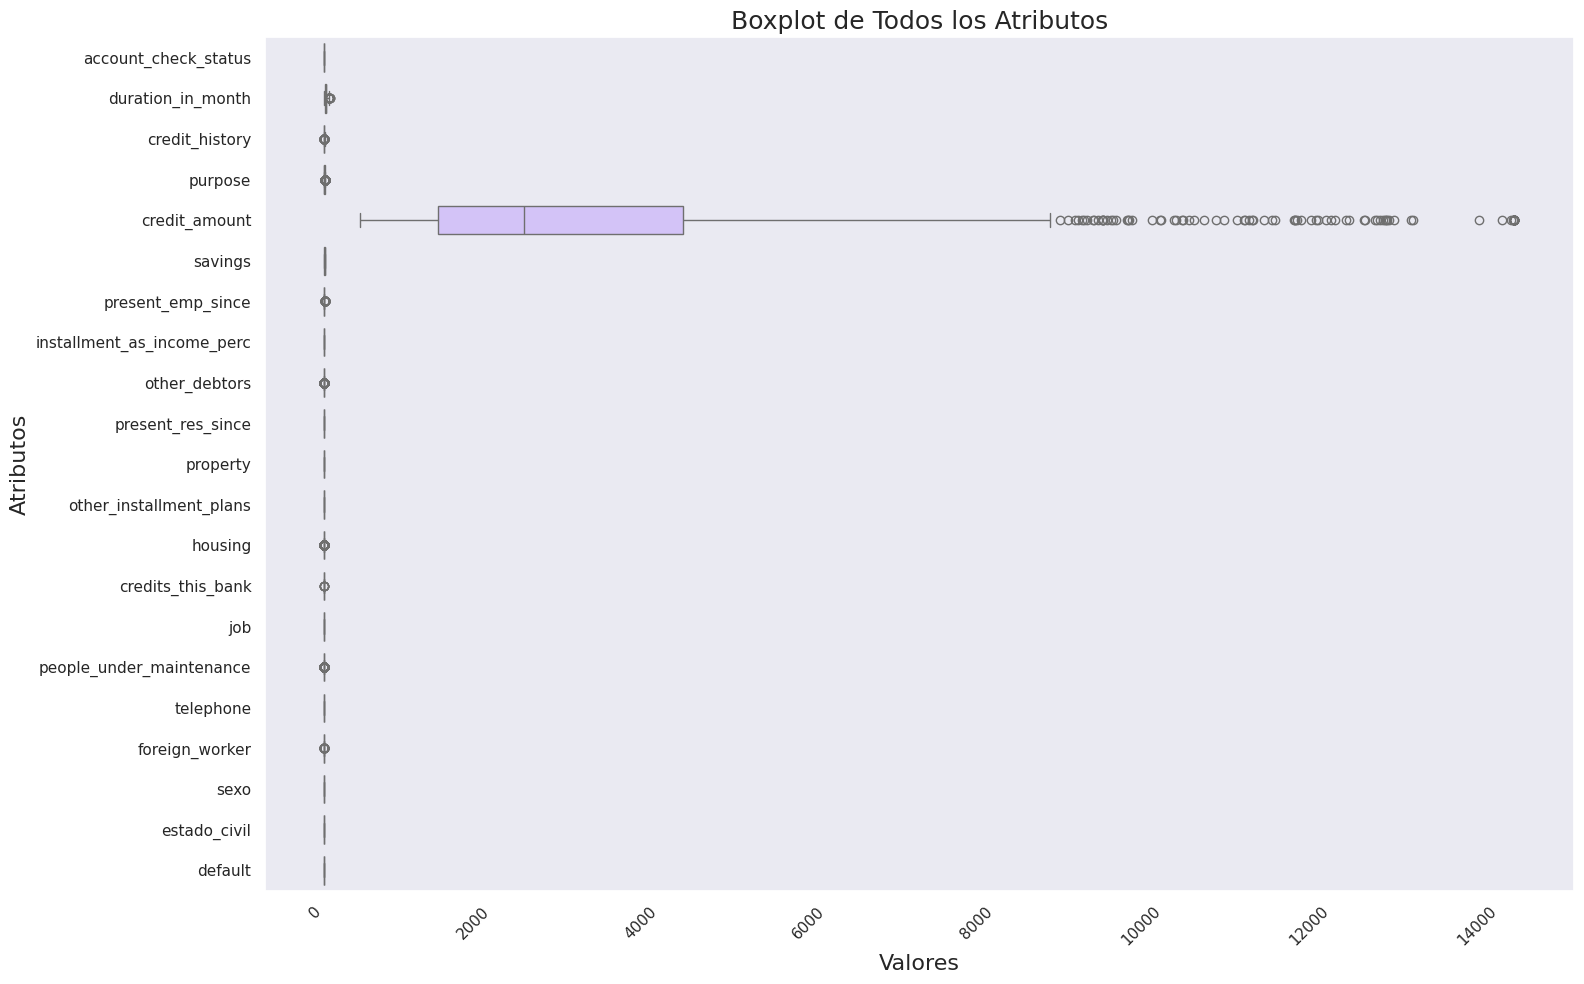

In [147]:
# Configuración de estilo y tamaño
sns.set(style="dark")
plt.figure(figsize=(16, 10))

# Crear un boxplot con Seaborn
sns.boxplot(data=df_banco, orient="h", palette="pastel", width=0.7)

# Personalizar el diseño del gráfico
plt.title('Boxplot de Todos los Atributos', fontsize=18)
plt.xlabel('Valores', fontsize=16)
plt.ylabel('Atributos', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Mostrar el gráfico
plt.show()

In [148]:
print(df_banco.groupby(['estado_civil', 'sexo']).size())

estado_civil  sexo
0             0       401
              1       372
1             0       627
dtype: int64


In [149]:
##Eliminamos la columna sexo del dataFrame
df_banco.drop(['sexo'], axis=1, inplace=True)

In [150]:
df_banco.drop(['telephone'], axis=1, inplace=True)


In [151]:
df_banco.drop(['purpose'], axis=1, inplace=True)

In [152]:
df_banco.columns

Index(['account_check_status', 'duration_in_month', 'credit_history',
       'credit_amount', 'savings', 'present_emp_since',
       'installment_as_income_perc', 'other_debtors', 'present_res_since',
       'property', 'other_installment_plans', 'housing', 'credits_this_bank',
       'job', 'people_under_maintenance', 'foreign_worker', 'estado_civil',
       'default'],
      dtype='object')

In [154]:
def analisis_exploratorio2():
    global df_banco,resultados

    # Generar gráficos de histograma con porcentajes
    atributos_histograma = columnas=['account_check_status','credit_history','savings','present_emp_since','installment_as_income_perc','other_debtors',
            'present_res_since','property','other_installment_plans','housing','credits_this_bank','job','people_under_maintenance',
            'foreign_worker','estado_civil','rango_edad','rango_plazos_credito','rango_valor_credito']
    generar_histogramas_plotly(atributos_histograma)

def generar_histogramas_plotly(atributos):
    for atributo in atributos:
        fig = px.histogram(df_banco, x=atributo, color='default', labels={'default': 'Estado de Crédito'})
        fig.update_layout(
            title=f'Histograma de {atributo} con Porcentajes',
            xaxis_title=atributo,
            yaxis_title='Frecuencia',
            barmode='group',
            showlegend=True
        )
        fig.update_traces(opacity=0.7)
        fig.show()

fig.show()

# Llamada a la función de análisis exploratorio
analisis_exploratorio2()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['account_check_status', 'duration_in_month', 'credit_history', 'credit_amount', 'savings', 'present_emp_since', 'installment_as_income_perc', 'other_debtors', 'present_res_since', 'property', 'other_installment_plans', 'housing', 'credits_this_bank', 'job', 'people_under_maintenance', 'foreign_worker', 'estado_civil', 'default'] but received: rango_edad

In [155]:
df_banco["default"].value_counts()

default
0    700
1    700
Name: count, dtype: int64

In [156]:
# Obtener la cuenta de valores únicos en la columna 'default'
value_counts = df_banco["default"].value_counts()

# Crear un gráfico de barras con Plotly Express
fig = px.bar(x=value_counts.index, y=value_counts.values, text=value_counts.values,
             labels={'x': 'default', 'y': 'Count'}, title='Cuenta de valores en la columna "default"')

# Mostrar el gráfico
fig.show()


In [157]:
corr = df_banco.corr()
corr[['default']].sort_values(by='default',ascending=False).style.background_gradient()

In [158]:
## Cuadro de correlación mostrando de forma colorida los valores entre variables
corr = df_banco.corr()
corr.style.background_gradient()

1. El 69% de los solicitantes de crédito son varones frente a un 31% de mujeres
2. El 54% de los solicitantes están solteros y el 45% en pareja
3. El 41% de los solicitantes quieren un plan de pago de 12 a 23 meses. Un 35% quieren un plan de pago menor de un año.
4. El 41% de los solicitantes se encuentra en el rango etario de 18 a 29 años. 5. Le sigue un 31% de personas entre 30 y 39 años. Un 16% de personas entre 40 y 49 años. Y un 11% de personas mayores de 50 años.
6. El 70% de los solicitantes son good customers frente a un 30% de bad customers.
7. El 28% de los creditos son solicitados para la compra de electrodomesticos, un 23% para adquirir un auto nuevo, un 18% para la compra de una radio/television y un 10% para la compra de un auto usado.
8. El mapa de calor muestra una correlación negativa entre el estado civil y el sexo

#4. Construcción de Modelos

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [163]:

global df_banco, resultados
y = df_banco['default']
x = df_banco.drop(columns=['default'])
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)
#creamos listas vacías por cada metrica que vamos a utilizar
nombre_modelo = ['Regreción Logistica','Árbol de Desición','Random Forest','Naive Bayes']
accuracy = []
precision = []
recall = []
f1_Score = []
auc_roc=[]

#Regreción Logistica
model_lg = LogisticRegression()
model_lg.fit(train_x, train_y)
predictions = model_lg.predict(test_x)
#Metricas de evalución
accuracy_lr = accuracy_score(test_y, predictions)
precision_lr = precision_score(test_y, predictions)
recall_lr = recall_score(test_y, predictions)
f1_score_lr = f1_score(test_y, predictions)
auc_roc_lr = roc_auc_score(test_y, predictions)
  #Agregamos el valor de cada metrica a nuestra lista
accuracy.append(accuracy_lr)
precision.append(precision_lr)
recall.append(recall_lr)
f1_Score.append(f1_score_lr)
auc_roc.append(auc_roc_lr)

#Arbol de desición
model_AD = DecisionTreeClassifier()
model_AD.fit(train_x, train_y)
predictions = model_AD.predict(test_x)
  #Metricas de evalución
accuracy_arbol_desicion = accuracy_score(test_y, predictions)
precision_arbol_desicion = precision_score(test_y, predictions)
recall_arbol_desicion = recall_score(test_y, predictions)
f1_score_arbol_desicion = f1_score(test_y, predictions)
auc_roc_arbol_desicion = roc_auc_score(test_y, predictions)
#Agregamos el valor de cada metrica a nuestra lista
accuracy.append(accuracy_arbol_desicion)
precision.append(precision_arbol_desicion)
recall.append(recall_arbol_desicion)
f1_Score.append(f1_score_arbol_desicion)
auc_roc.append(auc_roc_arbol_desicion)

  #Arboles de Desicion- Random Forest
model_RF = RandomForestClassifier()
model_RF.fit(train_x, train_y)
predictions = model_RF.predict(test_x)
  #Metricas de evalución
accuracy_random_forest = accuracy_score(test_y, predictions)
precision_random_forest = precision_score(test_y, predictions)
recall_random_forest = recall_score(test_y, predictions)
f1_score_random_forest = f1_score(test_y, predictions)
auc_roc_random_forest = roc_auc_score(test_y, predictions)
  #Agregamos el valor de cada metrica a nuestra lista
accuracy.append(accuracy_random_forest)
precision.append(precision_random_forest)
recall.append(recall_random_forest)
f1_Score.append(f1_score_random_forest)
auc_roc.append(auc_roc_random_forest)

    #Naive Bayes
model_NB = GaussianNB()
model_NB.fit(train_x, train_y)
predictions = model_NB.predict(test_x)
  #Metricas de evalución
accuracy_naive_bayes = accuracy_score(test_y, predictions)
precision_naive_bayes = precision_score(test_y, predictions)
recall_naive_bayes = recall_score(test_y, predictions)
f1_score_naive_bayes = f1_score(test_y, predictions)
auc_roc_naive_bayes = roc_auc_score(test_y, predictions)
  #Agregamos el valor de cada metrica a nuestra lista
accuracy.append(accuracy_naive_bayes)
precision.append(precision_naive_bayes)
recall.append(recall_naive_bayes)
f1_Score.append(f1_score_naive_bayes)
auc_roc.append(auc_roc_naive_bayes)
  #Lo guardamos en un diccionario
resultados = {
    'Nombre_Modelo': nombre_modelo,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1_Score': f1_Score,
    'AUC_ROC': auc_roc
}


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def crea_modelos(df_banco):
    # Separación de datos en características (x) y variable objetivo (y)
    y = df_banco['default']
    x = df_banco.drop(columns=['default'])

    # División de datos en conjuntos de entrenamiento y prueba
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)

    # Definición de modelos
    modelos = [
        ('Regresión Logística', LogisticRegression()),
        ('Árbol de Decisión', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Naive Bayes', GaussianNB())
    ]

    resultados = []

    # Iteración sobre cada modelo
    for nombre, modelo in modelos:
        try:
            # Entrenamiento del modelo
            model = modelo.fit(train_x, train_y)
            # Predicciones en el conjunto de prueba
            predictions = model.predict(test_x)
            # Métricas de evaluación
            accuracy = accuracy_score(test_y, predictions)
            precision = precision_score(test_y, predictions)
            recall = recall_score(test_y, predictions)
            f1 = f1_score(test_y, predictions)
            auc_roc = roc_auc_score(test_y, predictions)

            # Almacenamiento de resultados en un diccionario
            resultados.append({
                'Nombre Modelo': nombre,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'AUC-ROC': auc_roc
            })
        except Exception as e:
            # Manejo de errores durante el entrenamiento y evaluación del modelo
            print(f'Error en el modelo {nombre}: {str(e)}')

    # Creación de un DataFrame con los resultados
    return pd.DataFrame(resultados)

# Llamada a la función y almacenamiento de los resultados
resultados = crea_modelos(df_banco)
print(resultados)


         Nombre Modelo  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Regresión Logística  0.778571   0.753623  0.787879  0.770370  0.779075
1    Árbol de Decisión  0.745238   0.709677  0.777778  0.742169  0.746997
2        Random Forest  0.809524   0.780952  0.828283  0.803922  0.810538
3          Naive Bayes  0.759524   0.711790  0.823232  0.763466  0.762968


#**5. Evaluación y Selección del Modelo**


---

In [170]:
def visualiza_resultados():
    global df_banco, resultados
    results_df = pd.DataFrame(resultados)
    results_df.set_index('Nombre_Modelo', inplace=True)

    # Gráfico
    results_df = results_df.T
    colors = ['#0077b6', '#CDDBF3', '#9370DB', '#DDA0DD']
    ax = results_df.plot(kind='bar', figsize=(15, 11), colormap='viridis', rot=0, color=colors)

    # Etiquetas y anotaciones
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Promedio (Ejemplo: Puedes ajustar según tus necesidades)
    avg_score = results_df.mean().mean()
    plt.axhline(y=avg_score, color='r', linestyle='--', label=f'Promedio: {avg_score:.2f}')

    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# visualiza_resultados()


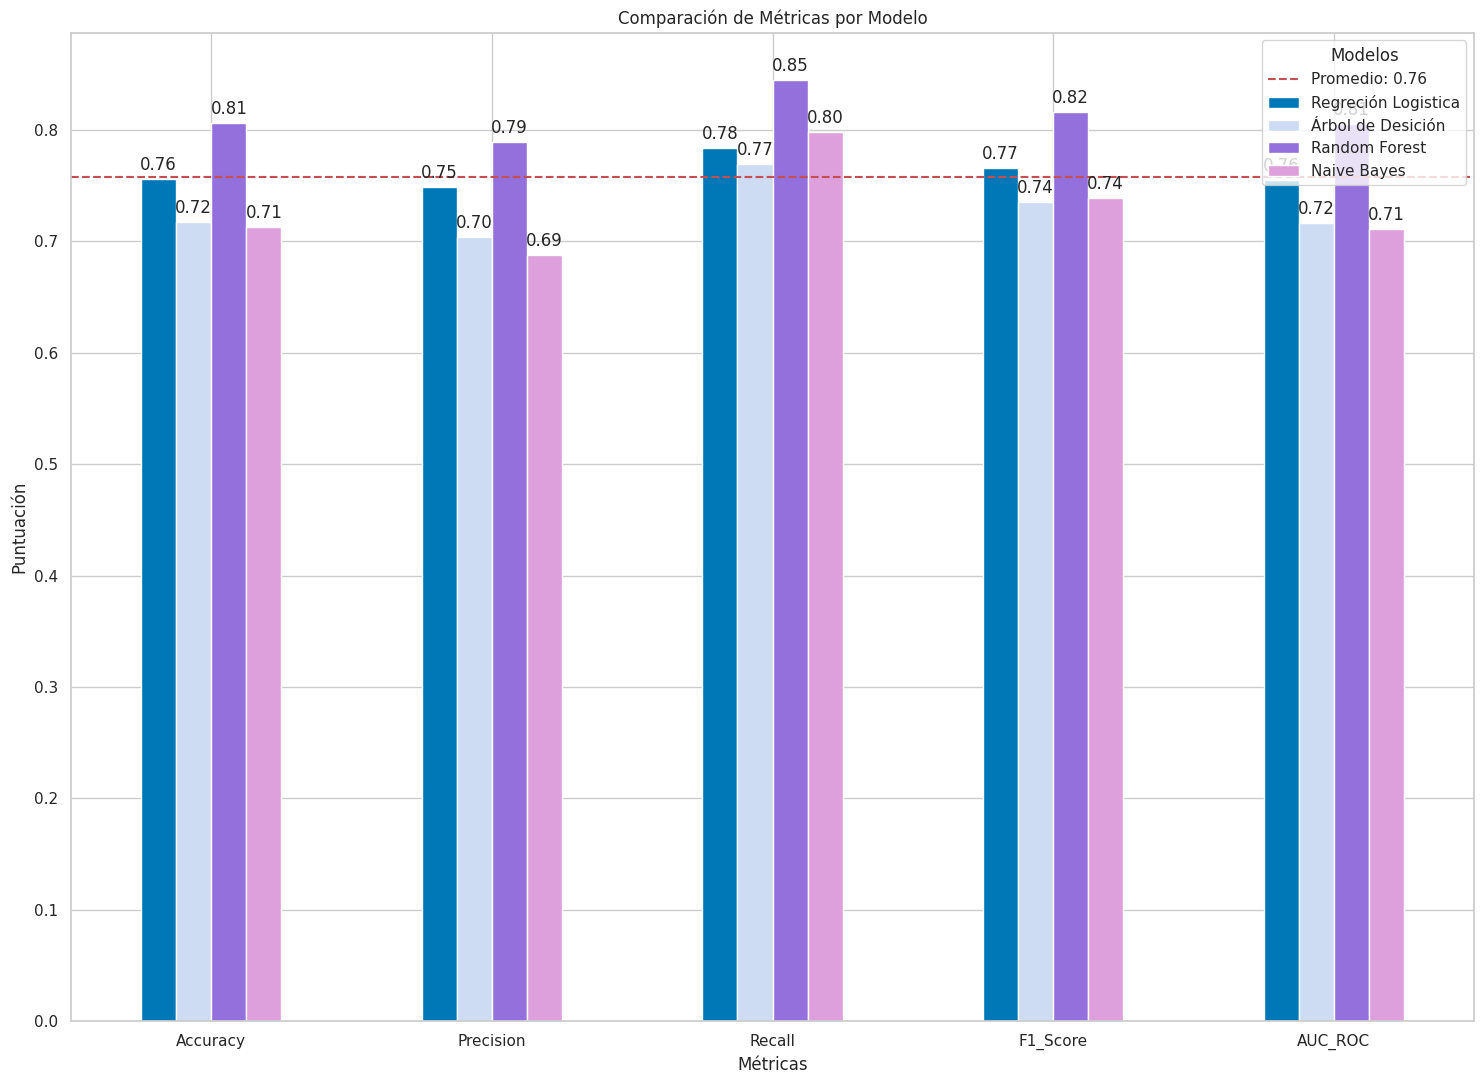

In [ ]:
visualiza_resultados()

#**6. Optimización del Modelo Random Forest con Random Search Validation**

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [172]:
# Definir el modelo y la cuadrícula de hiperparámetros
param_dist = {
    'n_estimators': [150, 200, 250],
    'max_depth': [20, 25, 30, 40],
}

In [173]:
# Realizar la búsqueda de cuadrícula
random_search = RandomizedSearchCV(model_RF,
                                   param_dist,
                                   n_iter=20,
                                   cv=5,
                                   scoring='precision',
                                   random_state=42)
random_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [20, 25, 30, 40],
                                        'n_estimators': [150, 200, 250]},
                   random_state=42, scoring='precision')

In [175]:
pd.DataFrame(random_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.566125      0.019723         0.022959        0.003303   
1        0.475156      0.012423         0.022174        0.002020   
2        0.576595      0.029429         0.026066        0.001500   
3        0.361325      0.008854         0.018440        0.002979   
4        0.476467      0.017227         0.021566        0.000219   
5        0.924320      0.059282         0.037400        0.006727   
6        0.357635      0.007230         0.018922        0.002820   
7        0.452785      0.004970         0.021700        0.001465   
8        0.595140      0.019144         0.026839        0.001063   
9        0.379251      0.025133         0.019161        0.002405   
10       0.690189      0.105860         0.030487        0.005049   
11       0.724316      0.146031         0.036510        0.004929   

   param_n_estimators param_max_depth                                  params  \
0                 150              20  {'n_estimators': 150, 'max_depth': 20}   
1                 200              20  {'n_estimators': 200, 'max_depth': 20}   
2                 250              20  {'n_estimators': 250, 'max_depth': 20}   
3                 150              25  {'n_estimators': 150, 'max_depth': 25}   
4                 200              25  {'n_estimators': 200, 'max_depth': 25}   
5                 250              25  {'n_estimators': 250, 'max_depth': 25}   
6                 150              30  {'n_estimators': 150, 'max_depth': 30}   
7                 200              30  {'n_estimators': 200, 'max_depth': 30}   
8                 250              30  {'n_estimators': 250, 'max_depth': 30}   
9                 150              40  {'n_estimators': 150, 'max_depth': 40}   
10                200              40  {'n_estimators': 200, 'max_depth': 40}   
11                250              40  {'n_estimators': 250, 'max_depth': 40}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.821782           0.828283           0.783019   
1            0.830000           0.817308           0.794118   
2            0.836735           0.811321           0.784314   
3            0.826531           0.813725           0.780952   
4            0.840000           0.836538           0.818182   
5            0.838384           0.811321           0.790476   
6            0.824742           0.828283           0.820000   
7            0.833333           0.803922           0.787037   
8            0.841584           0.823529           0.794118   
9            0.840426           0.819048           0.771429   
10           0.840000           0.817308           0.797980   
11           0.830000           0.826923           0.786408   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.781818           0.810000         0.804980        0.019335   
1            0.787037           0.803922         0.806477        0.015542   
2            0.787037           0.810000         0.805881        0.019072   
3            0.785047           0.810000         0.803251        0.017469   
4            0.765766           0.808081         0.813713        0.026693   
5            0.774775           0.824742         0.807940        0.022915   
6            0.765766           0.808081         0.809374        0.022847   
7            0.767857           0.808081         0.800046        0.021877   
8            0.774775           0.811881         0.809177        0.023125   
9            0.787037           0.846939         0.812976        0.029471   
10           0.765766           0.810000         0.806211        0.024424   
11           0.787037           0.808081         0.807690        0.018694   

    rank_test_score  
0                10  
1                 7  
2                 9  
3                11  
4                 1  
5                 5  
6                 3  
7                12  
8                 4  
9                 2  
1

In [176]:
# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'n_estimators': 200, 'max_depth': 25}


In [178]:
# Importar la clase RandomForestClassifier desde scikit-learn
from sklearn.ensemble import RandomForestClassifier
# Importar la métrica de precisión
from sklearn.metrics import precision_score

# Definir el modelo RandomForestClassifier con los hiperparámetros ajustados
model_RF_best = RandomForestClassifier(
    n_estimators=150,  # Número de árboles en el bosque
    max_depth=30,      # Profundidad máxima de cada árbol
    random_state=42    # Semilla aleatoria para reproducibilidad
)

# Entrenar el modelo con los datos de entrenamiento
model_RF_best.fit(train_x, train_y)

# Realizar predicciones en el conjunto de prueba
predictions = model_RF_best.predict(test_x)

# Calcular la precisión de las predicciones
precision_random_forest_best = precision_score(test_y, predictions)

# Imprimir la precisión de las predicciones
print(precision_random_forest_best)


0.8


## 6.2.-Recall

In [180]:
# Realizar la búsqueda de cuadrícula
random_search2 = RandomizedSearchCV(model_RF,
                                   param_dist,
                                   n_iter=20,
                                   cv=5,
                                   scoring='recall',
                                   random_state=123)
random_search2.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [20, 25, 30, 40],
                                        'n_estimators': [150, 200, 250]},
                   random_state=123, scoring='recall')

In [181]:
pd.DataFrame(random_search2.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.385379      0.019532         0.019928        0.004000   
1        0.479413      0.019075         0.022587        0.001798   
2        0.621983      0.019347         0.026538        0.001384   
3        0.519110      0.115421         0.028282        0.002259   
4        0.729874      0.114061         0.030485        0.005589   
5        0.590621      0.009130         0.026096        0.001348   
6        0.381451      0.018322         0.020176        0.004245   
7        0.477607      0.010563         0.022525        0.000838   
8        0.758055      0.221379         0.032289        0.008845   
9        0.569315      0.017054         0.025757        0.002189   
10       0.510006      0.045151         0.023058        0.001571   
11       0.597582      0.026171         0.027487        0.000939   

   param_n_estimators param_max_depth                                  params  \
0                 150              20  {'n_estimators': 150, 'max_depth': 20}   
1                 200              20  {'n_estimators': 200, 'max_depth': 20}   
2                 250              20  {'n_estimators': 250, 'max_depth': 20}   
3                 150              25  {'n_estimators': 150, 'max_depth': 25}   
4                 200              25  {'n_estimators': 200, 'max_depth': 25}   
5                 250              25  {'n_estimators': 250, 'max_depth': 25}   
6                 150              30  {'n_estimators': 150, 'max_depth': 30}   
7                 200              30  {'n_estimators': 200, 'max_depth': 30}   
8                 250              30  {'n_estimators': 250, 'max_depth': 30}   
9                 150              40  {'n_estimators': 150, 'max_depth': 40}   
10                200              40  {'n_estimators': 200, 'max_depth': 40}   
11                250              40  {'n_estimators': 250, 'max_depth': 40}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.841584           0.831683               0.81   
1            0.831683           0.851485               0.81   
2            0.821782           0.831683               0.83   
3            0.831683           0.821782               0.83   
4            0.811881           0.831683               0.80   
5            0.811881           0.831683               0.80   
6            0.821782           0.841584               0.83   
7            0.851485           0.841584               0.81   
8            0.801980           0.841584               0.79   
9            0.841584           0.841584               0.80   
10           0.811881           0.831683               0.82   
11           0.811881           0.861386               0.84   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0                0.88               0.81         0.834653        0.025802   
1                0.87               0.80         0.832634        0.025806   
2                0.86               0.83         0.834693        0.013117   
3                0.86               0.80         0.828693        0.019297   
4                0.86               0.81         0.822713        0.021287   
5                0.87               0.78         0.818713        0.030640   
6                0.86               0.79         0.828673        0.023207   
7                0.84               0.81         0.830614        0.017285   
8                0.85               0.82         0.820713        0.022751   
9                0.87               0.82         0.834634        0.023499   
10               0.87               0.81         0.828713        0.022013   
11               0.87               0.82         0.840653        0.022565   

    rank_test_score  
0                 3  
1                 5  
2                 2  
3                 8  
4                10  
5                12  
6                 9  
7                 6  
8                11  
9                 4  
1

In [182]:
# Obtener los mejores hiperparámetros
best_params2 = random_search2.best_params_
print(f"Mejores hiperparámetros: {best_params2}")

Mejores hiperparámetros: {'n_estimators': 250, 'max_depth': 40}


In [183]:
#Arboles de Desicion- Random Forest
model_RF_best2 = RandomForestClassifier(
    n_estimators=250,
    max_depth=30,
    random_state=42
)
model_RF_best2.fit(train_x, train_y)
predictions = model_RF_best2.predict(test_x)
#Metricas de evalución
recall_random_forest_best = recall_score(test_y, predictions)
print(recall_random_forest_best )

0.8383838383838383


## 6.2.- F1

In [184]:
# Realizar la búsqueda de cuadrícula
random_search3 = RandomizedSearchCV(model_RF,
                                   param_dist,
                                   n_iter=20,
                                   cv=5,
                                   scoring='f1',
                                   random_state=42)
random_search3.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [20, 25, 30, 40],
                                        'n_estimators': [150, 200, 250]},
                   random_state=42, scoring='f1')

In [186]:
pd.DataFrame(random_search2.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.385379      0.019532         0.019928        0.004000   
1        0.479413      0.019075         0.022587        0.001798   
2        0.621983      0.019347         0.026538        0.001384   
3        0.519110      0.115421         0.028282        0.002259   
4        0.729874      0.114061         0.030485        0.005589   
5        0.590621      0.009130         0.026096        0.001348   
6        0.381451      0.018322         0.020176        0.004245   
7        0.477607      0.010563         0.022525        0.000838   
8        0.758055      0.221379         0.032289        0.008845   
9        0.569315      0.017054         0.025757        0.002189   
10       0.510006      0.045151         0.023058        0.001571   
11       0.597582      0.026171         0.027487        0.000939   

   param_n_estimators param_max_depth                                  params  \
0                 150              20  {'n_estimators': 150, 'max_depth': 20}   
1                 200              20  {'n_estimators': 200, 'max_depth': 20}   
2                 250              20  {'n_estimators': 250, 'max_depth': 20}   
3                 150              25  {'n_estimators': 150, 'max_depth': 25}   
4                 200              25  {'n_estimators': 200, 'max_depth': 25}   
5                 250              25  {'n_estimators': 250, 'max_depth': 25}   
6                 150              30  {'n_estimators': 150, 'max_depth': 30}   
7                 200              30  {'n_estimators': 200, 'max_depth': 30}   
8                 250              30  {'n_estimators': 250, 'max_depth': 30}   
9                 150              40  {'n_estimators': 150, 'max_depth': 40}   
10                200              40  {'n_estimators': 200, 'max_depth': 40}   
11                250              40  {'n_estimators': 250, 'max_depth': 40}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.841584           0.831683               0.81   
1            0.831683           0.851485               0.81   
2            0.821782           0.831683               0.83   
3            0.831683           0.821782               0.83   
4            0.811881           0.831683               0.80   
5            0.811881           0.831683               0.80   
6            0.821782           0.841584               0.83   
7            0.851485           0.841584               0.81   
8            0.801980           0.841584               0.79   
9            0.841584           0.841584               0.80   
10           0.811881           0.831683               0.82   
11           0.811881           0.861386               0.84   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0                0.88               0.81         0.834653        0.025802   
1                0.87               0.80         0.832634        0.025806   
2                0.86               0.83         0.834693        0.013117   
3                0.86               0.80         0.828693        0.019297   
4                0.86               0.81         0.822713        0.021287   
5                0.87               0.78         0.818713        0.030640   
6                0.86               0.79         0.828673        0.023207   
7                0.84               0.81         0.830614        0.017285   
8                0.85               0.82         0.820713        0.022751   
9                0.87               0.82         0.834634        0.023499   
10               0.87               0.81         0.828713        0.022013   
11               0.87               0.82         0.840653        0.022565   

    rank_test_score  
0                 3  
1                 5  
2                 2  
3                 8  
4                10  
5                12  
6                 9  
7                 6  
8                11  
9                 4  
1

In [187]:
# Obtener los mejores hiperparámetros
best_params3 = random_search3.best_params_
print(f"Mejores hiperparámetros: {best_params3}")

Mejores hiperparámetros: {'n_estimators': 250, 'max_depth': 25}


In [191]:
#Arboles de Desicion- Random Forest
model_RF_best3 = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42
)
model_RF_best3.fit(train_x, train_y)
predictions = model_RF_best3.predict(test_x)
#Metricas de evalución
f1_random_forest_best = f1_score(test_y, predictions)
print(f1_random_forest_best )






0.823529411764706


Los modelos de ML se dividen en 3 grupos: regresion, clasificacion y clusterizacion.

ERROR: Could not find a version that satisfies the requirement sklearn.metrics (from versions: none)
ERROR: No matching distribution found for sklearn.metrics


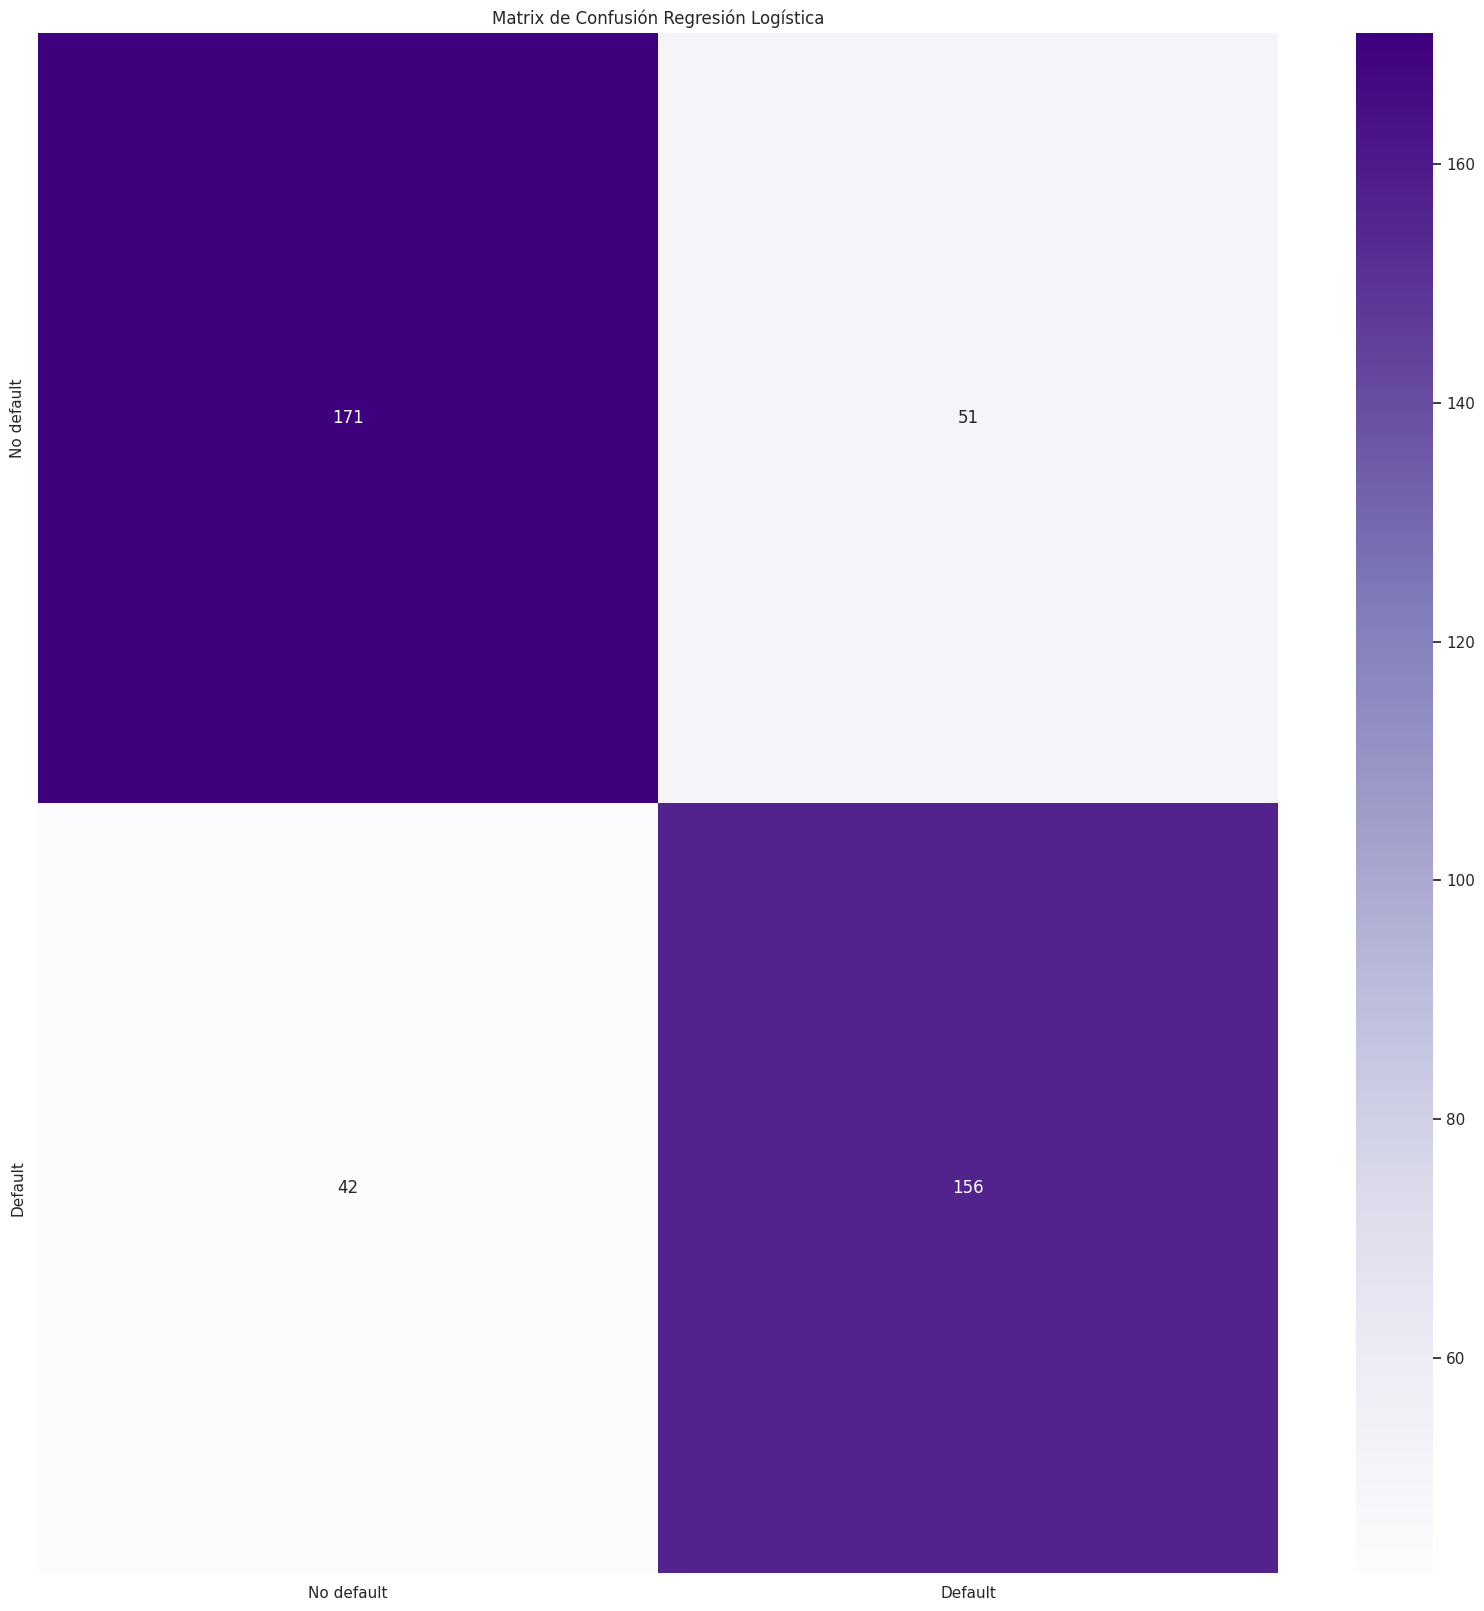

Model: Regresión Logística
Accuracy: 0.7785714285714286
Precision: 0.7536231884057971
Recall: 0.7878787878787878
F1-Score: 0.7703703703703704
AUC-ROC: 0.8494403494403495



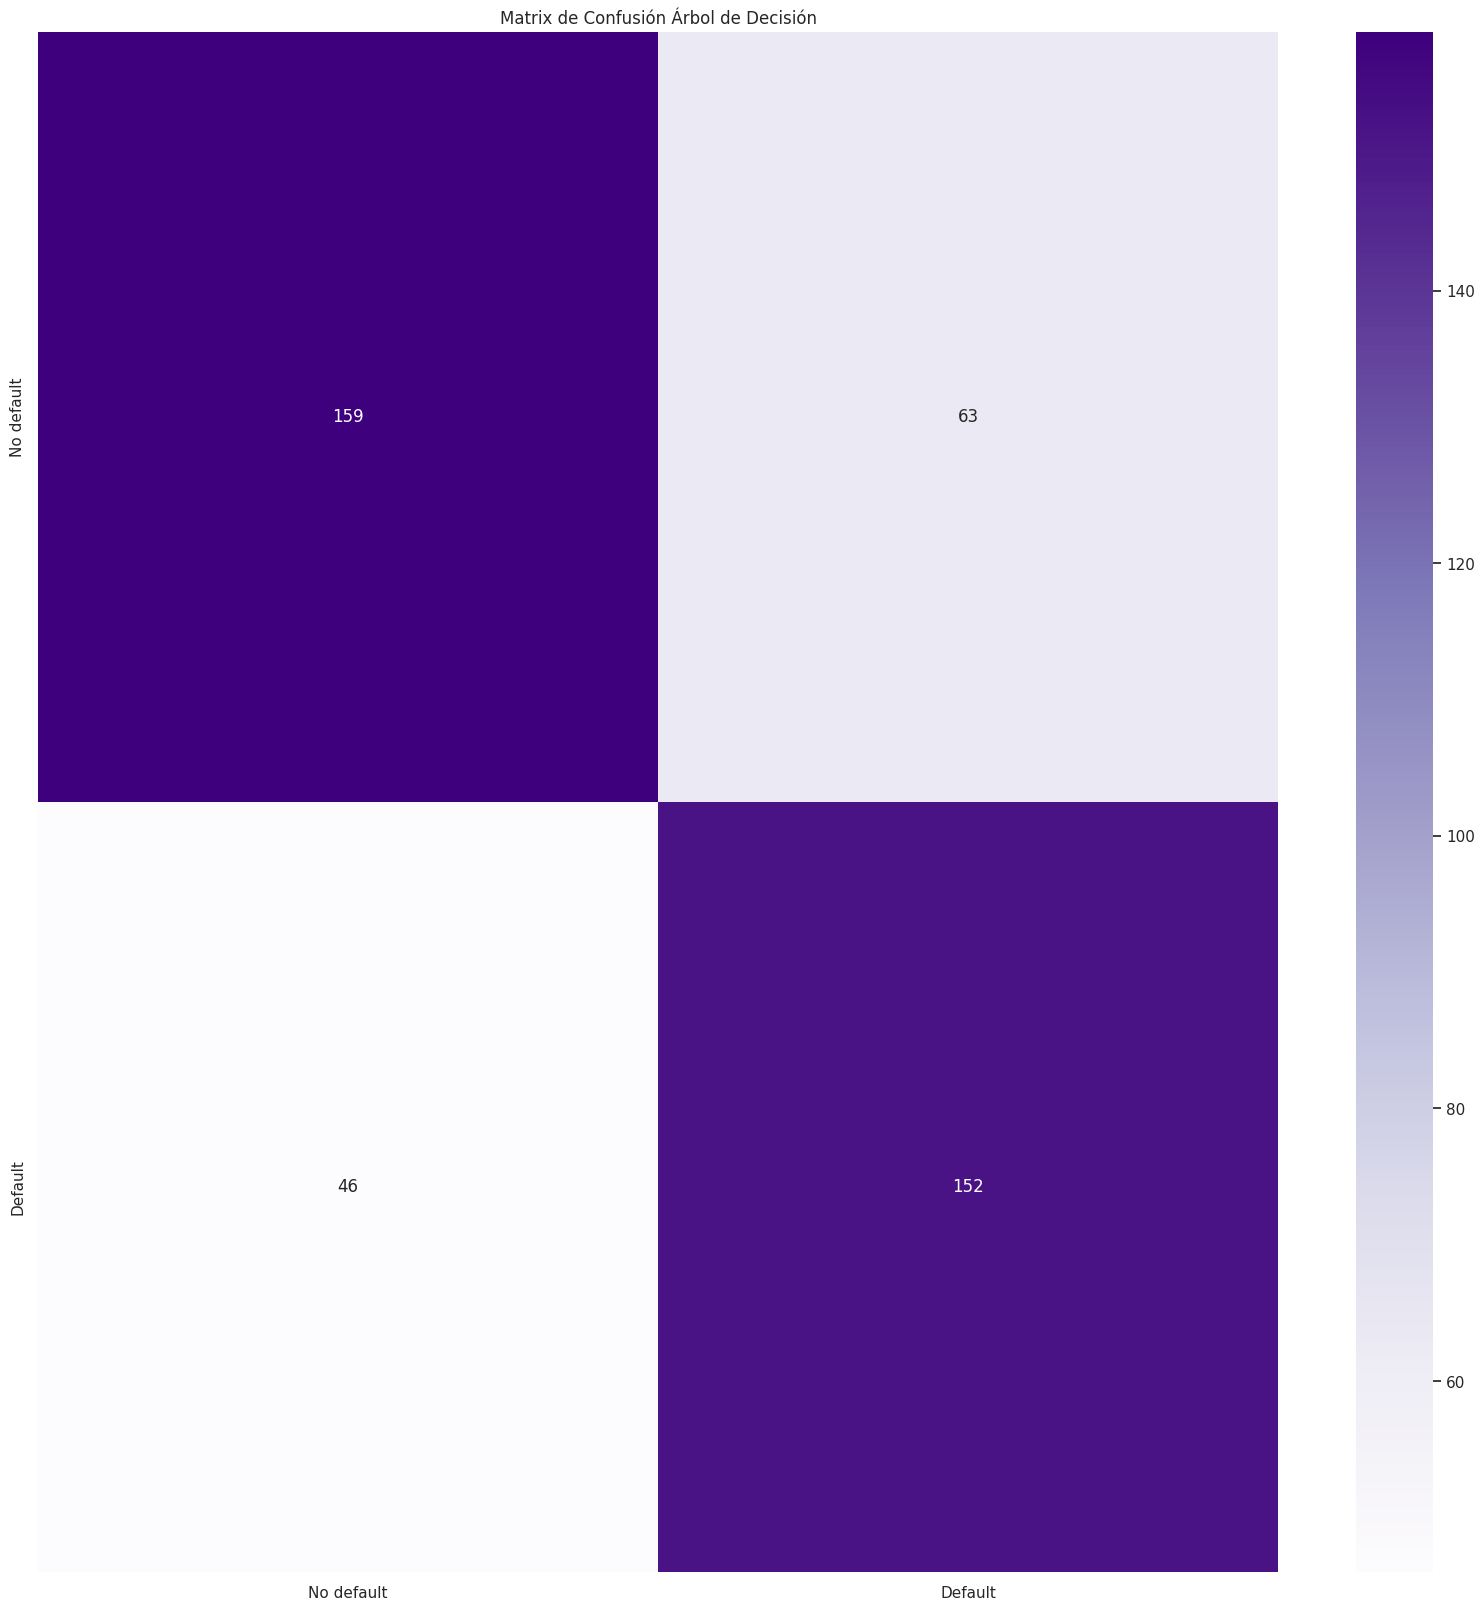

Model: Árbol de Decisión
Accuracy: 0.7404761904761905
Precision: 0.7069767441860465
Recall: 0.7676767676767676
F1-Score: 0.7360774818401937
AUC-ROC: 0.741946491946492



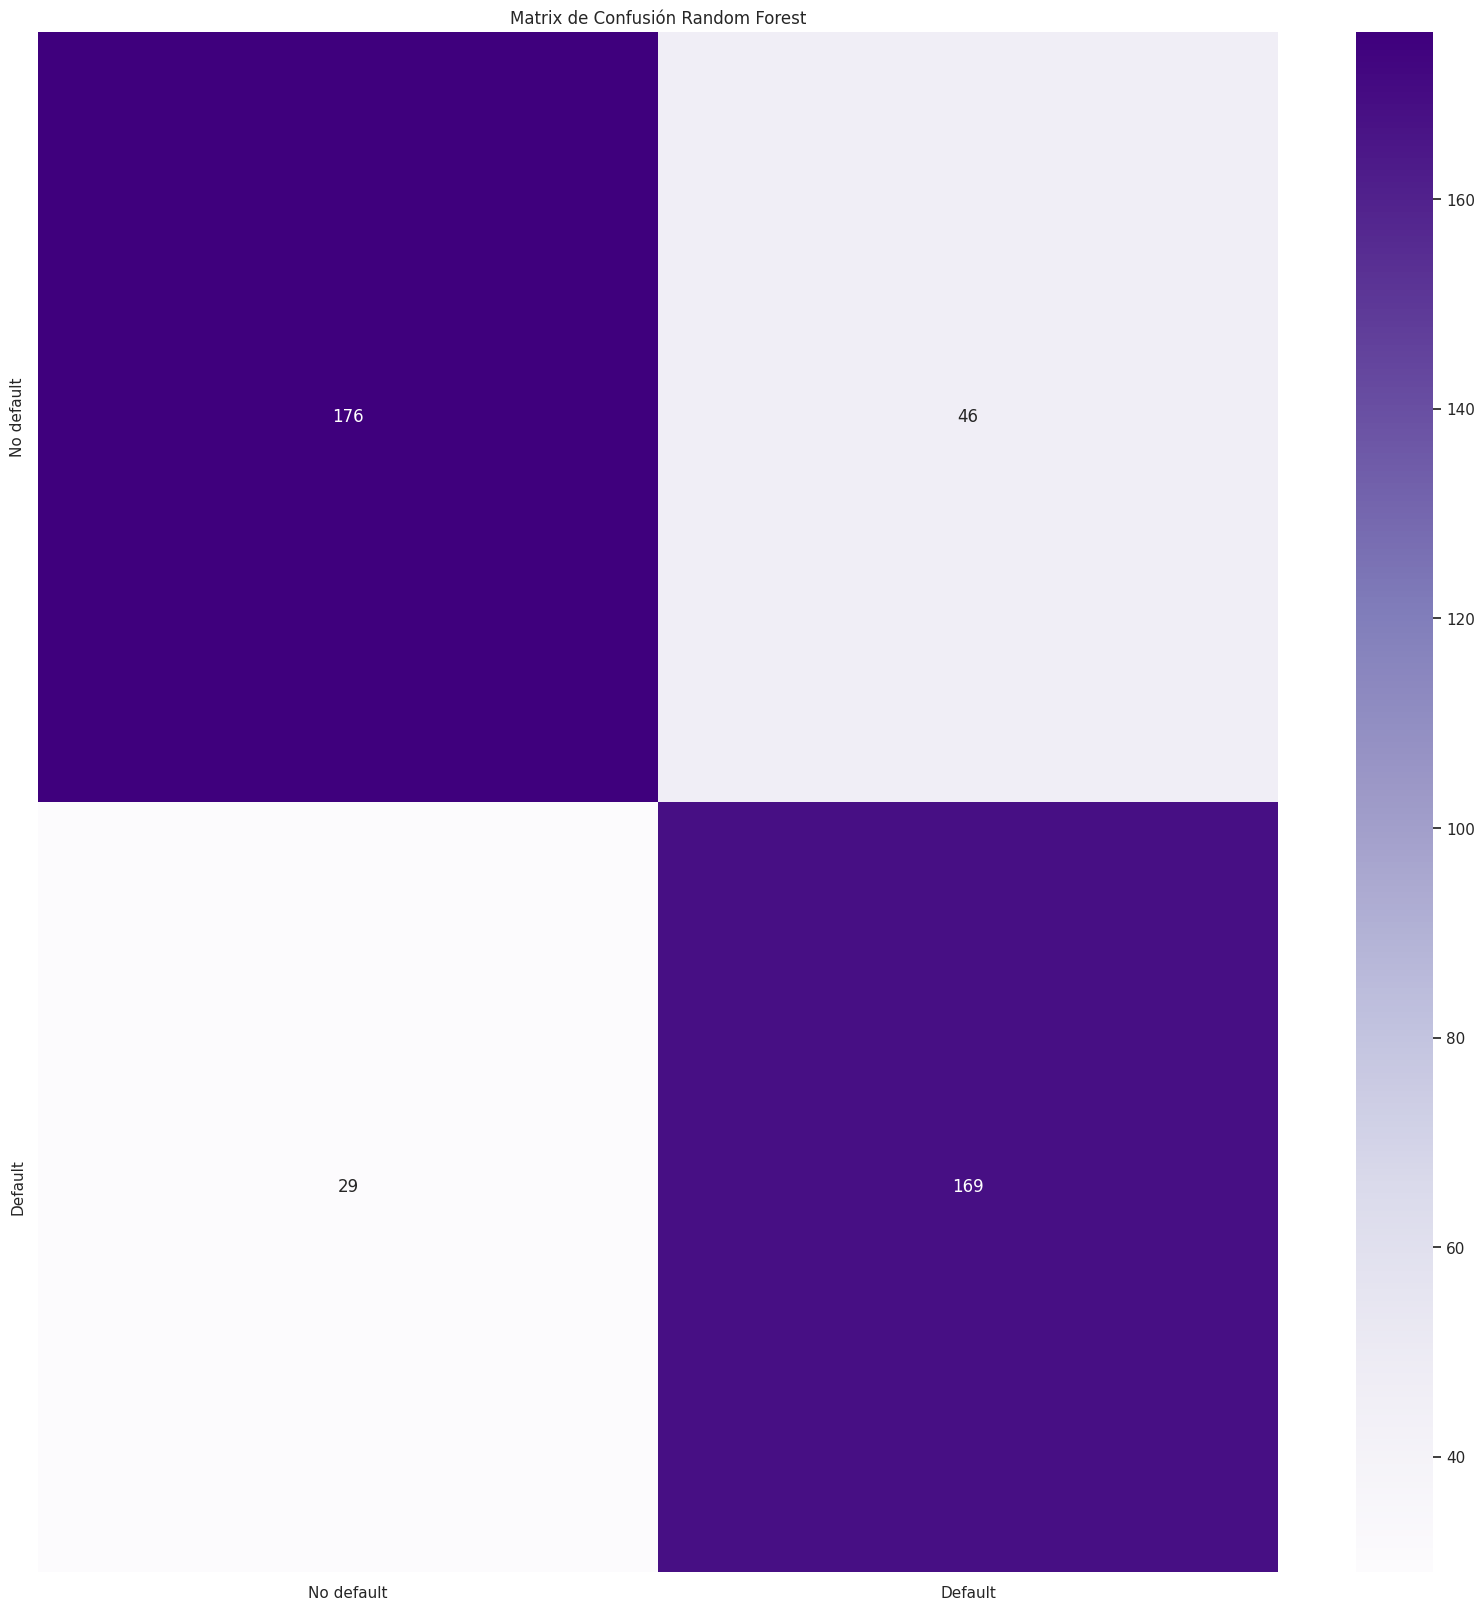

Model: Random Forest
Accuracy: 0.8214285714285714
Precision: 0.786046511627907
Recall: 0.8535353535353535
F1-Score: 0.8184019370460048
AUC-ROC: 0.9071344071344071



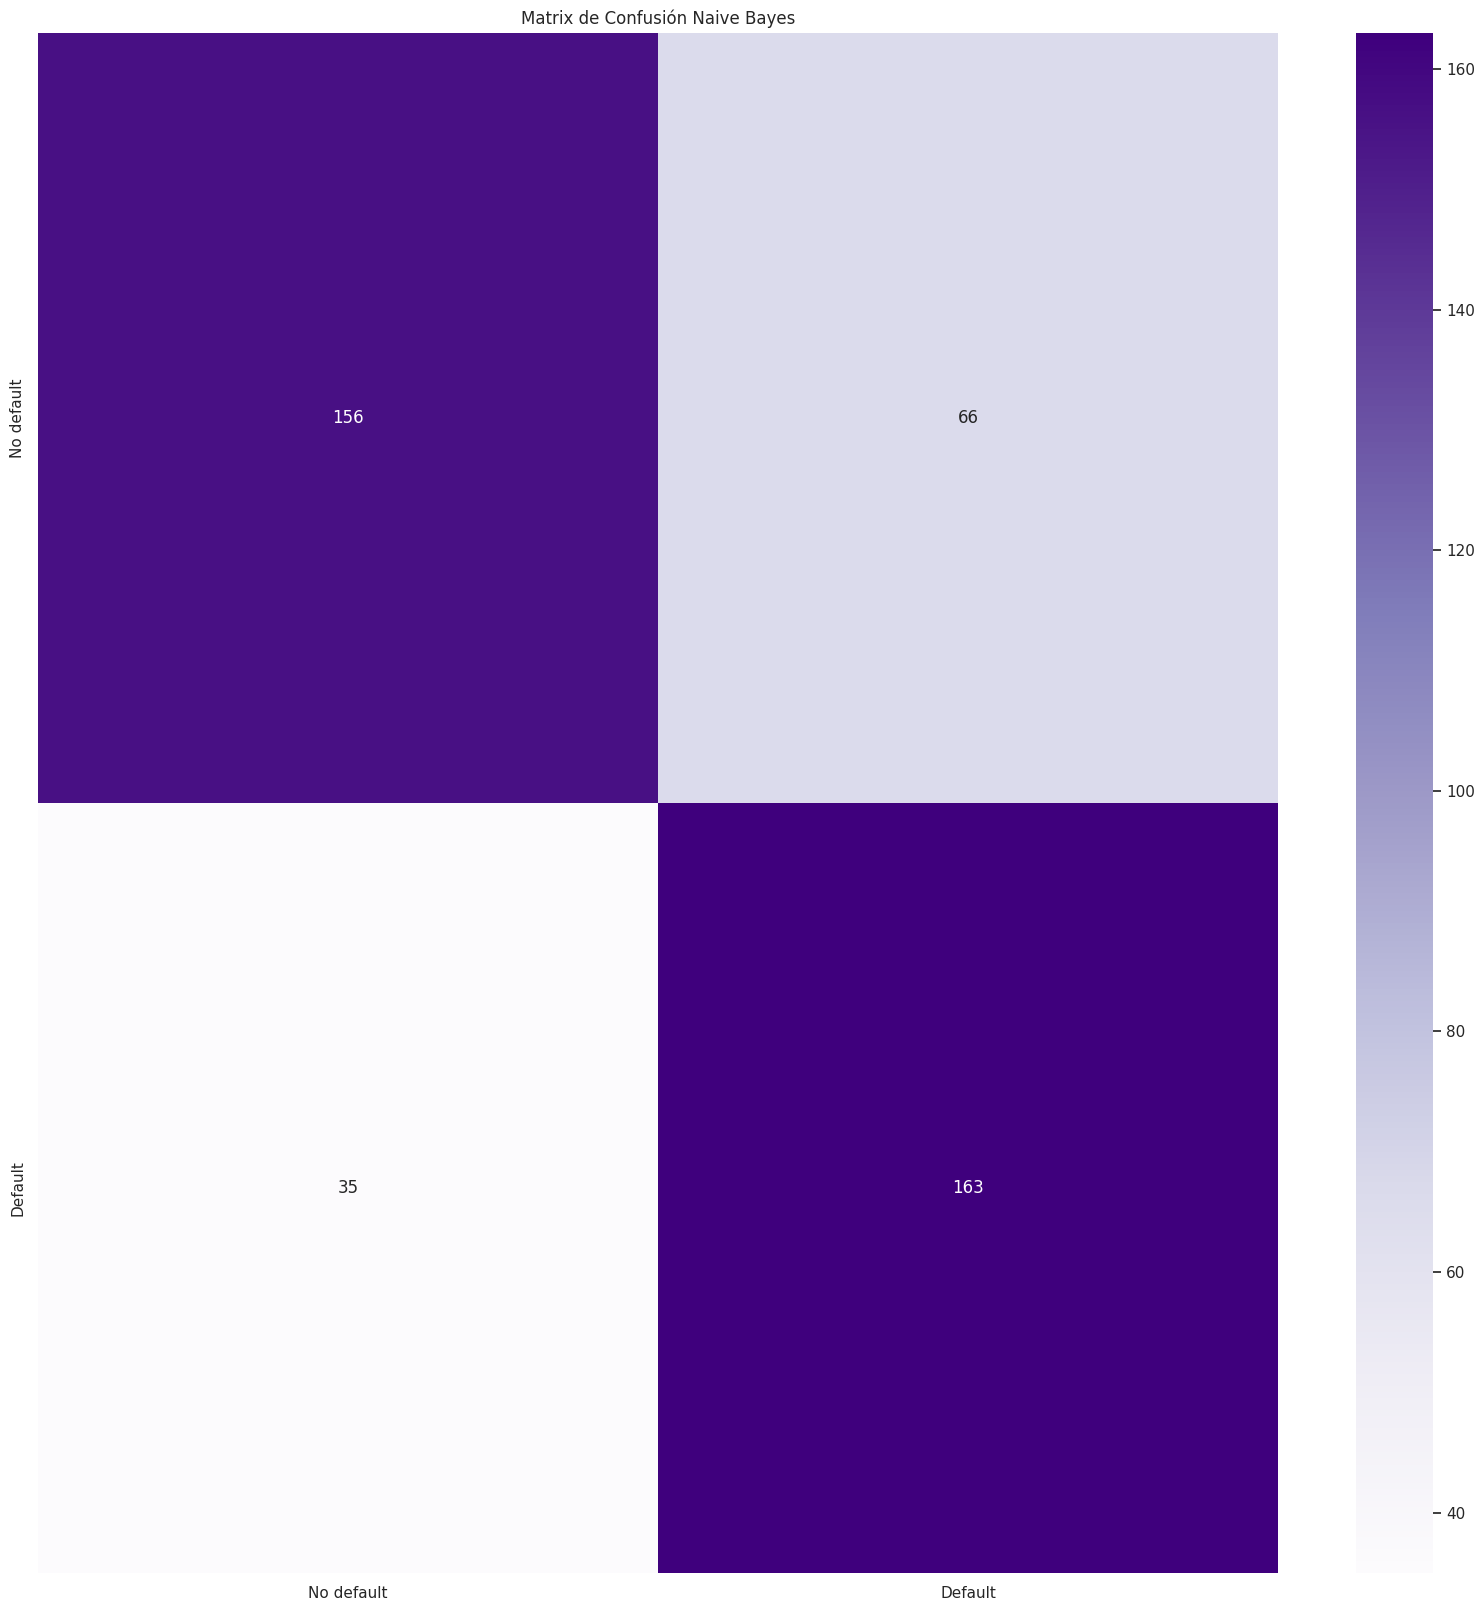

Model: Naive Bayes
Accuracy: 0.7595238095238095
Precision: 0.7117903930131004
Recall: 0.8232323232323232
F1-Score: 0.7634660421545667
AUC-ROC: 0.8195468195468195



In [192]:
!pip install sklearn.metrics
from sklearn import metrics

def crea_modelos():
    global df_banco, resultados
    y = df_banco['default']
    x = df_banco.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)

        conf_matrix = metrics.confusion_matrix(test_y, predictions)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
        plt.title(f'Matrix de Confusión {name}')
        plt.show()

        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        print(f'Model: {name}')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1-Score: {f1}')
        print(f'AUC-ROC: {roc_auc}\n')

crea_modelos()

**GLOSARIO**

**Accuracy:** Predicciones correctas dividido el número total de predicciones.

**Precisión:** Verdaderos positivos dividido el total de instancias clasificas como positivas. Hay que prestarle atención cuando queremos minimizar los falsos positivos (Error de tipo 1)

**Recall:** Es la fracción de instancias positivas que el modelo predijo de forma correcta. Es la cantidad de verdaderos positivos dividido el total de instancias verdaderamente positivas. Es importante cuando queremos minimizar los falsos negativos (Error de tipo 2)

**F1-Score:** Combinación de la precisión y el recall en un solo valor.

**AUC-ROC:** Es el área bajo la curva ROC. La curva ROC representa graficamente la tasa de verdaderos positivos frente a la tasa de falsos positivos. Proporciona una medida de la capacidad de discriminación del modelo. Los valores cercanos a 1 indican un buen rendimiento del modelo.

¿Cuál de estos modelos seleccionarias y por qué?
Tras realizar varias pruebas, el modelo que muestra mejores resultados al analizar las matrices de confusión es el modelo Random Forest. Teniendo la menor cantidad de falsos positivos, es decir, nos permite evitar el error de tipo 1. A su vez, es el modelo que ha detectado mayor cantidad de verdaderos positivos.

¿Qué es una matrix de confusión?
Es una tabla utilizada en el analisis de clasificación para evalular el rendimiento de un modelo. Nos muestra la cantidad de predicciones correctas e incorrectas realizadas por nuestro modelo en comparación con los valores reales en el conjunto de datos de prueba. Es decir, permite ver el comportamiento del clasificar con base en los errores de tipo 1 y tipo 2.

Las celdas típicas en una matriz de confusión incluyen:

Verdaderos positivos (TP): Instancias positivas que fueron correctamente clasificadas como positivas.

Verdaderos negativos (TN): Instancias negativas que fueron correctamente clasificadas como negativas.

Falsos positivos (FP): Instancias negativas que fueron incorrectamente clasificadas como positivas.

Falsos negativos (FN): Instancias positivas que fueron incorrectamente clasificadas como negativas.